## NAME : SOWNDARIYA M
### PGAA - 02

In [1]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error
from numpy import array
from keras.layers import Dense, Dropout

In [2]:
plt.rcParams['figure.figsize'] = (14,6)

In [3]:
# importing data
df = pd.read_excel('Sales Forecasting_Train Data.xlsx')

<IPython.core.display.Javascript object>

In [4]:
df.head()

HQ Country  State_of_outlet   City_of_outlet  Month  Day  Year  \
0  Asia   India              NaN  Bombay (Mumbai)      1    1  2005   
1  Asia   India              NaN  Bombay (Mumbai)      1    2  2005   
2  Asia   India              NaN  Bombay (Mumbai)      1    3  2005   
3  Asia   India              NaN  Bombay (Mumbai)      1    4  2005   
4  Asia   India              NaN  Bombay (Mumbai)      1    5  2005   

   Total_Sales  
0         72.2  
1         72.7  
2         74.3  
3         78.9  
4         81.5

In [5]:
df.drop('State_of_outlet', axis=1, inplace= True)

In [6]:
df.columns

Index(['HQ', 'Country', 'City_of_outlet', 'Month', 'Day', 'Year',
       'Total_Sales'],
      dtype='object')

In [7]:
df_cat = df.select_dtypes('object')

# EDA

<IPython.core.display.Javascript object>

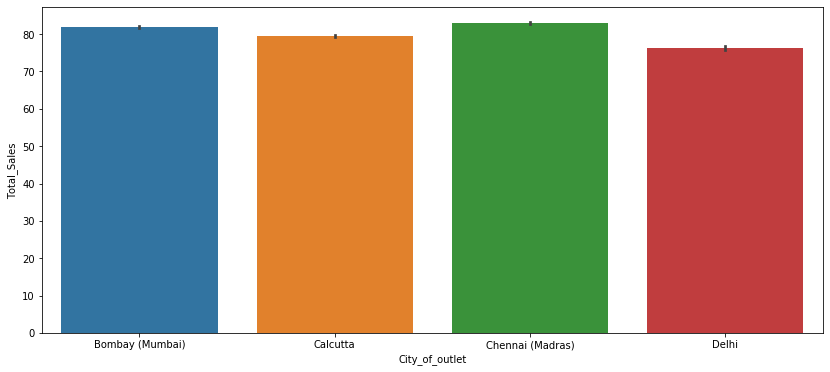

<IPython.core.display.Javascript object>

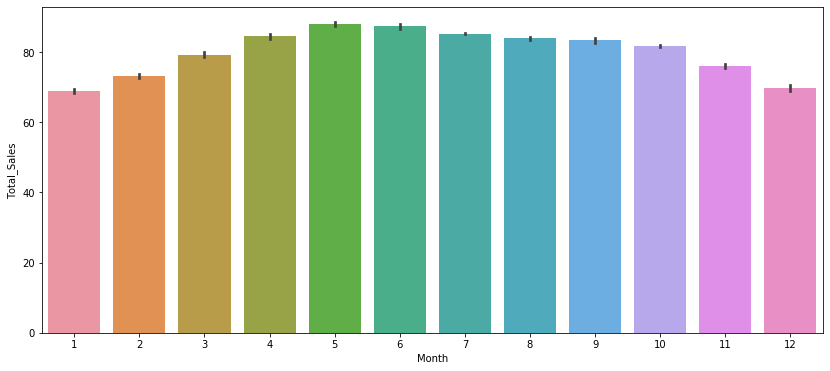

<IPython.core.display.Javascript object>

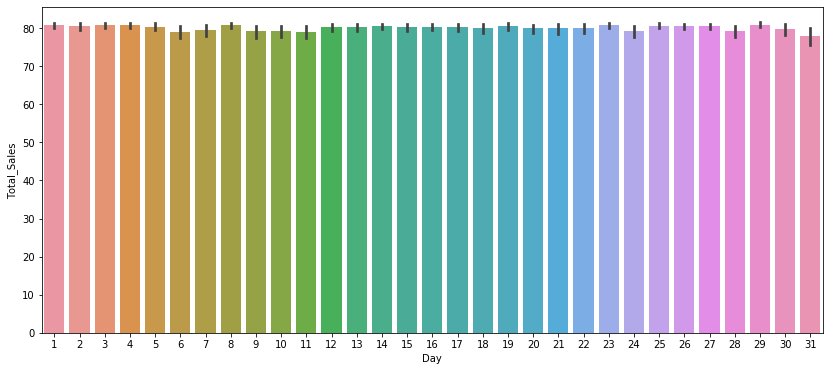

<IPython.core.display.Javascript object>

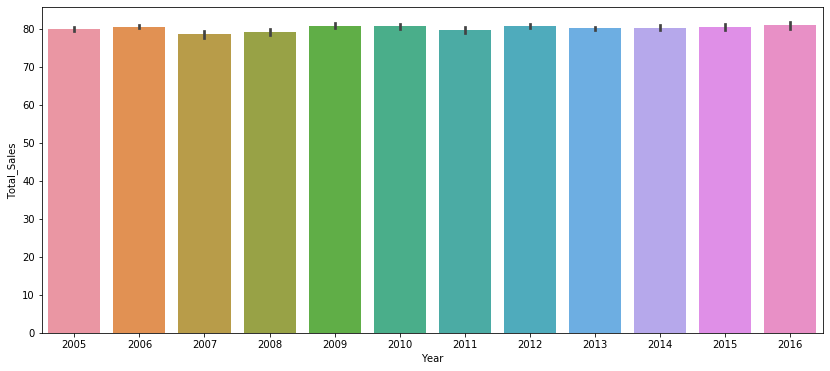

In [8]:
for i in df[[ 'City_of_outlet', 'Month', 'Day', 'Year']]:
    sns.barplot(df[i],df['Total_Sales'])
    plt.show()

<IPython.core.display.Javascript object>

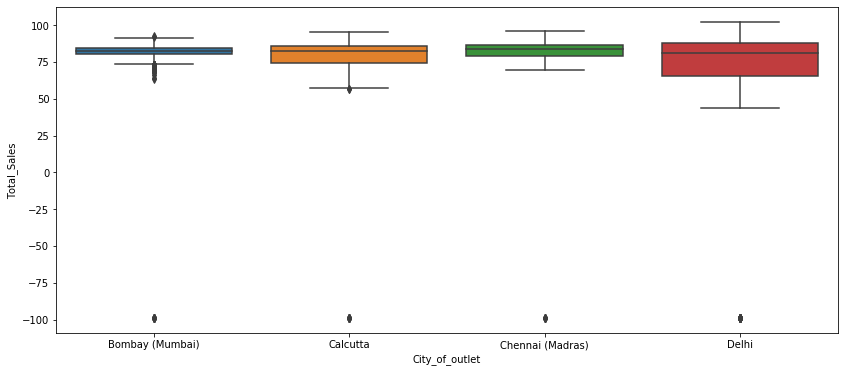

<IPython.core.display.Javascript object>

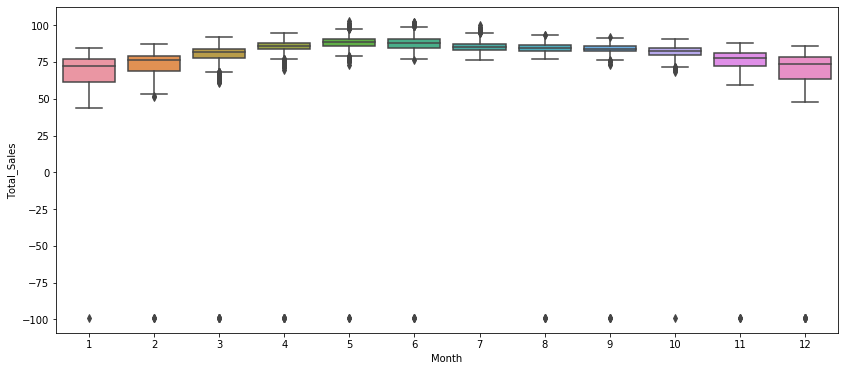

<IPython.core.display.Javascript object>

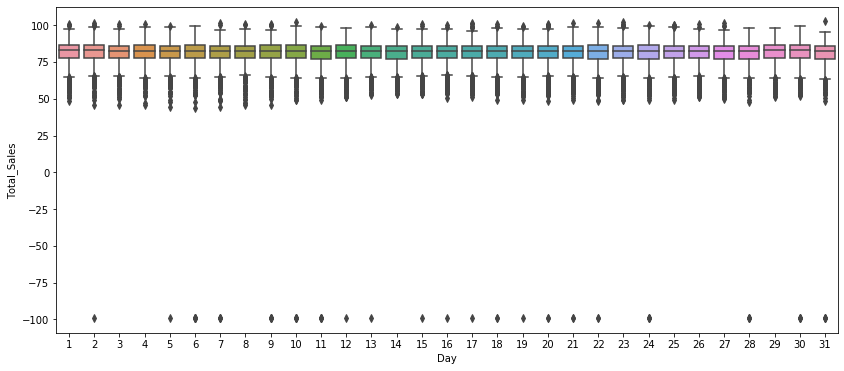

<IPython.core.display.Javascript object>

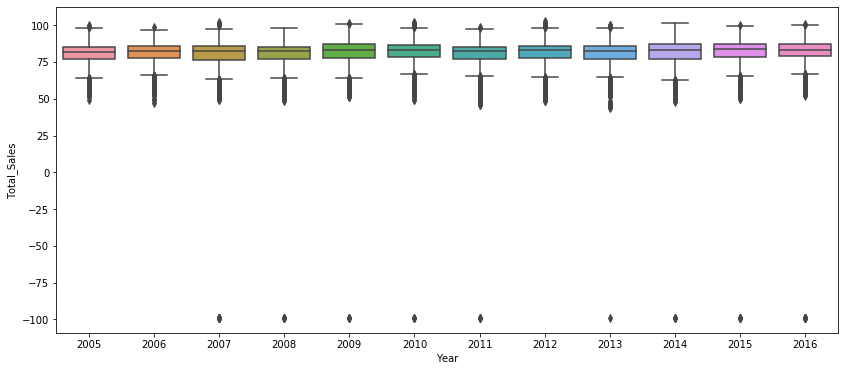

In [9]:
for i in df[[ 'City_of_outlet', 'Month', 'Day', 'Year']]:
    sns.boxplot(df[i],df['Total_Sales'])
    plt.show()

In [10]:
df.shape

(17536, 7)

In [11]:
# dropping insignificant features
data = df.drop(['HQ', 'Country', 'City_of_outlet'], axis=1)

In [12]:
#checking unique values
data.nunique()

Month           12
Day             31
Year            12
Total_Sales    539
dtype: int64

In [13]:
# storing data in new variable
sale = data

In [14]:
# converting month, day, year in right Date format
from datetime import datetime
sale['Date'] = sale.apply(lambda row: datetime.strptime(f"{int(row.Year)}-{int(row.Month)}-{int(row.Day)}", '%Y-%m-%d'), axis=1)

In [15]:
# dropping month, day, year because we have those columns in Date column
sale.drop(['Month','Day','Year'], axis=1, inplace = True)

In [16]:
# groupby the date value to get the sales sum of each day
sale = sale.groupby('Date')['Total_Sales'].sum().reset_index()

In [17]:
# setting date as an index
sale.set_index('Date', inplace = True)

In [18]:
#checking converted format
sale.head()

Total_Sales
Date                   
2005-01-01        275.5
2005-01-02        275.5
2005-01-03        278.6
2005-01-04        279.3
2005-01-05        281.4

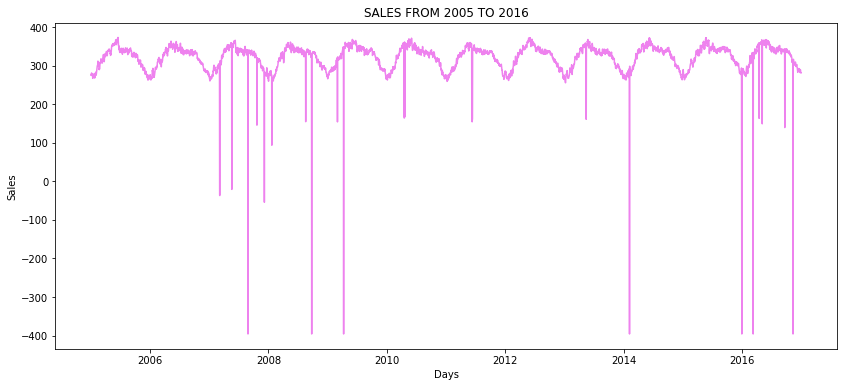

In [19]:
# Plotting Given Data
plt.plot(sale, color = 'violet')
plt.title('SALES FROM 2005 TO 2016')
plt.xlabel('Days')
plt.ylabel('Sales')
plt.show()

# BUILDING A LSTM MODEL WITH EVALUATION METRIC "MAE"

In [20]:
# fix random seed for reproducibility
numpy.random.seed(7)

# load the dataset
dataframe = sale
dataset = dataframe.values
dataset = dataset.astype('float32')



In [21]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)


In [22]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)


In [23]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]


In [24]:
# reshape into X=t and Y=t+1
look_back = 365 # considering last year for forecasting
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


In [25]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


In [26]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(20, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['mae'])
aa = model.fit(trainX, trainY, epochs = 20, batch_size = 64, verbose=2)


Epoch 1/20
41/41 - 0s - loss: 0.0427 - mae: 0.1290
Epoch 2/20
41/41 - 0s - loss: 0.0029 - mae: 0.0336
Epoch 3/20
41/41 - 0s - loss: 0.0028 - mae: 0.0328
Epoch 4/20
41/41 - 0s - loss: 0.0027 - mae: 0.0315
Epoch 5/20
41/41 - 0s - loss: 0.0027 - mae: 0.0313
Epoch 6/20
41/41 - 0s - loss: 0.0026 - mae: 0.0294
Epoch 7/20
41/41 - 0s - loss: 0.0026 - mae: 0.0292
Epoch 8/20
41/41 - 0s - loss: 0.0025 - mae: 0.0275
Epoch 9/20
41/41 - 0s - loss: 0.0024 - mae: 0.0264
Epoch 10/20
41/41 - 0s - loss: 0.0023 - mae: 0.0246
Epoch 11/20
41/41 - 0s - loss: 0.0022 - mae: 0.0233
Epoch 12/20
41/41 - 0s - loss: 0.0022 - mae: 0.0224
Epoch 13/20
41/41 - 0s - loss: 0.0023 - mae: 0.0233
Epoch 14/20
41/41 - 0s - loss: 0.0021 - mae: 0.0208
Epoch 15/20
41/41 - 0s - loss: 0.0021 - mae: 0.0213
Epoch 16/20
41/41 - 0s - loss: 0.0020 - mae: 0.0200
Epoch 17/20
41/41 - 0s - loss: 0.0021 - mae: 0.0211
Epoch 18/20
41/41 - 0s - loss: 0.0020 - mae: 0.0193
Epoch 19/20
41/41 - 0s - loss: 0.0020 - mae: 0.0186
Epoch 20/20
41/41 - 0

In [27]:
# checking the metrics of model
xxx = aa.history
xxx.keys()

dict_keys(['loss', 'mae'])

<IPython.core.display.Javascript object>

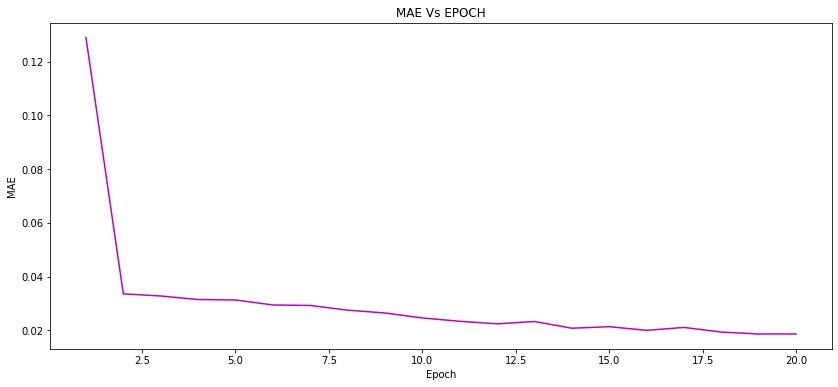

In [28]:
epoch = np.arange(1,21)
plt.plot(epoch, aa.history['mae'],color='m')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('MAE Vs EPOCH')
plt.show()

<IPython.core.display.Javascript object>

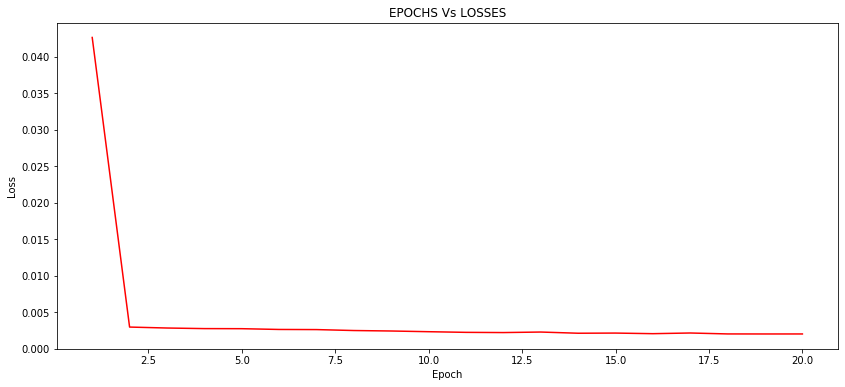

In [29]:
epoch = np.arange(1,21)
plt.plot(epoch, aa.history['loss'],color='r')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('EPOCHS Vs LOSSES')
plt.show()

In [30]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


In [31]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])


In [32]:
# calculate Mean Absolute Error
trainScore = (mean_absolute_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f MAE' % (trainScore))
testScore = (mean_absolute_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f MAE' % (testScore))


Train Score: 13.22 MAE
Test Score: 15.28 MAE


In [33]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


Train Score: 34.28 RMSE
Test Score: 47.69 RMSE


In [34]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict


In [35]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


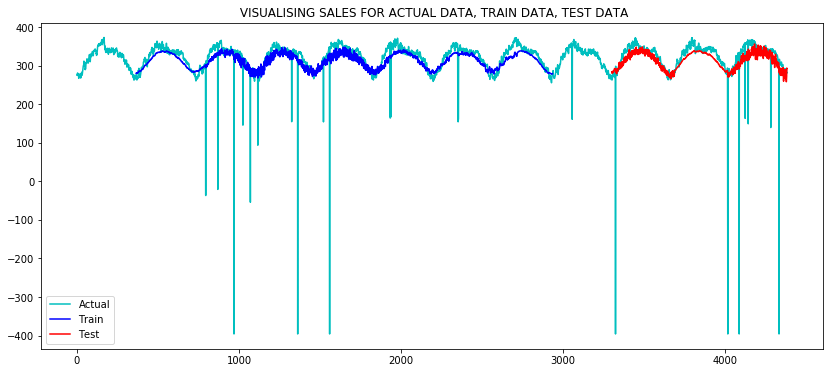

In [36]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), color = 'c', label = 'Actual')
plt.plot(trainPredictPlot, color = 'b', label = 'Train')
plt.plot(testPredictPlot , color = 'r', label = 'Test')
plt.title(' VISUALISING SALES FOR ACTUAL DATA, TRAIN DATA, TEST DATA')
plt.legend()
plt.show()

# FORECASTING SALES FOR THE YEARS 2017 and 2018

In [37]:
# considering last one year data for forecasting
xx = trainPredict.ravel()
yy = xx[-366:-1]
len(yy)

365

In [38]:
yy

array([283.5203 , 282.15344, 281.62485, 278.74722, 280.46576, 283.9878 ,
       286.98276, 286.7111 , 289.18384, 291.56903, 290.11365, 287.7306 ,
       291.40393, 289.45306, 288.2623 , 289.26544, 292.74826, 292.3152 ,
       291.82947, 292.61493, 294.84354, 293.89255, 295.55597, 296.94708,
       294.12213, 290.81573, 290.08514, 287.0094 , 290.15353, 288.38092,
       290.10812, 290.73416, 291.81503, 291.48236, 292.19788, 292.88144,
       291.1247 , 292.30203, 293.25623, 297.14627, 297.36694, 300.22855,
       304.89548, 304.15643, 306.45624, 305.9167 , 305.02115, 302.49203,
       302.07364, 301.12198, 301.00958, 301.35562, 300.508  , 301.41782,
       303.23962, 303.72247, 303.03662, 303.74454, 303.85925, 302.62173,
       302.5846 , 303.52112, 304.11188, 304.25937, 302.4852 , 303.84167,
       307.0666 , 306.86014, 308.40945, 311.04172, 310.39172, 310.4905 ,
       311.2717 , 311.1527 , 311.94266, 315.5804 , 317.22873, 320.22662,
       320.08957, 321.31824, 321.9455 , 322.5846 , 

In [39]:
x_input = yy
n_steps = 365
temp_input=list(x_input)
lst_output=[] # forecasted values storing in this list
i=0
n_features = 1
while(i<730):
    
    if(len(temp_input)>len(yy)):
        x_input=array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_features,  n_steps))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_features, n_steps))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1

[1.2611613]
1 day input [282.15344   281.62485   278.74722   280.46576   283.9878    286.98276
 286.7111    289.18384   291.56903   290.11365   287.7306    291.40393
 289.45306   288.2623    289.26544   292.74826   292.3152    291.82947
 292.61493   294.84354   293.89255   295.55597   296.94708   294.12213
 290.81573   290.08514   287.0094    290.15353   288.38092   290.10812
 290.73416   291.81503   291.48236   292.19788   292.88144   291.1247
 292.30203   293.25623   297.14627   297.36694   300.22855   304.89548
 304.15643   306.45624   305.9167    305.02115   302.49203   302.07364
 301.12198   301.00958   301.35562   300.508     301.41782   303.23962
 303.72247   303.03662   303.74454   303.85925   302.62173   302.5846
 303.52112   304.11188   304.25937   302.4852    303.84167   307.0666
 306.86014   308.40945   311.04172   310.39172   310.4905    311.2717
 311.1527    311.94266   315.5804    317.22873   320.22662   320.08957
 321.31824   321.9455    322.5846    320.51944   318.7201

5 day output [[1.2611613]]
6 day input [286.98276   286.7111    289.18384   291.56903   290.11365   287.7306
 291.40393   289.45306   288.2623    289.26544   292.74826   292.3152
 291.82947   292.61493   294.84354   293.89255   295.55597   296.94708
 294.12213   290.81573   290.08514   287.0094    290.15353   288.38092
 290.10812   290.73416   291.81503   291.48236   292.19788   292.88144
 291.1247    292.30203   293.25623   297.14627   297.36694   300.22855
 304.89548   304.15643   306.45624   305.9167    305.02115   302.49203
 302.07364   301.12198   301.00958   301.35562   300.508     301.41782
 303.23962   303.72247   303.03662   303.74454   303.85925   302.62173
 302.5846    303.52112   304.11188   304.25937   302.4852    303.84167
 307.0666    306.86014   308.40945   311.04172   310.39172   310.4905
 311.2717    311.1527    311.94266   315.5804    317.22873   320.22662
 320.08957   321.31824   321.9455    322.5846    320.51944   318.72012
 320.25232   317.82568   315.20615   316.

10 day input [290.11365   287.7306    291.40393   289.45306   288.2623    289.26544
 292.74826   292.3152    291.82947   292.61493   294.84354   293.89255
 295.55597   296.94708   294.12213   290.81573   290.08514   287.0094
 290.15353   288.38092   290.10812   290.73416   291.81503   291.48236
 292.19788   292.88144   291.1247    292.30203   293.25623   297.14627
 297.36694   300.22855   304.89548   304.15643   306.45624   305.9167
 305.02115   302.49203   302.07364   301.12198   301.00958   301.35562
 300.508     301.41782   303.23962   303.72247   303.03662   303.74454
 303.85925   302.62173   302.5846    303.52112   304.11188   304.25937
 302.4852    303.84167   307.0666    306.86014   308.40945   311.04172
 310.39172   310.4905    311.2717    311.1527    311.94266   315.5804
 317.22873   320.22662   320.08957   321.31824   321.9455    322.5846
 320.51944   318.72012   320.25232   317.82568   315.20615   316.68054
 317.6553    316.0539    317.3629    317.44455   317.32324   318.258

14 day output [[1.1317514]]
15 day input [289.26544   292.74826   292.3152    291.82947   292.61493   294.84354
 293.89255   295.55597   296.94708   294.12213   290.81573   290.08514
 287.0094    290.15353   288.38092   290.10812   290.73416   291.81503
 291.48236   292.19788   292.88144   291.1247    292.30203   293.25623
 297.14627   297.36694   300.22855   304.89548   304.15643   306.45624
 305.9167    305.02115   302.49203   302.07364   301.12198   301.00958
 301.35562   300.508     301.41782   303.23962   303.72247   303.03662
 303.74454   303.85925   302.62173   302.5846    303.52112   304.11188
 304.25937   302.4852    303.84167   307.0666    306.86014   308.40945
 311.04172   310.39172   310.4905    311.2717    311.1527    311.94266
 315.5804    317.22873   320.22662   320.08957   321.31824   321.9455
 322.5846    320.51944   318.72012   320.25232   317.82568   315.20615
 316.68054   317.6553    316.0539    317.3629    317.44455   317.32324
 318.2586    320.81647   322.10007   

19 day output [[0.6148048]]
20 day input [294.84354    293.89255    295.55597    296.94708    294.12213
 290.81573    290.08514    287.0094     290.15353    288.38092
 290.10812    290.73416    291.81503    291.48236    292.19788
 292.88144    291.1247     292.30203    293.25623    297.14627
 297.36694    300.22855    304.89548    304.15643    306.45624
 305.9167     305.02115    302.49203    302.07364    301.12198
 301.00958    301.35562    300.508      301.41782    303.23962
 303.72247    303.03662    303.74454    303.85925    302.62173
 302.5846     303.52112    304.11188    304.25937    302.4852
 303.84167    307.0666     306.86014    308.40945    311.04172
 310.39172    310.4905     311.2717     311.1527     311.94266
 315.5804     317.22873    320.22662    320.08957    321.31824
 321.9455     322.5846     320.51944    318.72012    320.25232
 317.82568    315.20615    316.68054    317.6553     316.0539
 317.3629     317.44455    317.32324    318.2586     320.81647
 322.10007    32

24 day output [[0.6148048]]
25 day input [290.81573    290.08514    287.0094     290.15353    288.38092
 290.10812    290.73416    291.81503    291.48236    292.19788
 292.88144    291.1247     292.30203    293.25623    297.14627
 297.36694    300.22855    304.89548    304.15643    306.45624
 305.9167     305.02115    302.49203    302.07364    301.12198
 301.00958    301.35562    300.508      301.41782    303.23962
 303.72247    303.03662    303.74454    303.85925    302.62173
 302.5846     303.52112    304.11188    304.25937    302.4852
 303.84167    307.0666     306.86014    308.40945    311.04172
 310.39172    310.4905     311.2717     311.1527     311.94266
 315.5804     317.22873    320.22662    320.08957    321.31824
 321.9455     322.5846     320.51944    318.72012    320.25232
 317.82568    315.20615    316.68054    317.6553     316.0539
 317.3629     317.44455    317.32324    318.2586     320.81647
 322.10007    323.42676    321.4638     320.27295    321.26196
 320.14417    32

   0.6148048    0.6148048    0.6148048    0.6148048    0.6148048 ]
29 day output [[0.6148048]]
30 day input [290.10812    290.73416    291.81503    291.48236    292.19788
 292.88144    291.1247     292.30203    293.25623    297.14627
 297.36694    300.22855    304.89548    304.15643    306.45624
 305.9167     305.02115    302.49203    302.07364    301.12198
 301.00958    301.35562    300.508      301.41782    303.23962
 303.72247    303.03662    303.74454    303.85925    302.62173
 302.5846     303.52112    304.11188    304.25937    302.4852
 303.84167    307.0666     306.86014    308.40945    311.04172
 310.39172    310.4905     311.2717     311.1527     311.94266
 315.5804     317.22873    320.22662    320.08957    321.31824
 321.9455     322.5846     320.51944    318.72012    320.25232
 317.82568    315.20615    316.68054    317.6553     316.0539
 317.3629     317.44455    317.32324    318.2586     320.81647
 322.10007    323.42676    321.4638     320.27295    321.26196
 320.14417  

33 day output [[0.6148048]]
34 day input [292.19788    292.88144    291.1247     292.30203    293.25623
 297.14627    297.36694    300.22855    304.89548    304.15643
 306.45624    305.9167     305.02115    302.49203    302.07364
 301.12198    301.00958    301.35562    300.508      301.41782
 303.23962    303.72247    303.03662    303.74454    303.85925
 302.62173    302.5846     303.52112    304.11188    304.25937
 302.4852     303.84167    307.0666     306.86014    308.40945
 311.04172    310.39172    310.4905     311.2717     311.1527
 311.94266    315.5804     317.22873    320.22662    320.08957
 321.31824    321.9455     322.5846     320.51944    318.72012
 320.25232    317.82568    315.20615    316.68054    317.6553
 316.0539     317.3629     317.44455    317.32324    318.2586
 320.81647    322.10007    323.42676    321.4638     320.27295
 321.26196    320.14417    320.69052    323.43823    323.74838
 322.21042    324.72134    324.12457    321.96512    322.9672
 323.5962     323.

38 day output [[0.6148048]]
39 day input [297.14627    297.36694    300.22855    304.89548    304.15643
 306.45624    305.9167     305.02115    302.49203    302.07364
 301.12198    301.00958    301.35562    300.508      301.41782
 303.23962    303.72247    303.03662    303.74454    303.85925
 302.62173    302.5846     303.52112    304.11188    304.25937
 302.4852     303.84167    307.0666     306.86014    308.40945
 311.04172    310.39172    310.4905     311.2717     311.1527
 311.94266    315.5804     317.22873    320.22662    320.08957
 321.31824    321.9455     322.5846     320.51944    318.72012
 320.25232    317.82568    315.20615    316.68054    317.6553
 316.0539     317.3629     317.44455    317.32324    318.2586
 320.81647    322.10007    323.42676    321.4638     320.27295
 321.26196    320.14417    320.69052    323.43823    323.74838
 322.21042    324.72134    324.12457    321.96512    322.9672
 323.5962     323.67755    324.569      324.38266    322.9819
 321.69916    320.7

43 day output [[0.6148048]]
44 day input [306.45624    305.9167     305.02115    302.49203    302.07364
 301.12198    301.00958    301.35562    300.508      301.41782
 303.23962    303.72247    303.03662    303.74454    303.85925
 302.62173    302.5846     303.52112    304.11188    304.25937
 302.4852     303.84167    307.0666     306.86014    308.40945
 311.04172    310.39172    310.4905     311.2717     311.1527
 311.94266    315.5804     317.22873    320.22662    320.08957
 321.31824    321.9455     322.5846     320.51944    318.72012
 320.25232    317.82568    315.20615    316.68054    317.6553
 316.0539     317.3629     317.44455    317.32324    318.2586
 320.81647    322.10007    323.42676    321.4638     320.27295
 321.26196    320.14417    320.69052    323.43823    323.74838
 322.21042    324.72134    324.12457    321.96512    322.9672
 323.5962     323.67755    324.569      324.38266    322.9819
 321.69916    320.79764    319.13794    319.374      319.96582
 320.37512    319.1

47 day output [[0.6148048]]
48 day input [302.07364    301.12198    301.00958    301.35562    300.508
 301.41782    303.23962    303.72247    303.03662    303.74454
 303.85925    302.62173    302.5846     303.52112    304.11188
 304.25937    302.4852     303.84167    307.0666     306.86014
 308.40945    311.04172    310.39172    310.4905     311.2717
 311.1527     311.94266    315.5804     317.22873    320.22662
 320.08957    321.31824    321.9455     322.5846     320.51944
 318.72012    320.25232    317.82568    315.20615    316.68054
 317.6553     316.0539     317.3629     317.44455    317.32324
 318.2586     320.81647    322.10007    323.42676    321.4638
 320.27295    321.26196    320.14417    320.69052    323.43823
 323.74838    322.21042    324.72134    324.12457    321.96512
 322.9672     323.5962     323.67755    324.569      324.38266
 322.9819     321.69916    320.79764    319.13794    319.374
 319.96582    320.37512    319.1765     321.097      324.0477
 322.9084     324.161

52 day output [[0.6148048]]
53 day input [301.41782    303.23962    303.72247    303.03662    303.74454
 303.85925    302.62173    302.5846     303.52112    304.11188
 304.25937    302.4852     303.84167    307.0666     306.86014
 308.40945    311.04172    310.39172    310.4905     311.2717
 311.1527     311.94266    315.5804     317.22873    320.22662
 320.08957    321.31824    321.9455     322.5846     320.51944
 318.72012    320.25232    317.82568    315.20615    316.68054
 317.6553     316.0539     317.3629     317.44455    317.32324
 318.2586     320.81647    322.10007    323.42676    321.4638
 320.27295    321.26196    320.14417    320.69052    323.43823
 323.74838    322.21042    324.72134    324.12457    321.96512
 322.9672     323.5962     323.67755    324.569      324.38266
 322.9819     321.69916    320.79764    319.13794    319.374
 319.96582    320.37512    319.1765     321.097      324.0477
 322.9084     324.16187    322.00525    323.22928    322.62448
 325.46063    325.4

57 day output [[0.6148048]]
58 day input [303.85925    302.62173    302.5846     303.52112    304.11188
 304.25937    302.4852     303.84167    307.0666     306.86014
 308.40945    311.04172    310.39172    310.4905     311.2717
 311.1527     311.94266    315.5804     317.22873    320.22662
 320.08957    321.31824    321.9455     322.5846     320.51944
 318.72012    320.25232    317.82568    315.20615    316.68054
 317.6553     316.0539     317.3629     317.44455    317.32324
 318.2586     320.81647    322.10007    323.42676    321.4638
 320.27295    321.26196    320.14417    320.69052    323.43823
 323.74838    322.21042    324.72134    324.12457    321.96512
 322.9672     323.5962     323.67755    324.569      324.38266
 322.9819     321.69916    320.79764    319.13794    319.374
 319.96582    320.37512    319.1765     321.097      324.0477
 322.9084     324.16187    322.00525    323.22928    322.62448
 325.46063    325.43118    330.86102    332.65295    334.95697
 334.3654     334.4

62 day output [[0.6148048]]
63 day input [304.25937    302.4852     303.84167    307.0666     306.86014
 308.40945    311.04172    310.39172    310.4905     311.2717
 311.1527     311.94266    315.5804     317.22873    320.22662
 320.08957    321.31824    321.9455     322.5846     320.51944
 318.72012    320.25232    317.82568    315.20615    316.68054
 317.6553     316.0539     317.3629     317.44455    317.32324
 318.2586     320.81647    322.10007    323.42676    321.4638
 320.27295    321.26196    320.14417    320.69052    323.43823
 323.74838    322.21042    324.72134    324.12457    321.96512
 322.9672     323.5962     323.67755    324.569      324.38266
 322.9819     321.69916    320.79764    319.13794    319.374
 319.96582    320.37512    319.1765     321.097      324.0477
 322.9084     324.16187    322.00525    323.22928    322.62448
 325.46063    325.43118    330.86102    332.65295    334.95697
 334.3654     334.4586     334.89624    331.61777    331.49622
 331.09256    329.7

67 day output [[0.6148048]]
68 day input [308.40945    311.04172    310.39172    310.4905     311.2717
 311.1527     311.94266    315.5804     317.22873    320.22662
 320.08957    321.31824    321.9455     322.5846     320.51944
 318.72012    320.25232    317.82568    315.20615    316.68054
 317.6553     316.0539     317.3629     317.44455    317.32324
 318.2586     320.81647    322.10007    323.42676    321.4638
 320.27295    321.26196    320.14417    320.69052    323.43823
 323.74838    322.21042    324.72134    324.12457    321.96512
 322.9672     323.5962     323.67755    324.569      324.38266
 322.9819     321.69916    320.79764    319.13794    319.374
 319.96582    320.37512    319.1765     321.097      324.0477
 322.9084     324.16187    322.00525    323.22928    322.62448
 325.46063    325.43118    330.86102    332.65295    334.95697
 334.3654     334.4586     334.89624    331.61777    331.49622
 331.09256    329.79794    328.9853     329.75238    326.39166
 324.5353     324.7

72 day output [[0.6148048]]
73 day input [311.1527     311.94266    315.5804     317.22873    320.22662
 320.08957    321.31824    321.9455     322.5846     320.51944
 318.72012    320.25232    317.82568    315.20615    316.68054
 317.6553     316.0539     317.3629     317.44455    317.32324
 318.2586     320.81647    322.10007    323.42676    321.4638
 320.27295    321.26196    320.14417    320.69052    323.43823
 323.74838    322.21042    324.72134    324.12457    321.96512
 322.9672     323.5962     323.67755    324.569      324.38266
 322.9819     321.69916    320.79764    319.13794    319.374
 319.96582    320.37512    319.1765     321.097      324.0477
 322.9084     324.16187    322.00525    323.22928    322.62448
 325.46063    325.43118    330.86102    332.65295    334.95697
 334.3654     334.4586     334.89624    331.61777    331.49622
 331.09256    329.79794    328.9853     329.75238    326.39166
 324.5353     324.77716    324.6436     326.3487     329.53784
 332.1106     334.

76 day output [[0.6148048]]
77 day input [320.22662    320.08957    321.31824    321.9455     322.5846
 320.51944    318.72012    320.25232    317.82568    315.20615
 316.68054    317.6553     316.0539     317.3629     317.44455
 317.32324    318.2586     320.81647    322.10007    323.42676
 321.4638     320.27295    321.26196    320.14417    320.69052
 323.43823    323.74838    322.21042    324.72134    324.12457
 321.96512    322.9672     323.5962     323.67755    324.569
 324.38266    322.9819     321.69916    320.79764    319.13794
 319.374      319.96582    320.37512    319.1765     321.097
 324.0477     322.9084     324.16187    322.00525    323.22928
 322.62448    325.46063    325.43118    330.86102    332.65295
 334.95697    334.3654     334.4586     334.89624    331.61777
 331.49622    331.09256    329.79794    328.9853     329.75238
 326.39166    324.5353     324.77716    324.6436     326.3487
 329.53784    332.1106     334.7779     335.38284    335.6065
 335.70505    335.598

78 day output [[0.6148048]]
79 day input [321.31824    321.9455     322.5846     320.51944    318.72012
 320.25232    317.82568    315.20615    316.68054    317.6553
 316.0539     317.3629     317.44455    317.32324    318.2586
 320.81647    322.10007    323.42676    321.4638     320.27295
 321.26196    320.14417    320.69052    323.43823    323.74838
 322.21042    324.72134    324.12457    321.96512    322.9672
 323.5962     323.67755    324.569      324.38266    322.9819
 321.69916    320.79764    319.13794    319.374      319.96582
 320.37512    319.1765     321.097      324.0477     322.9084
 324.16187    322.00525    323.22928    322.62448    325.46063
 325.43118    330.86102    332.65295    334.95697    334.3654
 334.4586     334.89624    331.61777    331.49622    331.09256
 329.79794    328.9853     329.75238    326.39166    324.5353
 324.77716    324.6436     326.3487     329.53784    332.1106
 334.7779     335.38284    335.6065     335.70505    335.59827
 335.8697     335.9172

81 day input [322.5846     320.51944    318.72012    320.25232    317.82568
 315.20615    316.68054    317.6553     316.0539     317.3629
 317.44455    317.32324    318.2586     320.81647    322.10007
 323.42676    321.4638     320.27295    321.26196    320.14417
 320.69052    323.43823    323.74838    322.21042    324.72134
 324.12457    321.96512    322.9672     323.5962     323.67755
 324.569      324.38266    322.9819     321.69916    320.79764
 319.13794    319.374      319.96582    320.37512    319.1765
 321.097      324.0477     322.9084     324.16187    322.00525
 323.22928    322.62448    325.46063    325.43118    330.86102
 332.65295    334.95697    334.3654     334.4586     334.89624
 331.61777    331.49622    331.09256    329.79794    328.9853
 329.75238    326.39166    324.5353     324.77716    324.6436
 326.3487     329.53784    332.1106     334.7779     335.38284
 335.6065     335.70505    335.59827    335.8697     335.9172
 336.52377    337.26547    337.22214    337.629

84 day output [[0.6148048]]
85 day input [317.82568    315.20615    316.68054    317.6553     316.0539
 317.3629     317.44455    317.32324    318.2586     320.81647
 322.10007    323.42676    321.4638     320.27295    321.26196
 320.14417    320.69052    323.43823    323.74838    322.21042
 324.72134    324.12457    321.96512    322.9672     323.5962
 323.67755    324.569      324.38266    322.9819     321.69916
 320.79764    319.13794    319.374      319.96582    320.37512
 319.1765     321.097      324.0477     322.9084     324.16187
 322.00525    323.22928    322.62448    325.46063    325.43118
 330.86102    332.65295    334.95697    334.3654     334.4586
 334.89624    331.61777    331.49622    331.09256    329.79794
 328.9853     329.75238    326.39166    324.5353     324.77716
 324.6436     326.3487     329.53784    332.1106     334.7779
 335.38284    335.6065     335.70505    335.59827    335.8697
 335.9172     336.52377    337.26547    337.22214    337.6295
 338.14233    337.50

89 day output [[0.6148094]]
90 day input [317.3629     317.44455    317.32324    318.2586     320.81647
 322.10007    323.42676    321.4638     320.27295    321.26196
 320.14417    320.69052    323.43823    323.74838    322.21042
 324.72134    324.12457    321.96512    322.9672     323.5962
 323.67755    324.569      324.38266    322.9819     321.69916
 320.79764    319.13794    319.374      319.96582    320.37512
 319.1765     321.097      324.0477     322.9084     324.16187
 322.00525    323.22928    322.62448    325.46063    325.43118
 330.86102    332.65295    334.95697    334.3654     334.4586
 334.89624    331.61777    331.49622    331.09256    329.79794
 328.9853     329.75238    326.39166    324.5353     324.77716
 324.6436     326.3487     329.53784    332.1106     334.7779
 335.38284    335.6065     335.70505    335.59827    335.8697
 335.9172     336.52377    337.26547    337.22214    337.6295
 338.14233    337.5051     337.66953    337.56668    337.7302
 337.9039     338.52

94 day output [[0.8415147]]
95 day input [322.10007    323.42676    321.4638     320.27295    321.26196
 320.14417    320.69052    323.43823    323.74838    322.21042
 324.72134    324.12457    321.96512    322.9672     323.5962
 323.67755    324.569      324.38266    322.9819     321.69916
 320.79764    319.13794    319.374      319.96582    320.37512
 319.1765     321.097      324.0477     322.9084     324.16187
 322.00525    323.22928    322.62448    325.46063    325.43118
 330.86102    332.65295    334.95697    334.3654     334.4586
 334.89624    331.61777    331.49622    331.09256    329.79794
 328.9853     329.75238    326.39166    324.5353     324.77716
 324.6436     326.3487     329.53784    332.1106     334.7779
 335.38284    335.6065     335.70505    335.59827    335.8697
 335.9172     336.52377    337.26547    337.22214    337.6295
 338.14233    337.5051     337.66953    337.56668    337.7302
 337.9039     338.52954    338.18427    338.54156    338.7896
 338.99527    338.980

99 day output [[0.8566896]]
100 day input [320.14417    320.69052    323.43823    323.74838    322.21042
 324.72134    324.12457    321.96512    322.9672     323.5962
 323.67755    324.569      324.38266    322.9819     321.69916
 320.79764    319.13794    319.374      319.96582    320.37512
 319.1765     321.097      324.0477     322.9084     324.16187
 322.00525    323.22928    322.62448    325.46063    325.43118
 330.86102    332.65295    334.95697    334.3654     334.4586
 334.89624    331.61777    331.49622    331.09256    329.79794
 328.9853     329.75238    326.39166    324.5353     324.77716
 324.6436     326.3487     329.53784    332.1106     334.7779
 335.38284    335.6065     335.70505    335.59827    335.8697
 335.9172     336.52377    337.26547    337.22214    337.6295
 338.14233    337.5051     337.66953    337.56668    337.7302
 337.9039     338.52954    338.18427    338.54156    338.7896
 338.99527    338.98077    338.99255    339.1216     338.98825
 338.65503    338.02

   0.8566896    0.84715736   0.89262      0.7290881    0.72909   ]
104 day output [[0.7290881]]
105 day input [324.72134    324.12457    321.96512    322.9672     323.5962
 323.67755    324.569      324.38266    322.9819     321.69916
 320.79764    319.13794    319.374      319.96582    320.37512
 319.1765     321.097      324.0477     322.9084     324.16187
 322.00525    323.22928    322.62448    325.46063    325.43118
 330.86102    332.65295    334.95697    334.3654     334.4586
 334.89624    331.61777    331.49622    331.09256    329.79794
 328.9853     329.75238    326.39166    324.5353     324.77716
 324.6436     326.3487     329.53784    332.1106     334.7779
 335.38284    335.6065     335.70505    335.59827    335.8697
 335.9172     336.52377    337.26547    337.22214    337.6295
 338.14233    337.5051     337.66953    337.56668    337.7302
 337.9039     338.52954    338.18427    338.54156    338.7896
 338.99527    338.98077    338.99255    339.1216     338.98825
 338.65503    3

108 day output [[0.73716235]]
109 day input [323.5962     323.67755    324.569      324.38266    322.9819
 321.69916    320.79764    319.13794    319.374      319.96582
 320.37512    319.1765     321.097      324.0477     322.9084
 324.16187    322.00525    323.22928    322.62448    325.46063
 325.43118    330.86102    332.65295    334.95697    334.3654
 334.4586     334.89624    331.61777    331.49622    331.09256
 329.79794    328.9853     329.75238    326.39166    324.5353
 324.77716    324.6436     326.3487     329.53784    332.1106
 334.7779     335.38284    335.6065     335.70505    335.59827
 335.8697     335.9172     336.52377    337.26547    337.22214
 337.6295     338.14233    337.5051     337.66953    337.56668
 337.7302     337.9039     338.52954    338.18427    338.54156
 338.7896     338.99527    338.98077    338.99255    339.1216
 338.98825    338.65503    338.02585    337.94504    337.71835
 337.6375     337.71042    337.38074    337.21948    337.65424
 337.9331     338

113 day output [[0.72914225]]
114 day input [321.69916    320.79764    319.13794    319.374      319.96582
 320.37512    319.1765     321.097      324.0477     322.9084
 324.16187    322.00525    323.22928    322.62448    325.46063
 325.43118    330.86102    332.65295    334.95697    334.3654
 334.4586     334.89624    331.61777    331.49622    331.09256
 329.79794    328.9853     329.75238    326.39166    324.5353
 324.77716    324.6436     326.3487     329.53784    332.1106
 334.7779     335.38284    335.6065     335.70505    335.59827
 335.8697     335.9172     336.52377    337.26547    337.22214
 337.6295     338.14233    337.5051     337.66953    337.56668
 337.7302     337.9039     338.52954    338.18427    338.54156
 338.7896     338.99527    338.98077    338.99255    339.1216
 338.98825    338.65503    338.02585    337.94504    337.71835
 337.6375     337.71042    337.38074    337.21948    337.65424
 337.9331     338.36157    337.5803     337.67404    336.94006
 336.62933    33

116 day output [[0.7415675]]
117 day input [319.374      319.96582    320.37512    319.1765     321.097
 324.0477     322.9084     324.16187    322.00525    323.22928
 322.62448    325.46063    325.43118    330.86102    332.65295
 334.95697    334.3654     334.4586     334.89624    331.61777
 331.49622    331.09256    329.79794    328.9853     329.75238
 326.39166    324.5353     324.77716    324.6436     326.3487
 329.53784    332.1106     334.7779     335.38284    335.6065
 335.70505    335.59827    335.8697     335.9172     336.52377
 337.26547    337.22214    337.6295     338.14233    337.5051
 337.66953    337.56668    337.7302     337.9039     338.52954
 338.18427    338.54156    338.7896     338.99527    338.98077
 338.99255    339.1216     338.98825    338.65503    338.02585
 337.94504    337.71835    337.6375     337.71042    337.38074
 337.21948    337.65424    337.9331     338.36157    337.5803
 337.67404    336.94006    336.62933    336.2487     336.171
 336.64944    336.92

121 day output [[0.72941315]]
122 day input [324.0477     322.9084     324.16187    322.00525    323.22928
 322.62448    325.46063    325.43118    330.86102    332.65295
 334.95697    334.3654     334.4586     334.89624    331.61777
 331.49622    331.09256    329.79794    328.9853     329.75238
 326.39166    324.5353     324.77716    324.6436     326.3487
 329.53784    332.1106     334.7779     335.38284    335.6065
 335.70505    335.59827    335.8697     335.9172     336.52377
 337.26547    337.22214    337.6295     338.14233    337.5051
 337.66953    337.56668    337.7302     337.9039     338.52954
 338.18427    338.54156    338.7896     338.99527    338.98077
 338.99255    339.1216     338.98825    338.65503    338.02585
 337.94504    337.71835    337.6375     337.71042    337.38074
 337.21948    337.65424    337.9331     338.36157    337.5803
 337.67404    336.94006    336.62933    336.2487     336.171
 336.64944    336.92682    337.23163    336.79935    335.8851
 334.89545    334.

126 day output [[0.9706925]]
127 day input [322.62448    325.46063    325.43118    330.86102    332.65295
 334.95697    334.3654     334.4586     334.89624    331.61777
 331.49622    331.09256    329.79794    328.9853     329.75238
 326.39166    324.5353     324.77716    324.6436     326.3487
 329.53784    332.1106     334.7779     335.38284    335.6065
 335.70505    335.59827    335.8697     335.9172     336.52377
 337.26547    337.22214    337.6295     338.14233    337.5051
 337.66953    337.56668    337.7302     337.9039     338.52954
 338.18427    338.54156    338.7896     338.99527    338.98077
 338.99255    339.1216     338.98825    338.65503    338.02585
 337.94504    337.71835    337.6375     337.71042    337.38074
 337.21948    337.65424    337.9331     338.36157    337.5803
 337.67404    336.94006    336.62933    336.2487     336.171
 336.64944    336.92682    337.23163    336.79935    335.8851
 334.89545    334.87       335.27332    335.63898    334.95508
 334.82675    335.1

131 day output [[0.7290881]]
132 day input [334.95697    334.3654     334.4586     334.89624    331.61777
 331.49622    331.09256    329.79794    328.9853     329.75238
 326.39166    324.5353     324.77716    324.6436     326.3487
 329.53784    332.1106     334.7779     335.38284    335.6065
 335.70505    335.59827    335.8697     335.9172     336.52377
 337.26547    337.22214    337.6295     338.14233    337.5051
 337.66953    337.56668    337.7302     337.9039     338.52954
 338.18427    338.54156    338.7896     338.99527    338.98077
 338.99255    339.1216     338.98825    338.65503    338.02585
 337.94504    337.71835    337.6375     337.71042    337.38074
 337.21948    337.65424    337.9331     338.36157    337.5803
 337.67404    336.94006    336.62933    336.2487     336.171
 336.64944    336.92682    337.23163    336.79935    335.8851
 334.89545    334.87       335.27332    335.63898    334.95508
 334.82675    335.1776     334.91275    335.58612    335.2107
 334.4669     334.56

136 day output [[0.7442148]]
137 day input [331.49622    331.09256    329.79794    328.9853     329.75238
 326.39166    324.5353     324.77716    324.6436     326.3487
 329.53784    332.1106     334.7779     335.38284    335.6065
 335.70505    335.59827    335.8697     335.9172     336.52377
 337.26547    337.22214    337.6295     338.14233    337.5051
 337.66953    337.56668    337.7302     337.9039     338.52954
 338.18427    338.54156    338.7896     338.99527    338.98077
 338.99255    339.1216     338.98825    338.65503    338.02585
 337.94504    337.71835    337.6375     337.71042    337.38074
 337.21948    337.65424    337.9331     338.36157    337.5803
 337.67404    336.94006    336.62933    336.2487     336.171
 336.64944    336.92682    337.23163    336.79935    335.8851
 334.89545    334.87       335.27332    335.63898    334.95508
 334.82675    335.1776     334.91275    335.58612    335.2107
 334.4669     334.56445    335.00665    334.35364    333.89246
 333.0916     333.06

140 day output [[0.74421483]]
141 day input [329.75238    326.39166    324.5353     324.77716    324.6436
 326.3487     329.53784    332.1106     334.7779     335.38284
 335.6065     335.70505    335.59827    335.8697     335.9172
 336.52377    337.26547    337.22214    337.6295     338.14233
 337.5051     337.66953    337.56668    337.7302     337.9039
 338.52954    338.18427    338.54156    338.7896     338.99527
 338.98077    338.99255    339.1216     338.98825    338.65503
 338.02585    337.94504    337.71835    337.6375     337.71042
 337.38074    337.21948    337.65424    337.9331     338.36157
 337.5803     337.67404    336.94006    336.62933    336.2487
 336.171      336.64944    336.92682    337.23163    336.79935
 335.8851     334.89545    334.87       335.27332    335.63898
 334.95508    334.82675    335.1776     334.91275    335.58612
 335.2107     334.4669     334.56445    335.00665    334.35364
 333.89246    333.0916     333.06125    332.8564     331.82126
 331.46558    3

145 day input [324.6436     326.3487     329.53784    332.1106     334.7779
 335.38284    335.6065     335.70505    335.59827    335.8697
 335.9172     336.52377    337.26547    337.22214    337.6295
 338.14233    337.5051     337.66953    337.56668    337.7302
 337.9039     338.52954    338.18427    338.54156    338.7896
 338.99527    338.98077    338.99255    339.1216     338.98825
 338.65503    338.02585    337.94504    337.71835    337.6375
 337.71042    337.38074    337.21948    337.65424    337.9331
 338.36157    337.5803     337.67404    336.94006    336.62933
 336.2487     336.171      336.64944    336.92682    337.23163
 336.79935    335.8851     334.89545    334.87       335.27332
 335.63898    334.95508    334.82675    335.1776     334.91275
 335.58612    335.2107     334.4669     334.56445    335.00665
 334.35364    333.89246    333.0916     333.06125    332.8564
 331.82126    331.46558    331.55005    331.86432    332.47726
 332.19537    332.1951     331.54428    331.17166

149 day input [334.7779     335.38284    335.6065     335.70505    335.59827
 335.8697     335.9172     336.52377    337.26547    337.22214
 337.6295     338.14233    337.5051     337.66953    337.56668
 337.7302     337.9039     338.52954    338.18427    338.54156
 338.7896     338.99527    338.98077    338.99255    339.1216
 338.98825    338.65503    338.02585    337.94504    337.71835
 337.6375     337.71042    337.38074    337.21948    337.65424
 337.9331     338.36157    337.5803     337.67404    336.94006
 336.62933    336.2487     336.171      336.64944    336.92682
 337.23163    336.79935    335.8851     334.89545    334.87
 335.27332    335.63898    334.95508    334.82675    335.1776
 334.91275    335.58612    335.2107     334.4669     334.56445
 335.00665    334.35364    333.89246    333.0916     333.06125
 332.8564     331.82126    331.46558    331.55005    331.86432
 332.47726    332.19537    332.1951     331.54428    331.17166
 329.81302    328.9646     327.73373    328.25

153 day output [[0.98611]]
154 day input [335.8697     335.9172     336.52377    337.26547    337.22214
 337.6295     338.14233    337.5051     337.66953    337.56668
 337.7302     337.9039     338.52954    338.18427    338.54156
 338.7896     338.99527    338.98077    338.99255    339.1216
 338.98825    338.65503    338.02585    337.94504    337.71835
 337.6375     337.71042    337.38074    337.21948    337.65424
 337.9331     338.36157    337.5803     337.67404    336.94006
 336.62933    336.2487     336.171      336.64944    336.92682
 337.23163    336.79935    335.8851     334.89545    334.87
 335.27332    335.63898    334.95508    334.82675    335.1776
 334.91275    335.58612    335.2107     334.4669     334.56445
 335.00665    334.35364    333.89246    333.0916     333.06125
 332.8564     331.82126    331.46558    331.55005    331.86432
 332.47726    332.19537    332.1951     331.54428    331.17166
 329.81302    328.9646     327.73373    328.25162    328.516
 328.40244    328.114

158 day output [[0.98608124]]
159 day input [337.6295     338.14233    337.5051     337.66953    337.56668
 337.7302     337.9039     338.52954    338.18427    338.54156
 338.7896     338.99527    338.98077    338.99255    339.1216
 338.98825    338.65503    338.02585    337.94504    337.71835
 337.6375     337.71042    337.38074    337.21948    337.65424
 337.9331     338.36157    337.5803     337.67404    336.94006
 336.62933    336.2487     336.171      336.64944    336.92682
 337.23163    336.79935    335.8851     334.89545    334.87
 335.27332    335.63898    334.95508    334.82675    335.1776
 334.91275    335.58612    335.2107     334.4669     334.56445
 335.00665    334.35364    333.89246    333.0916     333.06125
 332.8564     331.82126    331.46558    331.55005    331.86432
 332.47726    332.19537    332.1951     331.54428    331.17166
 329.81302    328.9646     327.73373    328.25162    328.516
 328.40244    328.11444    327.8465     328.58066    329.07867
 328.31808    328.

163 day output [[1.2611032]]
164 day input [337.7302     337.9039     338.52954    338.18427    338.54156
 338.7896     338.99527    338.98077    338.99255    339.1216
 338.98825    338.65503    338.02585    337.94504    337.71835
 337.6375     337.71042    337.38074    337.21948    337.65424
 337.9331     338.36157    337.5803     337.67404    336.94006
 336.62933    336.2487     336.171      336.64944    336.92682
 337.23163    336.79935    335.8851     334.89545    334.87
 335.27332    335.63898    334.95508    334.82675    335.1776
 334.91275    335.58612    335.2107     334.4669     334.56445
 335.00665    334.35364    333.89246    333.0916     333.06125
 332.8564     331.82126    331.46558    331.55005    331.86432
 332.47726    332.19537    332.1951     331.54428    331.17166
 329.81302    328.9646     327.73373    328.25162    328.516
 328.40244    328.11444    327.8465     328.58066    329.07867
 328.31808    328.07513    327.94818    327.74036    327.6404
 327.29575    326.76

168 day output [[1.2611613]]
169 day input [338.7896     338.99527    338.98077    338.99255    339.1216
 338.98825    338.65503    338.02585    337.94504    337.71835
 337.6375     337.71042    337.38074    337.21948    337.65424
 337.9331     338.36157    337.5803     337.67404    336.94006
 336.62933    336.2487     336.171      336.64944    336.92682
 337.23163    336.79935    335.8851     334.89545    334.87
 335.27332    335.63898    334.95508    334.82675    335.1776
 334.91275    335.58612    335.2107     334.4669     334.56445
 335.00665    334.35364    333.89246    333.0916     333.06125
 332.8564     331.82126    331.46558    331.55005    331.86432
 332.47726    332.19537    332.1951     331.54428    331.17166
 329.81302    328.9646     327.73373    328.25162    328.516
 328.40244    328.11444    327.8465     328.58066    329.07867
 328.31808    328.07513    327.94818    327.74036    327.6404
 327.29575    326.7624     326.3061     325.45935    324.8308
 324.11337    323.096

172 day output [[0.99295866]]
173 day input [339.1216     338.98825    338.65503    338.02585    337.94504
 337.71835    337.6375     337.71042    337.38074    337.21948
 337.65424    337.9331     338.36157    337.5803     337.67404
 336.94006    336.62933    336.2487     336.171      336.64944
 336.92682    337.23163    336.79935    335.8851     334.89545
 334.87       335.27332    335.63898    334.95508    334.82675
 335.1776     334.91275    335.58612    335.2107     334.4669
 334.56445    335.00665    334.35364    333.89246    333.0916
 333.06125    332.8564     331.82126    331.46558    331.55005
 331.86432    332.47726    332.19537    332.1951     331.54428
 331.17166    329.81302    328.9646     327.73373    328.25162
 328.516      328.40244    328.11444    327.8465     328.58066
 329.07867    328.31808    328.07513    327.94818    327.74036
 327.6404     327.29575    326.7624     326.3061     325.45935
 324.8308     324.11337    323.09668    322.91888    322.95157
 322.46185   

176 day input [338.02585    337.94504    337.71835    337.6375     337.71042
 337.38074    337.21948    337.65424    337.9331     338.36157
 337.5803     337.67404    336.94006    336.62933    336.2487
 336.171      336.64944    336.92682    337.23163    336.79935
 335.8851     334.89545    334.87       335.27332    335.63898
 334.95508    334.82675    335.1776     334.91275    335.58612
 335.2107     334.4669     334.56445    335.00665    334.35364
 333.89246    333.0916     333.06125    332.8564     331.82126
 331.46558    331.55005    331.86432    332.47726    332.19537
 332.1951     331.54428    331.17166    329.81302    328.9646
 327.73373    328.25162    328.516      328.40244    328.11444
 327.8465     328.58066    329.07867    328.31808    328.07513
 327.94818    327.74036    327.6404     327.29575    326.7624
 326.3061     325.45935    324.8308     324.11337    323.09668
 322.91888    322.95157    322.46185    322.35864    322.1205
 321.9375     322.11334    321.21017    321.2

178 day output [[1.2611613]]
179 day input [337.6375     337.71042    337.38074    337.21948    337.65424
 337.9331     338.36157    337.5803     337.67404    336.94006
 336.62933    336.2487     336.171      336.64944    336.92682
 337.23163    336.79935    335.8851     334.89545    334.87
 335.27332    335.63898    334.95508    334.82675    335.1776
 334.91275    335.58612    335.2107     334.4669     334.56445
 335.00665    334.35364    333.89246    333.0916     333.06125
 332.8564     331.82126    331.46558    331.55005    331.86432
 332.47726    332.19537    332.1951     331.54428    331.17166
 329.81302    328.9646     327.73373    328.25162    328.516
 328.40244    328.11444    327.8465     328.58066    329.07867
 328.31808    328.07513    327.94818    327.74036    327.6404
 327.29575    326.7624     326.3061     325.45935    324.8308
 324.11337    323.09668    322.91888    322.95157    322.46185
 322.35864    322.1205     321.9375     322.11334    321.21017
 321.27747    319.95

180 day output [[1.2611613]]
181 day input [337.38074    337.21948    337.65424    337.9331     338.36157
 337.5803     337.67404    336.94006    336.62933    336.2487
 336.171      336.64944    336.92682    337.23163    336.79935
 335.8851     334.89545    334.87       335.27332    335.63898
 334.95508    334.82675    335.1776     334.91275    335.58612
 335.2107     334.4669     334.56445    335.00665    334.35364
 333.89246    333.0916     333.06125    332.8564     331.82126
 331.46558    331.55005    331.86432    332.47726    332.19537
 332.1951     331.54428    331.17166    329.81302    328.9646
 327.73373    328.25162    328.516      328.40244    328.11444
 327.8465     328.58066    329.07867    328.31808    328.07513
 327.94818    327.74036    327.6404     327.29575    326.7624
 326.3061     325.45935    324.8308     324.11337    323.09668
 322.91888    322.95157    322.46185    322.35864    322.1205
 321.9375     322.11334    321.21017    321.27747    319.9599
 319.7078     319

182 day output [[1.2611613]]
183 day input [337.65424    337.9331     338.36157    337.5803     337.67404
 336.94006    336.62933    336.2487     336.171      336.64944
 336.92682    337.23163    336.79935    335.8851     334.89545
 334.87       335.27332    335.63898    334.95508    334.82675
 335.1776     334.91275    335.58612    335.2107     334.4669
 334.56445    335.00665    334.35364    333.89246    333.0916
 333.06125    332.8564     331.82126    331.46558    331.55005
 331.86432    332.47726    332.19537    332.1951     331.54428
 331.17166    329.81302    328.9646     327.73373    328.25162
 328.516      328.40244    328.11444    327.8465     328.58066
 329.07867    328.31808    328.07513    327.94818    327.74036
 327.6404     327.29575    326.7624     326.3061     325.45935
 324.8308     324.11337    323.09668    322.91888    322.95157
 322.46185    322.35864    322.1205     321.9375     322.11334
 321.21017    321.27747    319.9599     319.7078     319.3461
 318.84406    3

184 day output [[1.26116]]
185 day input [338.36157    337.5803     337.67404    336.94006    336.62933
 336.2487     336.171      336.64944    336.92682    337.23163
 336.79935    335.8851     334.89545    334.87       335.27332
 335.63898    334.95508    334.82675    335.1776     334.91275
 335.58612    335.2107     334.4669     334.56445    335.00665
 334.35364    333.89246    333.0916     333.06125    332.8564
 331.82126    331.46558    331.55005    331.86432    332.47726
 332.19537    332.1951     331.54428    331.17166    329.81302
 328.9646     327.73373    328.25162    328.516      328.40244
 328.11444    327.8465     328.58066    329.07867    328.31808
 328.07513    327.94818    327.74036    327.6404     327.29575
 326.7624     326.3061     325.45935    324.8308     324.11337
 323.09668    322.91888    322.95157    322.46185    322.35864
 322.1205     321.9375     322.11334    321.21017    321.27747
 319.9599     319.7078     319.3461     318.84406    318.01
 319.29297    319.

187 day output [[1.2611613]]
188 day input [336.94006    336.62933    336.2487     336.171      336.64944
 336.92682    337.23163    336.79935    335.8851     334.89545
 334.87       335.27332    335.63898    334.95508    334.82675
 335.1776     334.91275    335.58612    335.2107     334.4669
 334.56445    335.00665    334.35364    333.89246    333.0916
 333.06125    332.8564     331.82126    331.46558    331.55005
 331.86432    332.47726    332.19537    332.1951     331.54428
 331.17166    329.81302    328.9646     327.73373    328.25162
 328.516      328.40244    328.11444    327.8465     328.58066
 329.07867    328.31808    328.07513    327.94818    327.74036
 327.6404     327.29575    326.7624     326.3061     325.45935
 324.8308     324.11337    323.09668    322.91888    322.95157
 322.46185    322.35864    322.1205     321.9375     322.11334
 321.21017    321.27747    319.9599     319.7078     319.3461
 318.84406    318.01       319.29297    319.95056    319.36105
 318.0735     3

190 day output [[1.2611613]]
191 day input [336.171      336.64944    336.92682    337.23163    336.79935
 335.8851     334.89545    334.87       335.27332    335.63898
 334.95508    334.82675    335.1776     334.91275    335.58612
 335.2107     334.4669     334.56445    335.00665    334.35364
 333.89246    333.0916     333.06125    332.8564     331.82126
 331.46558    331.55005    331.86432    332.47726    332.19537
 332.1951     331.54428    331.17166    329.81302    328.9646
 327.73373    328.25162    328.516      328.40244    328.11444
 327.8465     328.58066    329.07867    328.31808    328.07513
 327.94818    327.74036    327.6404     327.29575    326.7624
 326.3061     325.45935    324.8308     324.11337    323.09668
 322.91888    322.95157    322.46185    322.35864    322.1205
 321.9375     322.11334    321.21017    321.27747    319.9599
 319.7078     319.3461     318.84406    318.01       319.29297
 319.95056    319.36105    318.0735     317.9861     317.60382
 317.41748    31

194 day input [337.23163    336.79935    335.8851     334.89545    334.87
 335.27332    335.63898    334.95508    334.82675    335.1776
 334.91275    335.58612    335.2107     334.4669     334.56445
 335.00665    334.35364    333.89246    333.0916     333.06125
 332.8564     331.82126    331.46558    331.55005    331.86432
 332.47726    332.19537    332.1951     331.54428    331.17166
 329.81302    328.9646     327.73373    328.25162    328.516
 328.40244    328.11444    327.8465     328.58066    329.07867
 328.31808    328.07513    327.94818    327.74036    327.6404
 327.29575    326.7624     326.3061     325.45935    324.8308
 324.11337    323.09668    322.91888    322.95157    322.46185
 322.35864    322.1205     321.9375     322.11334    321.21017
 321.27747    319.9599     319.7078     319.3461     318.84406
 318.01       319.29297    319.95056    319.36105    318.0735
 317.9861     317.60382    317.41748    317.0453     316.43335
 316.13367    315.52255    315.82434    314.90527 

196 day output [[1.2611613]]
197 day input [334.89545    334.87       335.27332    335.63898    334.95508
 334.82675    335.1776     334.91275    335.58612    335.2107
 334.4669     334.56445    335.00665    334.35364    333.89246
 333.0916     333.06125    332.8564     331.82126    331.46558
 331.55005    331.86432    332.47726    332.19537    332.1951
 331.54428    331.17166    329.81302    328.9646     327.73373
 328.25162    328.516      328.40244    328.11444    327.8465
 328.58066    329.07867    328.31808    328.07513    327.94818
 327.74036    327.6404     327.29575    326.7624     326.3061
 325.45935    324.8308     324.11337    323.09668    322.91888
 322.95157    322.46185    322.35864    322.1205     321.9375
 322.11334    321.21017    321.27747    319.9599     319.7078
 319.3461     318.84406    318.01       319.29297    319.95056
 319.36105    318.0735     317.9861     317.60382    317.41748
 317.0453     316.43335    316.13367    315.52255    315.82434
 314.90527    314.

200 day input [335.63898    334.95508    334.82675    335.1776     334.91275
 335.58612    335.2107     334.4669     334.56445    335.00665
 334.35364    333.89246    333.0916     333.06125    332.8564
 331.82126    331.46558    331.55005    331.86432    332.47726
 332.19537    332.1951     331.54428    331.17166    329.81302
 328.9646     327.73373    328.25162    328.516      328.40244
 328.11444    327.8465     328.58066    329.07867    328.31808
 328.07513    327.94818    327.74036    327.6404     327.29575
 326.7624     326.3061     325.45935    324.8308     324.11337
 323.09668    322.91888    322.95157    322.46185    322.35864
 322.1205     321.9375     322.11334    321.21017    321.27747
 319.9599     319.7078     319.3461     318.84406    318.01
 319.29297    319.95056    319.36105    318.0735     317.9861
 317.60382    317.41748    317.0453     316.43335    316.13367
 315.52255    315.82434    314.90527    314.04803    312.82196
 312.57462    312.3834     311.57245    310.04

203 day output [[1.5885222]]
204 day input [334.91275    335.58612    335.2107     334.4669     334.56445
 335.00665    334.35364    333.89246    333.0916     333.06125
 332.8564     331.82126    331.46558    331.55005    331.86432
 332.47726    332.19537    332.1951     331.54428    331.17166
 329.81302    328.9646     327.73373    328.25162    328.516
 328.40244    328.11444    327.8465     328.58066    329.07867
 328.31808    328.07513    327.94818    327.74036    327.6404
 327.29575    326.7624     326.3061     325.45935    324.8308
 324.11337    323.09668    322.91888    322.95157    322.46185
 322.35864    322.1205     321.9375     322.11334    321.21017
 321.27747    319.9599     319.7078     319.3461     318.84406
 318.01       319.29297    319.95056    319.36105    318.0735
 317.9861     317.60382    317.41748    317.0453     316.43335
 316.13367    315.52255    315.82434    314.90527    314.04803
 312.82196    312.57462    312.3834     311.57245    310.04517
 309.71014    309

208 day output [[1.3499248]]
209 day input [335.00665    334.35364    333.89246    333.0916     333.06125
 332.8564     331.82126    331.46558    331.55005    331.86432
 332.47726    332.19537    332.1951     331.54428    331.17166
 329.81302    328.9646     327.73373    328.25162    328.516
 328.40244    328.11444    327.8465     328.58066    329.07867
 328.31808    328.07513    327.94818    327.74036    327.6404
 327.29575    326.7624     326.3061     325.45935    324.8308
 324.11337    323.09668    322.91888    322.95157    322.46185
 322.35864    322.1205     321.9375     322.11334    321.21017
 321.27747    319.9599     319.7078     319.3461     318.84406
 318.01       319.29297    319.95056    319.36105    318.0735
 317.9861     317.60382    317.41748    317.0453     316.43335
 316.13367    315.52255    315.82434    314.90527    314.04803
 312.82196    312.57462    312.3834     311.57245    310.04517
 309.71014    309.4749     309.2339     307.99417    307.38742
 306.84143    306

213 day input [333.06125    332.8564     331.82126    331.46558    331.55005
 331.86432    332.47726    332.19537    332.1951     331.54428
 331.17166    329.81302    328.9646     327.73373    328.25162
 328.516      328.40244    328.11444    327.8465     328.58066
 329.07867    328.31808    328.07513    327.94818    327.74036
 327.6404     327.29575    326.7624     326.3061     325.45935
 324.8308     324.11337    323.09668    322.91888    322.95157
 322.46185    322.35864    322.1205     321.9375     322.11334
 321.21017    321.27747    319.9599     319.7078     319.3461
 318.84406    318.01       319.29297    319.95056    319.36105
 318.0735     317.9861     317.60382    317.41748    317.0453
 316.43335    316.13367    315.52255    315.82434    314.90527
 314.04803    312.82196    312.57462    312.3834     311.57245
 310.04517    309.71014    309.4749     309.2339     307.99417
 307.38742    306.84143    306.4925     305.65506    305.69656
 304.88245    304.10605    304.2684     303

217 day output [[0.91278553]]
218 day input [331.86432    332.47726    332.19537    332.1951     331.54428
 331.17166    329.81302    328.9646     327.73373    328.25162
 328.516      328.40244    328.11444    327.8465     328.58066
 329.07867    328.31808    328.07513    327.94818    327.74036
 327.6404     327.29575    326.7624     326.3061     325.45935
 324.8308     324.11337    323.09668    322.91888    322.95157
 322.46185    322.35864    322.1205     321.9375     322.11334
 321.21017    321.27747    319.9599     319.7078     319.3461
 318.84406    318.01       319.29297    319.95056    319.36105
 318.0735     317.9861     317.60382    317.41748    317.0453
 316.43335    316.13367    315.52255    315.82434    314.90527
 314.04803    312.82196    312.57462    312.3834     311.57245
 310.04517    309.71014    309.4749     309.2339     307.99417
 307.38742    306.84143    306.4925     305.65506    305.69656
 304.88245    304.10605    304.2684     303.7339     303.72092
 303.3238    

221 day output [[0.91283417]]
222 day input [331.54428    331.17166    329.81302    328.9646     327.73373
 328.25162    328.516      328.40244    328.11444    327.8465
 328.58066    329.07867    328.31808    328.07513    327.94818
 327.74036    327.6404     327.29575    326.7624     326.3061
 325.45935    324.8308     324.11337    323.09668    322.91888
 322.95157    322.46185    322.35864    322.1205     321.9375
 322.11334    321.21017    321.27747    319.9599     319.7078
 319.3461     318.84406    318.01       319.29297    319.95056
 319.36105    318.0735     317.9861     317.60382    317.41748
 317.0453     316.43335    316.13367    315.52255    315.82434
 314.90527    314.04803    312.82196    312.57462    312.3834
 311.57245    310.04517    309.71014    309.4749     309.2339
 307.99417    307.38742    306.84143    306.4925     305.65506
 305.69656    304.88245    304.10605    304.2684     303.7339
 303.72092    303.3238     303.3604     303.0398     302.59824
 301.5199     300.

225 day input [328.9646     327.73373    328.25162    328.516      328.40244
 328.11444    327.8465     328.58066    329.07867    328.31808
 328.07513    327.94818    327.74036    327.6404     327.29575
 326.7624     326.3061     325.45935    324.8308     324.11337
 323.09668    322.91888    322.95157    322.46185    322.35864
 322.1205     321.9375     322.11334    321.21017    321.27747
 319.9599     319.7078     319.3461     318.84406    318.01
 319.29297    319.95056    319.36105    318.0735     317.9861
 317.60382    317.41748    317.0453     316.43335    316.13367
 315.52255    315.82434    314.90527    314.04803    312.82196
 312.57462    312.3834     311.57245    310.04517    309.71014
 309.4749     309.2339     307.99417    307.38742    306.84143
 306.4925     305.65506    305.69656    304.88245    304.10605
 304.2684     303.7339     303.72092    303.3238     303.3604
 303.0398     302.59824    301.5199     300.74487    299.4492
 298.7001     297.6347     297.86752    297.178

227 day output [[0.90561914]]
228 day input [328.516      328.40244    328.11444    327.8465     328.58066
 329.07867    328.31808    328.07513    327.94818    327.74036
 327.6404     327.29575    326.7624     326.3061     325.45935
 324.8308     324.11337    323.09668    322.91888    322.95157
 322.46185    322.35864    322.1205     321.9375     322.11334
 321.21017    321.27747    319.9599     319.7078     319.3461
 318.84406    318.01       319.29297    319.95056    319.36105
 318.0735     317.9861     317.60382    317.41748    317.0453
 316.43335    316.13367    315.52255    315.82434    314.90527
 314.04803    312.82196    312.57462    312.3834     311.57245
 310.04517    309.71014    309.4749     309.2339     307.99417
 307.38742    306.84143    306.4925     305.65506    305.69656
 304.88245    304.10605    304.2684     303.7339     303.72092
 303.3238     303.3604     303.0398     302.59824    301.5199
 300.74487    299.4492     298.7001     297.6347     297.86752
 297.1781     

230 day output [[1.2398698]]
231 day input [327.8465     328.58066    329.07867    328.31808    328.07513
 327.94818    327.74036    327.6404     327.29575    326.7624
 326.3061     325.45935    324.8308     324.11337    323.09668
 322.91888    322.95157    322.46185    322.35864    322.1205
 321.9375     322.11334    321.21017    321.27747    319.9599
 319.7078     319.3461     318.84406    318.01       319.29297
 319.95056    319.36105    318.0735     317.9861     317.60382
 317.41748    317.0453     316.43335    316.13367    315.52255
 315.82434    314.90527    314.04803    312.82196    312.57462
 312.3834     311.57245    310.04517    309.71014    309.4749
 309.2339     307.99417    307.38742    306.84143    306.4925
 305.65506    305.69656    304.88245    304.10605    304.2684
 303.7339     303.72092    303.3238     303.3604     303.0398
 302.59824    301.5199     300.74487    299.4492     298.7001
 297.6347     297.86752    297.1781     296.19235    296.34985
 296.0384     295.46

233 day output [[1.2398943]]
234 day input [328.31808    328.07513    327.94818    327.74036    327.6404
 327.29575    326.7624     326.3061     325.45935    324.8308
 324.11337    323.09668    322.91888    322.95157    322.46185
 322.35864    322.1205     321.9375     322.11334    321.21017
 321.27747    319.9599     319.7078     319.3461     318.84406
 318.01       319.29297    319.95056    319.36105    318.0735
 317.9861     317.60382    317.41748    317.0453     316.43335
 316.13367    315.52255    315.82434    314.90527    314.04803
 312.82196    312.57462    312.3834     311.57245    310.04517
 309.71014    309.4749     309.2339     307.99417    307.38742
 306.84143    306.4925     305.65506    305.69656    304.88245
 304.10605    304.2684     303.7339     303.72092    303.3238
 303.3604     303.0398     302.59824    301.5199     300.74487
 299.4492     298.7001     297.6347     297.86752    297.1781
 296.19235    296.34985    296.0384     295.46414    294.67023
 293.72424    292

236 day output [[1.2398955]]
237 day input [327.74036    327.6404     327.29575    326.7624     326.3061
 325.45935    324.8308     324.11337    323.09668    322.91888
 322.95157    322.46185    322.35864    322.1205     321.9375
 322.11334    321.21017    321.27747    319.9599     319.7078
 319.3461     318.84406    318.01       319.29297    319.95056
 319.36105    318.0735     317.9861     317.60382    317.41748
 317.0453     316.43335    316.13367    315.52255    315.82434
 314.90527    314.04803    312.82196    312.57462    312.3834
 311.57245    310.04517    309.71014    309.4749     309.2339
 307.99417    307.38742    306.84143    306.4925     305.65506
 305.69656    304.88245    304.10605    304.2684     303.7339
 303.72092    303.3238     303.3604     303.0398     302.59824
 301.5199     300.74487    299.4492     298.7001     297.6347
 297.86752    297.1781     296.19235    296.34985    296.0384
 295.46414    294.67023    293.72424    292.42264    292.0521
 292.40857    292.083

240 day input [326.7624     326.3061     325.45935    324.8308     324.11337
 323.09668    322.91888    322.95157    322.46185    322.35864
 322.1205     321.9375     322.11334    321.21017    321.27747
 319.9599     319.7078     319.3461     318.84406    318.01
 319.29297    319.95056    319.36105    318.0735     317.9861
 317.60382    317.41748    317.0453     316.43335    316.13367
 315.52255    315.82434    314.90527    314.04803    312.82196
 312.57462    312.3834     311.57245    310.04517    309.71014
 309.4749     309.2339     307.99417    307.38742    306.84143
 306.4925     305.65506    305.69656    304.88245    304.10605
 304.2684     303.7339     303.72092    303.3238     303.3604
 303.0398     302.59824    301.5199     300.74487    299.4492
 298.7001     297.6347     297.86752    297.1781     296.19235
 296.34985    296.0384     295.46414    294.67023    293.72424
 292.42264    292.0521     292.40857    292.0832     291.55344
 290.97668    290.5993     290.6479     290.630

244 day output [[1.2398955]]
245 day input [323.09668    322.91888    322.95157    322.46185    322.35864
 322.1205     321.9375     322.11334    321.21017    321.27747
 319.9599     319.7078     319.3461     318.84406    318.01
 319.29297    319.95056    319.36105    318.0735     317.9861
 317.60382    317.41748    317.0453     316.43335    316.13367
 315.52255    315.82434    314.90527    314.04803    312.82196
 312.57462    312.3834     311.57245    310.04517    309.71014
 309.4749     309.2339     307.99417    307.38742    306.84143
 306.4925     305.65506    305.69656    304.88245    304.10605
 304.2684     303.7339     303.72092    303.3238     303.3604
 303.0398     302.59824    301.5199     300.74487    299.4492
 298.7001     297.6347     297.86752    297.1781     296.19235
 296.34985    296.0384     295.46414    294.67023    293.72424
 292.42264    292.0521     292.40857    292.0832     291.55344
 290.97668    290.5993     290.6479     290.63065    290.1747
 289.73016    289.7

   1.2398955    1.2398955    1.2398955    1.2398955    1.2398955 ]
249 day output [[1.2398955]]
250 day input [322.1205     321.9375     322.11334    321.21017    321.27747
 319.9599     319.7078     319.3461     318.84406    318.01
 319.29297    319.95056    319.36105    318.0735     317.9861
 317.60382    317.41748    317.0453     316.43335    316.13367
 315.52255    315.82434    314.90527    314.04803    312.82196
 312.57462    312.3834     311.57245    310.04517    309.71014
 309.4749     309.2339     307.99417    307.38742    306.84143
 306.4925     305.65506    305.69656    304.88245    304.10605
 304.2684     303.7339     303.72092    303.3238     303.3604
 303.0398     302.59824    301.5199     300.74487    299.4492
 298.7001     297.6347     297.86752    297.1781     296.19235
 296.34985    296.0384     295.46414    294.67023    293.72424
 292.42264    292.0521     292.40857    292.0832     291.55344
 290.97668    290.5993     290.6479     290.63065    290.1747
 289.73016    2

253 day output [[1.1687429]]
254 day input [321.27747    319.9599     319.7078     319.3461     318.84406
 318.01       319.29297    319.95056    319.36105    318.0735
 317.9861     317.60382    317.41748    317.0453     316.43335
 316.13367    315.52255    315.82434    314.90527    314.04803
 312.82196    312.57462    312.3834     311.57245    310.04517
 309.71014    309.4749     309.2339     307.99417    307.38742
 306.84143    306.4925     305.65506    305.69656    304.88245
 304.10605    304.2684     303.7339     303.72092    303.3238
 303.3604     303.0398     302.59824    301.5199     300.74487
 299.4492     298.7001     297.6347     297.86752    297.1781
 296.19235    296.34985    296.0384     295.46414    294.67023
 293.72424    292.42264    292.0521     292.40857    292.0832
 291.55344    290.97668    290.5993     290.6479     290.63065
 290.1747     289.73016    289.79202    289.61057    288.56992
 287.36792    286.7589     286.9681     285.8693     285.74817
 285.0898     28

257 day output [[1.2397721]]
258 day input [318.84406    318.01       319.29297    319.95056    319.36105
 318.0735     317.9861     317.60382    317.41748    317.0453
 316.43335    316.13367    315.52255    315.82434    314.90527
 314.04803    312.82196    312.57462    312.3834     311.57245
 310.04517    309.71014    309.4749     309.2339     307.99417
 307.38742    306.84143    306.4925     305.65506    305.69656
 304.88245    304.10605    304.2684     303.7339     303.72092
 303.3238     303.3604     303.0398     302.59824    301.5199
 300.74487    299.4492     298.7001     297.6347     297.86752
 297.1781     296.19235    296.34985    296.0384     295.46414
 294.67023    293.72424    292.42264    292.0521     292.40857
 292.0832     291.55344    290.97668    290.5993     290.6479
 290.63065    290.1747     289.73016    289.79202    289.61057
 288.56992    287.36792    286.7589     286.9681     285.8693
 285.74817    285.0898     284.7779     283.9313     283.0523
 282.73718    281

260 day output [[1.1676992]]
261 day input [319.95056    319.36105    318.0735     317.9861     317.60382
 317.41748    317.0453     316.43335    316.13367    315.52255
 315.82434    314.90527    314.04803    312.82196    312.57462
 312.3834     311.57245    310.04517    309.71014    309.4749
 309.2339     307.99417    307.38742    306.84143    306.4925
 305.65506    305.69656    304.88245    304.10605    304.2684
 303.7339     303.72092    303.3238     303.3604     303.0398
 302.59824    301.5199     300.74487    299.4492     298.7001
 297.6347     297.86752    297.1781     296.19235    296.34985
 296.0384     295.46414    294.67023    293.72424    292.42264
 292.0521     292.40857    292.0832     291.55344    290.97668
 290.5993     290.6479     290.63065    290.1747     289.73016
 289.79202    289.61057    288.56992    287.36792    286.7589
 286.9681     285.8693     285.74817    285.0898     284.7779
 283.9313     283.0523     282.73718    281.95724    281.74066
 281.44272    280.9

263 day output [[0.8405893]]
264 day input [317.9861     317.60382    317.41748    317.0453     316.43335
 316.13367    315.52255    315.82434    314.90527    314.04803
 312.82196    312.57462    312.3834     311.57245    310.04517
 309.71014    309.4749     309.2339     307.99417    307.38742
 306.84143    306.4925     305.65506    305.69656    304.88245
 304.10605    304.2684     303.7339     303.72092    303.3238
 303.3604     303.0398     302.59824    301.5199     300.74487
 299.4492     298.7001     297.6347     297.86752    297.1781
 296.19235    296.34985    296.0384     295.46414    294.67023
 293.72424    292.42264    292.0521     292.40857    292.0832
 291.55344    290.97668    290.5993     290.6479     290.63065
 290.1747     289.73016    289.79202    289.61057    288.56992
 287.36792    286.7589     286.9681     285.8693     285.74817
 285.0898     284.7779     283.9313     283.0523     282.73718
 281.95724    281.74066    281.44272    280.96542    280.7266
 280.9689     28

   1.1676992    1.1049366    0.8405893    0.8405893    0.84101045]
265 day output [[0.9127877]]
266 day input [317.41748    317.0453     316.43335    316.13367    315.52255
 315.82434    314.90527    314.04803    312.82196    312.57462
 312.3834     311.57245    310.04517    309.71014    309.4749
 309.2339     307.99417    307.38742    306.84143    306.4925
 305.65506    305.69656    304.88245    304.10605    304.2684
 303.7339     303.72092    303.3238     303.3604     303.0398
 302.59824    301.5199     300.74487    299.4492     298.7001
 297.6347     297.86752    297.1781     296.19235    296.34985
 296.0384     295.46414    294.67023    293.72424    292.42264
 292.0521     292.40857    292.0832     291.55344    290.97668
 290.5993     290.6479     290.63065    290.1747     289.73016
 289.79202    289.61057    288.56992    287.36792    286.7589
 286.9681     285.8693     285.74817    285.0898     284.7779
 283.9313     283.0523     282.73718    281.95724    281.74066
 281.44272    2

267 day output [[1.2364006]]
268 day input [316.43335    316.13367    315.52255    315.82434    314.90527
 314.04803    312.82196    312.57462    312.3834     311.57245
 310.04517    309.71014    309.4749     309.2339     307.99417
 307.38742    306.84143    306.4925     305.65506    305.69656
 304.88245    304.10605    304.2684     303.7339     303.72092
 303.3238     303.3604     303.0398     302.59824    301.5199
 300.74487    299.4492     298.7001     297.6347     297.86752
 297.1781     296.19235    296.34985    296.0384     295.46414
 294.67023    293.72424    292.42264    292.0521     292.40857
 292.0832     291.55344    290.97668    290.5993     290.6479
 290.63065    290.1747     289.73016    289.79202    289.61057
 288.56992    287.36792    286.7589     286.9681     285.8693
 285.74817    285.0898     284.7779     283.9313     283.0523
 282.73718    281.95724    281.74066    281.44272    280.96542
 280.7266     280.9689     282.0408     282.6907     282.0785
 281.83496    281

270 day output [[1.1677005]]
271 day input [315.82434    314.90527    314.04803    312.82196    312.57462
 312.3834     311.57245    310.04517    309.71014    309.4749
 309.2339     307.99417    307.38742    306.84143    306.4925
 305.65506    305.69656    304.88245    304.10605    304.2684
 303.7339     303.72092    303.3238     303.3604     303.0398
 302.59824    301.5199     300.74487    299.4492     298.7001
 297.6347     297.86752    297.1781     296.19235    296.34985
 296.0384     295.46414    294.67023    293.72424    292.42264
 292.0521     292.40857    292.0832     291.55344    290.97668
 290.5993     290.6479     290.63065    290.1747     289.73016
 289.79202    289.61057    288.56992    287.36792    286.7589
 286.9681     285.8693     285.74817    285.0898     284.7779
 283.9313     283.0523     282.73718    281.95724    281.74066
 281.44272    280.96542    280.7266     280.9689     282.0408
 282.6907     282.0785     281.83496    281.84976    282.05496
 281.272      281.23

   1.1676992    1.1676992    1.1677005    1.1676974    1.1676997 ]
273 day output [[1.1676999]]
274 day input [312.82196    312.57462    312.3834     311.57245    310.04517
 309.71014    309.4749     309.2339     307.99417    307.38742
 306.84143    306.4925     305.65506    305.69656    304.88245
 304.10605    304.2684     303.7339     303.72092    303.3238
 303.3604     303.0398     302.59824    301.5199     300.74487
 299.4492     298.7001     297.6347     297.86752    297.1781
 296.19235    296.34985    296.0384     295.46414    294.67023
 293.72424    292.42264    292.0521     292.40857    292.0832
 291.55344    290.97668    290.5993     290.6479     290.63065
 290.1747     289.73016    289.79202    289.61057    288.56992
 287.36792    286.7589     286.9681     285.8693     285.74817
 285.0898     284.7779     283.9313     283.0523     282.73718
 281.95724    281.74066    281.44272    280.96542    280.7266
 280.9689     282.0408     282.6907     282.0785     281.83496
 281.84976  

275 day output [[0.84120166]]
276 day input [312.3834     311.57245    310.04517    309.71014    309.4749
 309.2339     307.99417    307.38742    306.84143    306.4925
 305.65506    305.69656    304.88245    304.10605    304.2684
 303.7339     303.72092    303.3238     303.3604     303.0398
 302.59824    301.5199     300.74487    299.4492     298.7001
 297.6347     297.86752    297.1781     296.19235    296.34985
 296.0384     295.46414    294.67023    293.72424    292.42264
 292.0521     292.40857    292.0832     291.55344    290.97668
 290.5993     290.6479     290.63065    290.1747     289.73016
 289.79202    289.61057    288.56992    287.36792    286.7589
 286.9681     285.8693     285.74817    285.0898     284.7779
 283.9313     283.0523     282.73718    281.95724    281.74066
 281.44272    280.96542    280.7266     280.9689     282.0408
 282.6907     282.0785     281.83496    281.84976    282.05496
 281.272      281.23502    281.1958     281.20938    280.9642
 281.0184     280.79

278 day output [[0.90968037]]
279 day input [309.71014    309.4749     309.2339     307.99417    307.38742
 306.84143    306.4925     305.65506    305.69656    304.88245
 304.10605    304.2684     303.7339     303.72092    303.3238
 303.3604     303.0398     302.59824    301.5199     300.74487
 299.4492     298.7001     297.6347     297.86752    297.1781
 296.19235    296.34985    296.0384     295.46414    294.67023
 293.72424    292.42264    292.0521     292.40857    292.0832
 291.55344    290.97668    290.5993     290.6479     290.63065
 290.1747     289.73016    289.79202    289.61057    288.56992
 287.36792    286.7589     286.9681     285.8693     285.74817
 285.0898     284.7779     283.9313     283.0523     282.73718
 281.95724    281.74066    281.44272    280.96542    280.7266
 280.9689     282.0408     282.6907     282.0785     281.83496
 281.84976    282.05496    281.272      281.23502    281.1958
 281.20938    280.9642     281.0184     280.7959     280.50494
 280.27313    27

   0.8403503    0.8541423    0.90968037   0.91278553   0.91278553]
281 day output [[0.91278553]]
282 day input [307.99417    307.38742    306.84143    306.4925     305.65506
 305.69656    304.88245    304.10605    304.2684     303.7339
 303.72092    303.3238     303.3604     303.0398     302.59824
 301.5199     300.74487    299.4492     298.7001     297.6347
 297.86752    297.1781     296.19235    296.34985    296.0384
 295.46414    294.67023    293.72424    292.42264    292.0521
 292.40857    292.0832     291.55344    290.97668    290.5993
 290.6479     290.63065    290.1747     289.73016    289.79202
 289.61057    288.56992    287.36792    286.7589     286.9681
 285.8693     285.74817    285.0898     284.7779     283.9313
 283.0523     282.73718    281.95724    281.74066    281.44272
 280.96542    280.7266     280.9689     282.0408     282.6907
 282.0785     281.83496    281.84976    282.05496    281.272
 281.23502    281.1958     281.20938    280.9642     281.0184
 280.7959     280.

283 day output [[0.91278553]]
284 day input [306.84143    306.4925     305.65506    305.69656    304.88245
 304.10605    304.2684     303.7339     303.72092    303.3238
 303.3604     303.0398     302.59824    301.5199     300.74487
 299.4492     298.7001     297.6347     297.86752    297.1781
 296.19235    296.34985    296.0384     295.46414    294.67023
 293.72424    292.42264    292.0521     292.40857    292.0832
 291.55344    290.97668    290.5993     290.6479     290.63065
 290.1747     289.73016    289.79202    289.61057    288.56992
 287.36792    286.7589     286.9681     285.8693     285.74817
 285.0898     284.7779     283.9313     283.0523     282.73718
 281.95724    281.74066    281.44272    280.96542    280.7266
 280.9689     282.0408     282.6907     282.0785     281.83496
 281.84976    282.05496    281.272      281.23502    281.1958
 281.20938    280.9642     281.0184     280.7959     280.50494
 280.27313    279.8019     279.25595    278.99       278.56024
 278.60278    27

286 day output [[0.91278553]]
287 day input [305.69656    304.88245    304.10605    304.2684     303.7339
 303.72092    303.3238     303.3604     303.0398     302.59824
 301.5199     300.74487    299.4492     298.7001     297.6347
 297.86752    297.1781     296.19235    296.34985    296.0384
 295.46414    294.67023    293.72424    292.42264    292.0521
 292.40857    292.0832     291.55344    290.97668    290.5993
 290.6479     290.63065    290.1747     289.73016    289.79202
 289.61057    288.56992    287.36792    286.7589     286.9681
 285.8693     285.74817    285.0898     284.7779     283.9313
 283.0523     282.73718    281.95724    281.74066    281.44272
 280.96542    280.7266     280.9689     282.0408     282.6907
 282.0785     281.83496    281.84976    282.05496    281.272
 281.23502    281.1958     281.20938    280.9642     281.0184
 280.7959     280.50494    280.27313    279.8019     279.25595
 278.99       278.56024    278.60278    278.86813    278.83658
 279.3318     278.9830

288 day output [[0.91278553]]
289 day input [304.10605    304.2684     303.7339     303.72092    303.3238
 303.3604     303.0398     302.59824    301.5199     300.74487
 299.4492     298.7001     297.6347     297.86752    297.1781
 296.19235    296.34985    296.0384     295.46414    294.67023
 293.72424    292.42264    292.0521     292.40857    292.0832
 291.55344    290.97668    290.5993     290.6479     290.63065
 290.1747     289.73016    289.79202    289.61057    288.56992
 287.36792    286.7589     286.9681     285.8693     285.74817
 285.0898     284.7779     283.9313     283.0523     282.73718
 281.95724    281.74066    281.44272    280.96542    280.7266
 280.9689     282.0408     282.6907     282.0785     281.83496
 281.84976    282.05496    281.272      281.23502    281.1958
 281.20938    280.9642     281.0184     280.7959     280.50494
 280.27313    279.8019     279.25595    278.99       278.56024
 278.60278    278.86813    278.83658    279.3318     278.98306
 279.26413      

290 day output [[0.91278553]]
291 day input [303.7339     303.72092    303.3238     303.3604     303.0398
 302.59824    301.5199     300.74487    299.4492     298.7001
 297.6347     297.86752    297.1781     296.19235    296.34985
 296.0384     295.46414    294.67023    293.72424    292.42264
 292.0521     292.40857    292.0832     291.55344    290.97668
 290.5993     290.6479     290.63065    290.1747     289.73016
 289.79202    289.61057    288.56992    287.36792    286.7589
 286.9681     285.8693     285.74817    285.0898     284.7779
 283.9313     283.0523     282.73718    281.95724    281.74066
 281.44272    280.96542    280.7266     280.9689     282.0408
 282.6907     282.0785     281.83496    281.84976    282.05496
 281.272      281.23502    281.1958     281.20938    280.9642
 281.0184     280.7959     280.50494    280.27313    279.8019
 279.25595    278.99       278.56024    278.60278    278.86813
 278.83658    279.3318     278.98306    279.26413      1.2611613
   1.2610778    

293 day output [[0.91278553]]
294 day input [303.3604     303.0398     302.59824    301.5199     300.74487
 299.4492     298.7001     297.6347     297.86752    297.1781
 296.19235    296.34985    296.0384     295.46414    294.67023
 293.72424    292.42264    292.0521     292.40857    292.0832
 291.55344    290.97668    290.5993     290.6479     290.63065
 290.1747     289.73016    289.79202    289.61057    288.56992
 287.36792    286.7589     286.9681     285.8693     285.74817
 285.0898     284.7779     283.9313     283.0523     282.73718
 281.95724    281.74066    281.44272    280.96542    280.7266
 280.9689     282.0408     282.6907     282.0785     281.83496
 281.84976    282.05496    281.272      281.23502    281.1958
 281.20938    280.9642     281.0184     280.7959     280.50494
 280.27313    279.8019     279.25595    278.99       278.56024
 278.60278    278.86813    278.83658    279.3318     278.98306
 279.26413      1.2611613    1.2610778    1.2587631    1.1323831
   1.2611613 

296 day output [[0.91278553]]
297 day input [301.5199     300.74487    299.4492     298.7001     297.6347
 297.86752    297.1781     296.19235    296.34985    296.0384
 295.46414    294.67023    293.72424    292.42264    292.0521
 292.40857    292.0832     291.55344    290.97668    290.5993
 290.6479     290.63065    290.1747     289.73016    289.79202
 289.61057    288.56992    287.36792    286.7589     286.9681
 285.8693     285.74817    285.0898     284.7779     283.9313
 283.0523     282.73718    281.95724    281.74066    281.44272
 280.96542    280.7266     280.9689     282.0408     282.6907
 282.0785     281.83496    281.84976    282.05496    281.272
 281.23502    281.1958     281.20938    280.9642     281.0184
 280.7959     280.50494    280.27313    279.8019     279.25595
 278.99       278.56024    278.60278    278.86813    278.83658
 279.3318     278.98306    279.26413      1.2611613    1.2610778
   1.2587631    1.1323831    1.2611613    1.2611613    1.2118412
   0.8566712    0

299 day output [[0.91278553]]
300 day input [298.7001     297.6347     297.86752    297.1781     296.19235
 296.34985    296.0384     295.46414    294.67023    293.72424
 292.42264    292.0521     292.40857    292.0832     291.55344
 290.97668    290.5993     290.6479     290.63065    290.1747
 289.73016    289.79202    289.61057    288.56992    287.36792
 286.7589     286.9681     285.8693     285.74817    285.0898
 284.7779     283.9313     283.0523     282.73718    281.95724
 281.74066    281.44272    280.96542    280.7266     280.9689
 282.0408     282.6907     282.0785     281.83496    281.84976
 282.05496    281.272      281.23502    281.1958     281.20938
 280.9642     281.0184     280.7959     280.50494    280.27313
 279.8019     279.25595    278.99       278.56024    278.60278
 278.86813    278.83658    279.3318     278.98306    279.26413
   1.2611613    1.2610778    1.2587631    1.1323831    1.2611613
   1.2611613    1.2118412    0.8566712    0.8951658    0.9860771
   1.07947

301 day output [[0.91278553]]
302 day input [297.86752    297.1781     296.19235    296.34985    296.0384
 295.46414    294.67023    293.72424    292.42264    292.0521
 292.40857    292.0832     291.55344    290.97668    290.5993
 290.6479     290.63065    290.1747     289.73016    289.79202
 289.61057    288.56992    287.36792    286.7589     286.9681
 285.8693     285.74817    285.0898     284.7779     283.9313
 283.0523     282.73718    281.95724    281.74066    281.44272
 280.96542    280.7266     280.9689     282.0408     282.6907
 282.0785     281.83496    281.84976    282.05496    281.272
 281.23502    281.1958     281.20938    280.9642     281.0184
 280.7959     280.50494    280.27313    279.8019     279.25595
 278.99       278.56024    278.60278    278.86813    278.83658
 279.3318     278.98306    279.26413      1.2611613    1.2610778
   1.2587631    1.1323831    1.2611613    1.2611613    1.2118412
   0.8566712    0.8951658    0.9860771    1.0794711    1.2611519
   1.2611613  

304 day output [[0.91278553]]
305 day input [296.34985    296.0384     295.46414    294.67023    293.72424
 292.42264    292.0521     292.40857    292.0832     291.55344
 290.97668    290.5993     290.6479     290.63065    290.1747
 289.73016    289.79202    289.61057    288.56992    287.36792
 286.7589     286.9681     285.8693     285.74817    285.0898
 284.7779     283.9313     283.0523     282.73718    281.95724
 281.74066    281.44272    280.96542    280.7266     280.9689
 282.0408     282.6907     282.0785     281.83496    281.84976
 282.05496    281.272      281.23502    281.1958     281.20938
 280.9642     281.0184     280.7959     280.50494    280.27313
 279.8019     279.25595    278.99       278.56024    278.60278
 278.86813    278.83658    279.3318     278.98306    279.26413
   1.2611613    1.2610778    1.2587631    1.1323831    1.2611613
   1.2611613    1.2118412    0.8566712    0.8951658    0.9860771
   1.0794711    1.2611519    1.2611613    1.2611593    1.1317514
   1.064

306 day output [[0.91278553]]
307 day input [295.46414    294.67023    293.72424    292.42264    292.0521
 292.40857    292.0832     291.55344    290.97668    290.5993
 290.6479     290.63065    290.1747     289.73016    289.79202
 289.61057    288.56992    287.36792    286.7589     286.9681
 285.8693     285.74817    285.0898     284.7779     283.9313
 283.0523     282.73718    281.95724    281.74066    281.44272
 280.96542    280.7266     280.9689     282.0408     282.6907
 282.0785     281.83496    281.84976    282.05496    281.272
 281.23502    281.1958     281.20938    280.9642     281.0184
 280.7959     280.50494    280.27313    279.8019     279.25595
 278.99       278.56024    278.60278    278.86813    278.83658
 279.3318     278.98306    279.26413      1.2611613    1.2610778
   1.2587631    1.1323831    1.2611613    1.2611613    1.2118412
   0.8566712    0.8951658    0.9860771    1.0794711    1.2611519
   1.2611613    1.2611593    1.1317514    1.0649517    0.65625197
   0.61480

308 day output [[0.89766705]]
309 day input [293.72424    292.42264    292.0521     292.40857    292.0832
 291.55344    290.97668    290.5993     290.6479     290.63065
 290.1747     289.73016    289.79202    289.61057    288.56992
 287.36792    286.7589     286.9681     285.8693     285.74817
 285.0898     284.7779     283.9313     283.0523     282.73718
 281.95724    281.74066    281.44272    280.96542    280.7266
 280.9689     282.0408     282.6907     282.0785     281.83496
 281.84976    282.05496    281.272      281.23502    281.1958
 281.20938    280.9642     281.0184     280.7959     280.50494
 280.27313    279.8019     279.25595    278.99       278.56024
 278.60278    278.86813    278.83658    279.3318     278.98306
 279.26413      1.2611613    1.2610778    1.2587631    1.1323831
   1.2611613    1.2611613    1.2118412    0.8566712    0.8951658
   0.9860771    1.0794711    1.2611519    1.2611613    1.2611593
   1.1317514    1.0649517    0.65625197   0.61480486   0.61481714
   0.

310 day output [[0.91278553]]
311 day input [292.0521     292.40857    292.0832     291.55344    290.97668
 290.5993     290.6479     290.63065    290.1747     289.73016
 289.79202    289.61057    288.56992    287.36792    286.7589
 286.9681     285.8693     285.74817    285.0898     284.7779
 283.9313     283.0523     282.73718    281.95724    281.74066
 281.44272    280.96542    280.7266     280.9689     282.0408
 282.6907     282.0785     281.83496    281.84976    282.05496
 281.272      281.23502    281.1958     281.20938    280.9642
 281.0184     280.7959     280.50494    280.27313    279.8019
 279.25595    278.99       278.56024    278.60278    278.86813
 278.83658    279.3318     278.98306    279.26413      1.2611613
   1.2610778    1.2587631    1.1323831    1.2611613    1.2611613
   1.2118412    0.8566712    0.8951658    0.9860771    1.0794711
   1.2611519    1.2611613    1.2611593    1.1317514    1.0649517
   0.65625197   0.61480486   0.61481714   0.6148048    0.6148048
   0.6

312 day output [[0.91278553]]
313 day input [292.0832     291.55344    290.97668    290.5993     290.6479
 290.63065    290.1747     289.73016    289.79202    289.61057
 288.56992    287.36792    286.7589     286.9681     285.8693
 285.74817    285.0898     284.7779     283.9313     283.0523
 282.73718    281.95724    281.74066    281.44272    280.96542
 280.7266     280.9689     282.0408     282.6907     282.0785
 281.83496    281.84976    282.05496    281.272      281.23502
 281.1958     281.20938    280.9642     281.0184     280.7959
 280.50494    280.27313    279.8019     279.25595    278.99
 278.56024    278.60278    278.86813    278.83658    279.3318
 278.98306    279.26413      1.2611613    1.2610778    1.2587631
   1.1323831    1.2611613    1.2611613    1.2118412    0.8566712
   0.8951658    0.9860771    1.0794711    1.2611519    1.2611613
   1.2611593    1.1317514    1.0649517    0.65625197   0.61480486
   0.61481714   0.6148048    0.6148048    0.6148048    0.6148048
   0.6148

315 day output [[0.8976588]]
316 day input [290.5993     290.6479     290.63065    290.1747     289.73016
 289.79202    289.61057    288.56992    287.36792    286.7589
 286.9681     285.8693     285.74817    285.0898     284.7779
 283.9313     283.0523     282.73718    281.95724    281.74066
 281.44272    280.96542    280.7266     280.9689     282.0408
 282.6907     282.0785     281.83496    281.84976    282.05496
 281.272      281.23502    281.1958     281.20938    280.9642
 281.0184     280.7959     280.50494    280.27313    279.8019
 279.25595    278.99       278.56024    278.60278    278.86813
 278.83658    279.3318     278.98306    279.26413      1.2611613
   1.2610778    1.2587631    1.1323831    1.2611613    1.2611613
   1.2118412    0.8566712    0.8951658    0.9860771    1.0794711
   1.2611519    1.2611613    1.2611593    1.1317514    1.0649517
   0.65625197   0.61480486   0.61481714   0.6148048    0.6148048
   0.6148048    0.6148048    0.6148048    0.6148048    0.6148048
   0.

   0.8976588    0.8976588    0.8976588    0.8976588    0.8976588 ]
318 day output [[0.8976588]]
319 day input [290.1747     289.73016    289.79202    289.61057    288.56992
 287.36792    286.7589     286.9681     285.8693     285.74817
 285.0898     284.7779     283.9313     283.0523     282.73718
 281.95724    281.74066    281.44272    280.96542    280.7266
 280.9689     282.0408     282.6907     282.0785     281.83496
 281.84976    282.05496    281.272      281.23502    281.1958
 281.20938    280.9642     281.0184     280.7959     280.50494
 280.27313    279.8019     279.25595    278.99       278.56024
 278.60278    278.86813    278.83658    279.3318     278.98306
 279.26413      1.2611613    1.2610778    1.2587631    1.1323831
   1.2611613    1.2611613    1.2118412    0.8566712    0.8951658
   0.9860771    1.0794711    1.2611519    1.2611613    1.2611593
   1.1317514    1.0649517    0.65625197   0.61480486   0.61481714
   0.6148048    0.6148048    0.6148048    0.6148048    0.6148048

   0.8976588    0.8976588    0.8976588    0.8976588    0.8989829 ]
320 day output [[0.9100431]]
321 day input [289.79202    289.61057    288.56992    287.36792    286.7589
 286.9681     285.8693     285.74817    285.0898     284.7779
 283.9313     283.0523     282.73718    281.95724    281.74066
 281.44272    280.96542    280.7266     280.9689     282.0408
 282.6907     282.0785     281.83496    281.84976    282.05496
 281.272      281.23502    281.1958     281.20938    280.9642
 281.0184     280.7959     280.50494    280.27313    279.8019
 279.25595    278.99       278.56024    278.60278    278.86813
 278.83658    279.3318     278.98306    279.26413      1.2611613
   1.2610778    1.2587631    1.1323831    1.2611613    1.2611613
   1.2118412    0.8566712    0.8951658    0.9860771    1.0794711
   1.2611519    1.2611613    1.2611593    1.1317514    1.0649517
   0.65625197   0.61480486   0.61481714   0.6148048    0.6148048
   0.6148048    0.6148048    0.6148048    0.6148048    0.6148048
 

322 day output [[0.8979242]]
323 day input [288.56992    287.36792    286.7589     286.9681     285.8693
 285.74817    285.0898     284.7779     283.9313     283.0523
 282.73718    281.95724    281.74066    281.44272    280.96542
 280.7266     280.9689     282.0408     282.6907     282.0785
 281.83496    281.84976    282.05496    281.272      281.23502
 281.1958     281.20938    280.9642     281.0184     280.7959
 280.50494    280.27313    279.8019     279.25595    278.99
 278.56024    278.60278    278.86813    278.83658    279.3318
 278.98306    279.26413      1.2611613    1.2610778    1.2587631
   1.1323831    1.2611613    1.2611613    1.2118412    0.8566712
   0.8951658    0.9860771    1.0794711    1.2611519    1.2611613
   1.2611593    1.1317514    1.0649517    0.65625197   0.61480486
   0.61481714   0.6148048    0.6148048    0.6148048    0.6148048
   0.6148048    0.6148048    0.6148048    0.6148048    0.6148048
   0.6148048    0.6148048    0.6148048    0.6148048    0.6148048
   0.

325 day output [[0.8976588]]
326 day input [286.9681     285.8693     285.74817    285.0898     284.7779
 283.9313     283.0523     282.73718    281.95724    281.74066
 281.44272    280.96542    280.7266     280.9689     282.0408
 282.6907     282.0785     281.83496    281.84976    282.05496
 281.272      281.23502    281.1958     281.20938    280.9642
 281.0184     280.7959     280.50494    280.27313    279.8019
 279.25595    278.99       278.56024    278.60278    278.86813
 278.83658    279.3318     278.98306    279.26413      1.2611613
   1.2610778    1.2587631    1.1323831    1.2611613    1.2611613
   1.2118412    0.8566712    0.8951658    0.9860771    1.0794711
   1.2611519    1.2611613    1.2611593    1.1317514    1.0649517
   0.65625197   0.61480486   0.61481714   0.6148048    0.6148048
   0.6148048    0.6148048    0.6148048    0.6148048    0.6148048
   0.6148048    0.6148048    0.6148048    0.6148048    0.6148048
   0.6148048    0.6148048    0.6148048    0.6148048    0.6148048


328 day output [[0.8261368]]
329 day input [285.0898     284.7779     283.9313     283.0523     282.73718
 281.95724    281.74066    281.44272    280.96542    280.7266
 280.9689     282.0408     282.6907     282.0785     281.83496
 281.84976    282.05496    281.272      281.23502    281.1958
 281.20938    280.9642     281.0184     280.7959     280.50494
 280.27313    279.8019     279.25595    278.99       278.56024
 278.60278    278.86813    278.83658    279.3318     278.98306
 279.26413      1.2611613    1.2610778    1.2587631    1.1323831
   1.2611613    1.2611613    1.2118412    0.8566712    0.8951658
   0.9860771    1.0794711    1.2611519    1.2611613    1.2611593
   1.1317514    1.0649517    0.65625197   0.61480486   0.61481714
   0.6148048    0.6148048    0.6148048    0.6148048    0.6148048
   0.6148048    0.6148048    0.6148048    0.6148048    0.6148048
   0.6148048    0.6148048    0.6148048    0.6148048    0.6148048
   0.6148048    0.6148048    0.6148048    0.6148048    0.61480

331 day output [[0.73967874]]
332 day input [283.0523     282.73718    281.95724    281.74066    281.44272
 280.96542    280.7266     280.9689     282.0408     282.6907
 282.0785     281.83496    281.84976    282.05496    281.272
 281.23502    281.1958     281.20938    280.9642     281.0184
 280.7959     280.50494    280.27313    279.8019     279.25595
 278.99       278.56024    278.60278    278.86813    278.83658
 279.3318     278.98306    279.26413      1.2611613    1.2610778
   1.2587631    1.1323831    1.2611613    1.2611613    1.2118412
   0.8566712    0.8951658    0.9860771    1.0794711    1.2611519
   1.2611613    1.2611593    1.1317514    1.0649517    0.65625197
   0.61480486   0.61481714   0.6148048    0.6148048    0.6148048
   0.6148048    0.6148048    0.6148048    0.6148048    0.6148048
   0.6148048    0.6148048    0.6148048    0.6148048    0.6148048
   0.6148048    0.6148048    0.6148048    0.6148048    0.6148048
   0.6148048    0.6148048    0.6148048    0.6148048    0.6148

335 day output [[1.3182309]]
336 day input [281.44272    280.96542    280.7266     280.9689     282.0408
 282.6907     282.0785     281.83496    281.84976    282.05496
 281.272      281.23502    281.1958     281.20938    280.9642
 281.0184     280.7959     280.50494    280.27313    279.8019
 279.25595    278.99       278.56024    278.60278    278.86813
 278.83658    279.3318     278.98306    279.26413      1.2611613
   1.2610778    1.2587631    1.1323831    1.2611613    1.2611613
   1.2118412    0.8566712    0.8951658    0.9860771    1.0794711
   1.2611519    1.2611613    1.2611593    1.1317514    1.0649517
   0.65625197   0.61480486   0.61481714   0.6148048    0.6148048
   0.6148048    0.6148048    0.6148048    0.6148048    0.6148048
   0.6148048    0.6148048    0.6148048    0.6148048    0.6148048
   0.6148048    0.6148048    0.6148048    0.6148048    0.6148048
   0.6148048    0.6148048    0.6148048    0.6148048    0.6148048
   0.6148048    0.6148048    0.6148048    0.6148048    0.614

340 day output [[1.2460347]]
341 day input [282.6907     282.0785     281.83496    281.84976    282.05496
 281.272      281.23502    281.1958     281.20938    280.9642
 281.0184     280.7959     280.50494    280.27313    279.8019
 279.25595    278.99       278.56024    278.60278    278.86813
 278.83658    279.3318     278.98306    279.26413      1.2611613
   1.2610778    1.2587631    1.1323831    1.2611613    1.2611613
   1.2118412    0.8566712    0.8951658    0.9860771    1.0794711
   1.2611519    1.2611613    1.2611593    1.1317514    1.0649517
   0.65625197   0.61480486   0.61481714   0.6148048    0.6148048
   0.6148048    0.6148048    0.6148048    0.6148048    0.6148048
   0.6148048    0.6148048    0.6148048    0.6148048    0.6148048
   0.6148048    0.6148048    0.6148048    0.6148048    0.6148048
   0.6148048    0.6148048    0.6148048    0.6148048    0.6148048
   0.6148048    0.6148048    0.6148048    0.6148048    0.6148048
   0.6148048    0.6148048    0.6148048    0.6148048    0.

345 day output [[1.317428]]
346 day input [281.272      281.23502    281.1958     281.20938    280.9642
 281.0184     280.7959     280.50494    280.27313    279.8019
 279.25595    278.99       278.56024    278.60278    278.86813
 278.83658    279.3318     278.98306    279.26413      1.2611613
   1.2610778    1.2587631    1.1323831    1.2611613    1.2611613
   1.2118412    0.8566712    0.8951658    0.9860771    1.0794711
   1.2611519    1.2611613    1.2611593    1.1317514    1.0649517
   0.65625197   0.61480486   0.61481714   0.6148048    0.6148048
   0.6148048    0.6148048    0.6148048    0.6148048    0.6148048
   0.6148048    0.6148048    0.6148048    0.6148048    0.6148048
   0.6148048    0.6148048    0.6148048    0.6148048    0.6148048
   0.6148048    0.6148048    0.6148048    0.6148048    0.6148048
   0.6148048    0.6148048    0.6148048    0.6148048    0.6148048
   0.6148048    0.6148048    0.6148048    0.6148048    0.6148048
   0.6148048    0.6148048    0.6148048    0.6148048    0

350 day output [[1.015364]]
351 day input [281.0184     280.7959     280.50494    280.27313    279.8019
 279.25595    278.99       278.56024    278.60278    278.86813
 278.83658    279.3318     278.98306    279.26413      1.2611613
   1.2610778    1.2587631    1.1323831    1.2611613    1.2611613
   1.2118412    0.8566712    0.8951658    0.9860771    1.0794711
   1.2611519    1.2611613    1.2611593    1.1317514    1.0649517
   0.65625197   0.61480486   0.61481714   0.6148048    0.6148048
   0.6148048    0.6148048    0.6148048    0.6148048    0.6148048
   0.6148048    0.6148048    0.6148048    0.6148048    0.6148048
   0.6148048    0.6148048    0.6148048    0.6148048    0.6148048
   0.6148048    0.6148048    0.6148048    0.6148048    0.6148048
   0.6148048    0.6148048    0.6148048    0.6148048    0.6148048
   0.6148048    0.6148048    0.6148048    0.6148048    0.6148048
   0.6148048    0.6148048    0.6148048    0.6148048    0.6148048
   0.6148048    0.6148048    0.6148048    0.6148048  

355 day output [[0.9706166]]
356 day input [279.25595    278.99       278.56024    278.60278    278.86813
 278.83658    279.3318     278.98306    279.26413      1.2611613
   1.2610778    1.2587631    1.1323831    1.2611613    1.2611613
   1.2118412    0.8566712    0.8951658    0.9860771    1.0794711
   1.2611519    1.2611613    1.2611593    1.1317514    1.0649517
   0.65625197   0.61480486   0.61481714   0.6148048    0.6148048
   0.6148048    0.6148048    0.6148048    0.6148048    0.6148048
   0.6148048    0.6148048    0.6148048    0.6148048    0.6148048
   0.6148048    0.6148048    0.6148048    0.6148048    0.6148048
   0.6148048    0.6148048    0.6148048    0.6148048    0.6148048
   0.6148048    0.6148048    0.6148048    0.6148048    0.6148048
   0.6148048    0.6148048    0.6148048    0.6148048    0.6148048
   0.6148048    0.6148048    0.6148048    0.6148048    0.6148048
   0.6148048    0.6148048    0.6148048    0.6148048    0.6148048
   0.6148048    0.6148048    0.6148048    0.61480

360 day input [2.7886813e+02 2.7883658e+02 2.7933179e+02 2.7898306e+02 2.7926413e+02
 1.2611613e+00 1.2610778e+00 1.2587631e+00 1.1323831e+00 1.2611613e+00
 1.2611613e+00 1.2118412e+00 8.5667121e-01 8.9516580e-01 9.8607707e-01
 1.0794711e+00 1.2611519e+00 1.2611613e+00 1.2611593e+00 1.1317514e+00
 1.0649517e+00 6.5625197e-01 6.1480486e-01 6.1481714e-01 6.1480480e-01
 6.1480480e-01 6.1480480e-01 6.1480480e-01 6.1480480e-01 6.1480480e-01
 6.1480480e-01 6.1480480e-01 6.1480480e-01 6.1480480e-01 6.1480480e-01
 6.1480480e-01 6.1480480e-01 6.1480480e-01 6.1480480e-01 6.1480480e-01
 6.1480480e-01 6.1480480e-01 6.1480480e-01 6.1480480e-01 6.1480480e-01
 6.1480480e-01 6.1480480e-01 6.1480480e-01 6.1480480e-01 6.1480480e-01
 6.1480480e-01 6.1480480e-01 6.1480480e-01 6.1480480e-01 6.1480480e-01
 6.1480480e-01 6.1480480e-01 6.1480480e-01 6.1480480e-01 6.1480480e-01
 6.1480480e-01 6.1480480e-01 6.1480480e-01 6.1480480e-01 6.1480480e-01
 6.1480480e-01 6.1480480e-01 6.1480480e-01 6.1480480e-01 6.1480

364 day output [[-0.26608652]]
365 day input [ 1.2611613   1.2610778   1.2587631   1.1323831   1.2611613   1.2611613
  1.2118412   0.8566712   0.8951658   0.9860771   1.0794711   1.2611519
  1.2611613   1.2611593   1.1317514   1.0649517   0.65625197  0.61480486
  0.61481714  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.61

369 day output [[0.757022]]
370 day input [ 1.2611613   1.2118412   0.8566712   0.8951658   0.9860771   1.0794711
  1.2611519   1.2611613   1.2611593   1.1317514   1.0649517   0.65625197
  0.61480486  0.61481714  0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.61480

374 day output [[0.77948564]]
375 day input [ 1.0794711   1.2611519   1.2611613   1.2611593   1.1317514   1.0649517
  0.65625197  0.61480486  0.61481714  0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.61480314  0.6148048   0.6148048
  0.6148048   0.6148

379 day output [[0.7662237]]
380 day input [ 1.0649517   0.65625197  0.61480486  0.61481714  0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.61480314  0.6148048
  0.6148048   0.6148048   0.6148094   0.61473686  0.6137408   0.6001213
  0.8411962   0.84151

384 day output [[0.7583361]]
385 day input [ 0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.61480314
  0.6148048   0.6148048   0.6148048   0.6148094   0.61473686  0.6137408
  0.6001213   0.8411962   0.8415147   0.66166914  0.6148048   0.6150066
  0.8566433   0.8566

389 day output [[0.7130831]]
390 day input [ 0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.61480314  0.6148048   0.6148048   0.6148048   0.6148094   0.61473686
  0.6137408   0.6001213   0.8411962   0.8415147   0.66166914  0.6148048
  0.6150066   0.8566433   0.8566896   0.84715736  0.89262     0.7290881
  0.72909     0.7290

  0.7130831   0.6992986   0.6706379   0.6489103   0.65341073]
394 day output [[0.6330563]]
395 day input [ 0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.61480314  0.6148048   0.6148048   0.6148048   0.6148094
  0.61473686  0.6137408   0.6001213   0.8411962   0.8415147   0.66166914
  0.6148048   0.6150066   0.8566433   0.8566896   0.84715736  0.89262
  0.7290881   0.72909     0.7290

398 day output [[0.63601285]]
399 day input [ 0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.61480314  0.6148048   0.6148048
  0.6148048   0.6148094   0.61473686  0.6137408   0.6001213   0.8411962
  0.8415147   0.66166914  0.6148048   0.6150066   0.8566433   0.8566896
  0.84715736  0.89262     0.7290881   0.72909     0.7290881   0.7290881
  0.7290881   0.72986907  0.73716235  0.74421483  0.7442147   0.7319993
  0.74421483  0.7291

403 day output [[0.6828348]]
404 day input [ 0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.61480314  0.6148048
  0.6148048   0.6148048   0.6148094   0.61473686  0.6137408   0.6001213
  0.8411962   0.8415147   0.66166914  0.6148048   0.6150066   0.8566433
  0.8566896   0.84715736  0.89262     0.7290881   0.72909     0.7290881
  0.7290881   0.7290881   0.72986907  0.73716235  0.74421483  0.7442147
  0.7319993   0.74421483  0.72914225  0.7442087   0.74421483  0.7415675
  0.7378999   0.98582

408 day output [[0.67422277]]
409 day input [ 0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.61480314
  0.6148048   0.6148048   0.6148048   0.6148094   0.61473686  0.6137408
  0.6001213   0.8411962   0.8415147   0.66166914  0.6148048   0.6150066
  0.8566433   0.8566896   0.84715736  0.89262     0.7290881   0.72909
  0.7290881   0.7290881   0.7290881   0.72986907  0.73716235  0.74421483
  0.7442147   0.7319993   0.74421483  0.72914225  0.7442087   0.74421483
  0.7415675   0.7378999   0.9858283   0.9860811   0.74423045  0.72941315
  0.7290883   0.72

413 day output [[0.6903909]]
414 day input [ 0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.61480314  0.6148048   0.6148048   0.6148048   0.6148094   0.61473686
  0.6137408   0.6001213   0.8411962   0.8415147   0.66166914  0.6148048
  0.6150066   0.8566433   0.8566896   0.84715736  0.89262     0.7290881
  0.72909     0.7290881   0.7290881   0.7290881   0.72986907  0.73716235
  0.74421483  0.7442147   0.7319993   0.74421483  0.72914225  0.7442087
  0.74421483  0.7415675   0.7378999   0.9858283   0.9860811   0.74423045
  0.72941315  0.7290883   0.7290902   0.7321721   0.7290881   0.9706925
  0.97095454  0.97

  0.6903909   0.69855267  0.67936337  0.6710794   0.679409  ]
418 day output [[0.66366655]]
419 day input [ 0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.61480314  0.6148048   0.6148048   0.6148048   0.6148094
  0.61473686  0.6137408   0.6001213   0.8411962   0.8415147   0.66166914
  0.6148048   0.6150066   0.8566433   0.8566896   0.84715736  0.89262
  0.7290881   0.72909     0.7290881   0.7290881   0.7290881   0.72986907
  0.73716235  0.74421483  0.7442147   0.7319993   0.74421483  0.72914225
  0.7442087   0.74421483  0.7415675   0.7378999   0.9858283   0.9860811
  0.74423045  0.72941315  0.7290883   0.7290902   0.7321721   0.7290881
  0.9706925   0.97095454  0.9

  0.679409    0.66366655  0.6660012   0.68689597  0.6845883 ]
422 day output [[0.6751166]]
423 day input [ 0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.61480314  0.6148048   0.6148048
  0.6148048   0.6148094   0.61473686  0.6137408   0.6001213   0.8411962
  0.8415147   0.66166914  0.6148048   0.6150066   0.8566433   0.8566896
  0.84715736  0.89262     0.7290881   0.72909     0.7290881   0.7290881
  0.7290881   0.72986907  0.73716235  0.74421483  0.7442147   0.7319993
  0.74421483  0.72914225  0.7442087   0.74421483  0.7415675   0.7378999
  0.9858283   0.9860811   0.74423045  0.72941315  0.7290883   0.7290902
  0.7321721   0.7290881   0.9706925   0.97095454  0.97095454  0.9850152
  0.7294232   0.7290881   0.729

426 day output [[0.68010026]]
427 day input [ 0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.61480314
  0.6148048   0.6148048   0.6148048   0.6148094   0.61473686  0.6137408
  0.6001213   0.8411962   0.8415147   0.66166914  0.6148048   0.6150066
  0.8566433   0.8566896   0.84715736  0.89262     0.7290881   0.72909
  0.7290881   0.7290881   0.7290881   0.72986907  0.73716235  0.74421483
  0.7442147   0.7319993   0.74421483  0.72914225  0.7442087   0.74421483
  0.7415675   0.7378999   0.9858283   0.9860811   0.74423045  0.72941315
  0.7290883   0.7290902   0.7321721   0.7290881   0.9706925   0.97095454
  0.97095454  0.9850152   0.7294232   0.7290881   0.7290881   0.739318
  0.74421495  0.74421483  0.7442148   0.74421483  0.74421483  0.74421483
  0.74421483  0.7

431 day input [ 0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.61480314  0.6148048   0.6148048   0.6148048   0.6148094
  0.61473686  0.6137408   0.6001213   0.8411962   0.8415147   0.66166914
  0.6148048   0.6150066   0.8566433   0.8566896   0.84715736  0.89262
  0.7290881   0.72909     0.7290881   0.7290881   0.7290881   0.72986907
  0.73716235  0.74421483  0.7442147   0.7319993   0.74421483  0.72914225
  0.7442087   0.74421483  0.7415675   0.7378999   0.9858283   0.9860811
  0.74423045  0.72941315  0.7290883   0.7290902   0.7321721   0.7290881
  0.9706925   0.97095454  0.97095454  0.9850152   0.7294232   0.7290881
  0.7290881   0.739318    0.74421495  0.74421483  0.7442148   0.74421483
  0.74421483  0.74421483  0.74421483  0.74421483  0.74421483  0.7442152
  0.7290882   0.72908956  0.74421287  0.8303945 

434 day input [ 0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.61480314  0.6148048
  0.6148048   0.6148048   0.6148094   0.61473686  0.6137408   0.6001213
  0.8411962   0.8415147   0.66166914  0.6148048   0.6150066   0.8566433
  0.8566896   0.84715736  0.89262     0.7290881   0.72909     0.7290881
  0.7290881   0.7290881   0.72986907  0.73716235  0.74421483  0.7442147
  0.7319993   0.74421483  0.72914225  0.7442087   0.74421483  0.7415675
  0.7378999   0.9858283   0.9860811   0.74423045  0.72941315  0.7290883
  0.7290902   0.7321721   0.7290881   0.9706925   0.97095454  0.97095454
  0.9850152   0.7294232   0.7290881   0.7290881   0.739318    0.74421495
  0.74421483  0.7442148   0.74421483  0.74421483  0.74421483  0.74421483
  0.74421483  0.74421483  0.7442152   0.7290882   0.72908956  0.74421287
  0.8303945   0.9695339   0.74655116  0.998888

436 day output [[0.68084]]
437 day input [ 0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.61480314  0.6148048   0.6148048   0.6148048   0.6148094
  0.61473686  0.6137408   0.6001213   0.8411962   0.8415147   0.66166914
  0.6148048   0.6150066   0.8566433   0.8566896   0.84715736  0.89262
  0.7290881   0.72909     0.7290881   0.7290881   0.7290881   0.72986907
  0.73716235  0.74421483  0.7442147   0.7319993   0.74421483  0.72914225
  0.7442087   0.74421483  0.7415675   0.7378999   0.9858283   0.9860811
  0.74423045  0.72941315  0.7290883   0.7290902   0.7321721   0.7290881
  0.9706925   0.97095454  0.97095454  0.9850152   0.7294232   0.7290881
  0.7290881   0.739318    0.74421495  0.74421483  0.7442148   0.74421483
  0.74421483  0.74421483  0.74421483  0.74421483  0.74421483  0.7442152
  0.7290882   0.72908956  0.74421287  0.8303945   0.9695339   0.74655116
  0.9988881   0.9842

439 day output [[0.6983189]]
440 day input [ 0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.6148048   0.6148048   0.6148048   0.6148048   0.61480314  0.6148048
  0.6148048   0.6148048   0.6148094   0.61473686  0.6137408   0.6001213
  0.8411962   0.8415147   0.66166914  0.6148048   0.6150066   0.8566433
  0.8566896   0.84715736  0.89262     0.7290881   0.72909     0.7290881
  0.7290881   0.7290881   0.72986907  0.73716235  0.74421483  0.7442147
  0.7319993   0.74421483  0.72914225  0.7442087   0.74421483  0.7415675
  0.7378999   0.9858283   0.9860811   0.74423045  0.72941315  0.7290883
  0.7290902   0.7321721   0.7290881   0.9706925   0.97095454  0.97095454
  0.9850152   0.7294232   0.7290881   0.7290881   0.739318    0.74421495
  0.74421483  0.7442148   0.74421483  0.74421483  0.74421483  0.74421483
  0.74421483  0.74421483  0.7442152   0.7290882   0.72908956  0.74421287
  0.8303945   0.9695339   0.74655116  0.9988881   0.98429346  0.98608124
  0.98611     0.

443 day output [[0.75108]]
444 day input [ 0.6148048   0.6148048   0.6148048   0.6148048   0.6148048   0.6148048
  0.61480314  0.6148048   0.6148048   0.6148048   0.6148094   0.61473686
  0.6137408   0.6001213   0.8411962   0.8415147   0.66166914  0.6148048
  0.6150066   0.8566433   0.8566896   0.84715736  0.89262     0.7290881
  0.72909     0.7290881   0.7290881   0.7290881   0.72986907  0.73716235
  0.74421483  0.7442147   0.7319993   0.74421483  0.72914225  0.7442087
  0.74421483  0.7415675   0.7378999   0.9858283   0.9860811   0.74423045
  0.72941315  0.7290883   0.7290902   0.7321721   0.7290881   0.9706925
  0.97095454  0.97095454  0.9850152   0.7294232   0.7290881   0.7290881
  0.739318    0.74421495  0.74421483  0.7442148   0.74421483  0.74421483
  0.74421483  0.74421483  0.74421483  0.74421483  0.7442152   0.7290882
  0.72908956  0.74421287  0.8303945   0.9695339   0.74655116  0.9988881
  0.98429346  0.98608124  0.98611     0.98608124  0.98608124  0.98608124
  0.98608124  0.98

448 day output [[0.7487559]]
449 day input [ 0.6148048   0.61480314  0.6148048   0.6148048   0.6148048   0.6148094
  0.61473686  0.6137408   0.6001213   0.8411962   0.8415147   0.66166914
  0.6148048   0.6150066   0.8566433   0.8566896   0.84715736  0.89262
  0.7290881   0.72909     0.7290881   0.7290881   0.7290881   0.72986907
  0.73716235  0.74421483  0.7442147   0.7319993   0.74421483  0.72914225
  0.7442087   0.74421483  0.7415675   0.7378999   0.9858283   0.9860811
  0.74423045  0.72941315  0.7290883   0.7290902   0.7321721   0.7290881
  0.9706925   0.97095454  0.97095454  0.9850152   0.7294232   0.7290881
  0.7290881   0.739318    0.74421495  0.74421483  0.7442148   0.74421483
  0.74421483  0.74421483  0.74421483  0.74421483  0.74421483  0.7442152
  0.7290882   0.72908956  0.74421287  0.8303945   0.9695339   0.74655116
  0.9988881   0.98429346  0.98608124  0.98611     0.98608124  0.98608124
  0.98608124  0.98608124  0.98608124  0.98608124  1.2576883   1.2195976
  1.2611613   1.2

453 day output [[0.76144344]]
454 day input [ 0.6148094   0.61473686  0.6137408   0.6001213   0.8411962   0.8415147
  0.66166914  0.6148048   0.6150066   0.8566433   0.8566896   0.84715736
  0.89262     0.7290881   0.72909     0.7290881   0.7290881   0.7290881
  0.72986907  0.73716235  0.74421483  0.7442147   0.7319993   0.74421483
  0.72914225  0.7442087   0.74421483  0.7415675   0.7378999   0.9858283
  0.9860811   0.74423045  0.72941315  0.7290883   0.7290902   0.7321721
  0.7290881   0.9706925   0.97095454  0.97095454  0.9850152   0.7294232
  0.7290881   0.7290881   0.739318    0.74421495  0.74421483  0.7442148
  0.74421483  0.74421483  0.74421483  0.74421483  0.74421483  0.74421483
  0.7442152   0.7290882   0.72908956  0.74421287  0.8303945   0.9695339
  0.74655116  0.9988881   0.98429346  0.98608124  0.98611     0.98608124
  0.98608124  0.98608124  0.98608124  0.98608124  0.98608124  1.2576883
  1.2195976   1.2611613   1.2611032   0.98608124  1.0293567   1.2611613
  1.2611613   1.

457 day output [[0.79910356]]
458 day input [ 0.8411962   0.8415147   0.66166914  0.6148048   0.6150066   0.8566433
  0.8566896   0.84715736  0.89262     0.7290881   0.72909     0.7290881
  0.7290881   0.7290881   0.72986907  0.73716235  0.74421483  0.7442147
  0.7319993   0.74421483  0.72914225  0.7442087   0.74421483  0.7415675
  0.7378999   0.9858283   0.9860811   0.74423045  0.72941315  0.7290883
  0.7290902   0.7321721   0.7290881   0.9706925   0.97095454  0.97095454
  0.9850152   0.7294232   0.7290881   0.7290881   0.739318    0.74421495
  0.74421483  0.7442148   0.74421483  0.74421483  0.74421483  0.74421483
  0.74421483  0.74421483  0.7442152   0.7290882   0.72908956  0.74421287
  0.8303945   0.9695339   0.74655116  0.9988881   0.98429346  0.98608124
  0.98611     0.98608124  0.98608124  0.98608124  0.98608124  0.98608124
  0.98608124  1.2576883   1.2195976   1.2611613   1.2611032   0.98608124
  1.0293567   1.2611613   1.2611613   1.2611613   1.2611613   1.2611613
  1.2240003  

461 day output [[0.78646445]]
462 day input [ 0.6150066   0.8566433   0.8566896   0.84715736  0.89262     0.7290881
  0.72909     0.7290881   0.7290881   0.7290881   0.72986907  0.73716235
  0.74421483  0.7442147   0.7319993   0.74421483  0.72914225  0.7442087
  0.74421483  0.7415675   0.7378999   0.9858283   0.9860811   0.74423045
  0.72941315  0.7290883   0.7290902   0.7321721   0.7290881   0.9706925
  0.97095454  0.97095454  0.9850152   0.7294232   0.7290881   0.7290881
  0.739318    0.74421495  0.74421483  0.7442148   0.74421483  0.74421483
  0.74421483  0.74421483  0.74421483  0.74421483  0.7442152   0.7290882
  0.72908956  0.74421287  0.8303945   0.9695339   0.74655116  0.9988881
  0.98429346  0.98608124  0.98611     0.98608124  0.98608124  0.98608124
  0.98608124  0.98608124  0.98608124  1.2576883   1.2195976   1.2611613
  1.2611032   0.98608124  1.0293567   1.2611613   1.2611613   1.2611613
  1.2611613   1.2611613   1.2240003   0.99295866  0.98608136  1.245892
  1.133367    1.2

465 day output [[0.7233511]]
466 day input [ 0.89262     0.7290881   0.72909     0.7290881   0.7290881   0.7290881
  0.72986907  0.73716235  0.74421483  0.7442147   0.7319993   0.74421483
  0.72914225  0.7442087   0.74421483  0.7415675   0.7378999   0.9858283
  0.9860811   0.74423045  0.72941315  0.7290883   0.7290902   0.7321721
  0.7290881   0.9706925   0.97095454  0.97095454  0.9850152   0.7294232
  0.7290881   0.7290881   0.739318    0.74421495  0.74421483  0.7442148
  0.74421483  0.74421483  0.74421483  0.74421483  0.74421483  0.74421483
  0.7442152   0.7290882   0.72908956  0.74421287  0.8303945   0.9695339
  0.74655116  0.9988881   0.98429346  0.98608124  0.98611     0.98608124
  0.98608124  0.98608124  0.98608124  0.98608124  0.98608124  1.2576883
  1.2195976   1.2611613   1.2611032   0.98608124  1.0293567   1.2611613
  1.2611613   1.2611613   1.2611613   1.2611613   1.2240003   0.99295866
  0.98608136  1.245892    1.133367    1.2460378   1.2611613   1.2611613
  1.2611613   1.2

468 day output [[0.767609]]
469 day input [ 0.7290881   0.7290881   0.7290881   0.72986907  0.73716235  0.74421483
  0.7442147   0.7319993   0.74421483  0.72914225  0.7442087   0.74421483
  0.7415675   0.7378999   0.9858283   0.9860811   0.74423045  0.72941315
  0.7290883   0.7290902   0.7321721   0.7290881   0.9706925   0.97095454
  0.97095454  0.9850152   0.7294232   0.7290881   0.7290881   0.739318
  0.74421495  0.74421483  0.7442148   0.74421483  0.74421483  0.74421483
  0.74421483  0.74421483  0.74421483  0.7442152   0.7290882   0.72908956
  0.74421287  0.8303945   0.9695339   0.74655116  0.9988881   0.98429346
  0.98608124  0.98611     0.98608124  0.98608124  0.98608124  0.98608124
  0.98608124  0.98608124  1.2576883   1.2195976   1.2611613   1.2611032
  0.98608124  1.0293567   1.2611613   1.2611613   1.2611613   1.2611613
  1.2611613   1.2240003   0.99295866  0.98608136  1.245892    1.133367
  1.2460378   1.2611613   1.2611613   1.2611613   1.2611613   1.2611613
  1.2611613   1.

471 day output [[0.77834713]]
472 day input [ 0.72986907  0.73716235  0.74421483  0.7442147   0.7319993   0.74421483
  0.72914225  0.7442087   0.74421483  0.7415675   0.7378999   0.9858283
  0.9860811   0.74423045  0.72941315  0.7290883   0.7290902   0.7321721
  0.7290881   0.9706925   0.97095454  0.97095454  0.9850152   0.7294232
  0.7290881   0.7290881   0.739318    0.74421495  0.74421483  0.7442148
  0.74421483  0.74421483  0.74421483  0.74421483  0.74421483  0.74421483
  0.7442152   0.7290882   0.72908956  0.74421287  0.8303945   0.9695339
  0.74655116  0.9988881   0.98429346  0.98608124  0.98611     0.98608124
  0.98608124  0.98608124  0.98608124  0.98608124  0.98608124  1.2576883
  1.2195976   1.2611613   1.2611032   0.98608124  1.0293567   1.2611613
  1.2611613   1.2611613   1.2611613   1.2611613   1.2240003   0.99295866
  0.98608136  1.245892    1.133367    1.2460378   1.2611613   1.2611613
  1.2611613   1.2611613   1.2611613   1.2611613   1.2611613   1.26116
  1.2611613   1.26

474 day output [[0.76498175]]
475 day input [ 0.7442147   0.7319993   0.74421483  0.72914225  0.7442087   0.74421483
  0.7415675   0.7378999   0.9858283   0.9860811   0.74423045  0.72941315
  0.7290883   0.7290902   0.7321721   0.7290881   0.9706925   0.97095454
  0.97095454  0.9850152   0.7294232   0.7290881   0.7290881   0.739318
  0.74421495  0.74421483  0.7442148   0.74421483  0.74421483  0.74421483
  0.74421483  0.74421483  0.74421483  0.7442152   0.7290882   0.72908956
  0.74421287  0.8303945   0.9695339   0.74655116  0.9988881   0.98429346
  0.98608124  0.98611     0.98608124  0.98608124  0.98608124  0.98608124
  0.98608124  0.98608124  1.2576883   1.2195976   1.2611613   1.2611032
  0.98608124  1.0293567   1.2611613   1.2611613   1.2611613   1.2611613
  1.2611613   1.2240003   0.99295866  0.98608136  1.245892    1.133367
  1.2460378   1.2611613   1.2611613   1.2611613   1.2611613   1.2611613
  1.2611613   1.2611613   1.26116     1.2611613   1.2611613   1.2611613
  1.2611613   1

477 day output [[0.8172591]]
478 day input [ 0.72914225  0.7442087   0.74421483  0.7415675   0.7378999   0.9858283
  0.9860811   0.74423045  0.72941315  0.7290883   0.7290902   0.7321721
  0.7290881   0.9706925   0.97095454  0.97095454  0.9850152   0.7294232
  0.7290881   0.7290881   0.739318    0.74421495  0.74421483  0.7442148
  0.74421483  0.74421483  0.74421483  0.74421483  0.74421483  0.74421483
  0.7442152   0.7290882   0.72908956  0.74421287  0.8303945   0.9695339
  0.74655116  0.9988881   0.98429346  0.98608124  0.98611     0.98608124
  0.98608124  0.98608124  0.98608124  0.98608124  0.98608124  1.2576883
  1.2195976   1.2611613   1.2611032   0.98608124  1.0293567   1.2611613
  1.2611613   1.2611613   1.2611613   1.2611613   1.2240003   0.99295866
  0.98608136  1.245892    1.133367    1.2460378   1.2611613   1.2611613
  1.2611613   1.2611613   1.2611613   1.2611613   1.2611613   1.26116
  1.2611613   1.2611613   1.2611613   1.2611613   1.2611613   1.2611613
  1.2611613   1.2611

480 day output [[0.844013]]
481 day input [ 0.7415675   0.7378999   0.9858283   0.9860811   0.74423045  0.72941315
  0.7290883   0.7290902   0.7321721   0.7290881   0.9706925   0.97095454
  0.97095454  0.9850152   0.7294232   0.7290881   0.7290881   0.739318
  0.74421495  0.74421483  0.7442148   0.74421483  0.74421483  0.74421483
  0.74421483  0.74421483  0.74421483  0.7442152   0.7290882   0.72908956
  0.74421287  0.8303945   0.9695339   0.74655116  0.9988881   0.98429346
  0.98608124  0.98611     0.98608124  0.98608124  0.98608124  0.98608124
  0.98608124  0.98608124  1.2576883   1.2195976   1.2611613   1.2611032
  0.98608124  1.0293567   1.2611613   1.2611613   1.2611613   1.2611613
  1.2611613   1.2240003   0.99295866  0.98608136  1.245892    1.133367
  1.2460378   1.2611613   1.2611613   1.2611613   1.2611613   1.2611613
  1.2611613   1.2611613   1.26116     1.2611613   1.2611613   1.2611613
  1.2611613   1.2611613   1.2611613   1.2611613   1.2611613   1.2611613
  1.2611613   1.26

484 day input [ 0.9860811   0.74423045  0.72941315  0.7290883   0.7290902   0.7321721
  0.7290881   0.9706925   0.97095454  0.97095454  0.9850152   0.7294232
  0.7290881   0.7290881   0.739318    0.74421495  0.74421483  0.7442148
  0.74421483  0.74421483  0.74421483  0.74421483  0.74421483  0.74421483
  0.7442152   0.7290882   0.72908956  0.74421287  0.8303945   0.9695339
  0.74655116  0.9988881   0.98429346  0.98608124  0.98611     0.98608124
  0.98608124  0.98608124  0.98608124  0.98608124  0.98608124  1.2576883
  1.2195976   1.2611613   1.2611032   0.98608124  1.0293567   1.2611613
  1.2611613   1.2611613   1.2611613   1.2611613   1.2240003   0.99295866
  0.98608136  1.245892    1.133367    1.2460378   1.2611613   1.2611613
  1.2611613   1.2611613   1.2611613   1.2611613   1.2611613   1.26116
  1.2611613   1.2611613   1.2611613   1.2611613   1.2611613   1.2611613
  1.2611613   1.2611613   1.2611613   1.2611613   1.2611613   1.2611613
  1.2611613   1.2611613   1.3333576   1.3327887  

488 day output [[0.9070394]]
489 day input [ 0.7321721   0.7290881   0.9706925   0.97095454  0.97095454  0.9850152
  0.7294232   0.7290881   0.7290881   0.739318    0.74421495  0.74421483
  0.7442148   0.74421483  0.74421483  0.74421483  0.74421483  0.74421483
  0.74421483  0.7442152   0.7290882   0.72908956  0.74421287  0.8303945
  0.9695339   0.74655116  0.9988881   0.98429346  0.98608124  0.98611
  0.98608124  0.98608124  0.98608124  0.98608124  0.98608124  0.98608124
  1.2576883   1.2195976   1.2611613   1.2611032   0.98608124  1.0293567
  1.2611613   1.2611613   1.2611613   1.2611613   1.2611613   1.2240003
  0.99295866  0.98608136  1.245892    1.133367    1.2460378   1.2611613
  1.2611613   1.2611613   1.2611613   1.2611613   1.2611613   1.2611613
  1.26116     1.2611613   1.2611613   1.2611613   1.2611613   1.2611613
  1.2611613   1.2611613   1.2611613   1.2611613   1.2611613   1.2611613
  1.2611613   1.2611613   1.2611613   1.3333576   1.3327887   1.2613279
  1.5880101   1.5885

493 day output [[0.8726867]]
494 day input [ 0.9850152   0.7294232   0.7290881   0.7290881   0.739318    0.74421495
  0.74421483  0.7442148   0.74421483  0.74421483  0.74421483  0.74421483
  0.74421483  0.74421483  0.7442152   0.7290882   0.72908956  0.74421287
  0.8303945   0.9695339   0.74655116  0.9988881   0.98429346  0.98608124
  0.98611     0.98608124  0.98608124  0.98608124  0.98608124  0.98608124
  0.98608124  1.2576883   1.2195976   1.2611613   1.2611032   0.98608124
  1.0293567   1.2611613   1.2611613   1.2611613   1.2611613   1.2611613
  1.2240003   0.99295866  0.98608136  1.245892    1.133367    1.2460378
  1.2611613   1.2611613   1.2611613   1.2611613   1.2611613   1.2611613
  1.2611613   1.26116     1.2611613   1.2611613   1.2611613   1.2611613
  1.2611613   1.2611613   1.2611613   1.2611613   1.2611613   1.2611613
  1.2611613   1.2611613   1.2611613   1.2611613   1.3333576   1.3327887
  1.2613279   1.5880101   1.5885222   1.6604435   1.3390064   1.6604675
  1.6603739   1

498 day output [[0.84080464]]
499 day input [ 0.74421495  0.74421483  0.7442148   0.74421483  0.74421483  0.74421483
  0.74421483  0.74421483  0.74421483  0.7442152   0.7290882   0.72908956
  0.74421287  0.8303945   0.9695339   0.74655116  0.9988881   0.98429346
  0.98608124  0.98611     0.98608124  0.98608124  0.98608124  0.98608124
  0.98608124  0.98608124  1.2576883   1.2195976   1.2611613   1.2611032
  0.98608124  1.0293567   1.2611613   1.2611613   1.2611613   1.2611613
  1.2611613   1.2240003   0.99295866  0.98608136  1.245892    1.133367
  1.2460378   1.2611613   1.2611613   1.2611613   1.2611613   1.2611613
  1.2611613   1.2611613   1.26116     1.2611613   1.2611613   1.2611613
  1.2611613   1.2611613   1.2611613   1.2611613   1.2611613   1.2611613
  1.2611613   1.2611613   1.2611613   1.2611613   1.2611613   1.3333576
  1.3327887   1.2613279   1.5880101   1.5885222   1.6604435   1.3390064
  1.6604675   1.6603739   1.3499248   1.3333576   1.3333576   0.91278553
  0.91278553  1.

503 day output [[0.8594705]]
504 day input [ 0.74421483  0.74421483  0.74421483  0.74421483  0.7442152   0.7290882
  0.72908956  0.74421287  0.8303945   0.9695339   0.74655116  0.9988881
  0.98429346  0.98608124  0.98611     0.98608124  0.98608124  0.98608124
  0.98608124  0.98608124  0.98608124  1.2576883   1.2195976   1.2611613
  1.2611032   0.98608124  1.0293567   1.2611613   1.2611613   1.2611613
  1.2611613   1.2611613   1.2240003   0.99295866  0.98608136  1.245892
  1.133367    1.2460378   1.2611613   1.2611613   1.2611613   1.2611613
  1.2611613   1.2611613   1.2611613   1.26116     1.2611613   1.2611613
  1.2611613   1.2611613   1.2611613   1.2611613   1.2611613   1.2611613
  1.2611613   1.2611613   1.2611613   1.2611613   1.2611613   1.2611613
  1.3333576   1.3327887   1.2613279   1.5880101   1.5885222   1.6604435
  1.3390064   1.6604675   1.6603739   1.3499248   1.3333576   1.3333576
  0.91278553  0.91278553  1.3329358   0.91278553  0.91278553  0.91278553
  0.91278553  0.9127

508 day output [[0.93283814]]
509 day input [ 0.7290882   0.72908956  0.74421287  0.8303945   0.9695339   0.74655116
  0.9988881   0.98429346  0.98608124  0.98611     0.98608124  0.98608124
  0.98608124  0.98608124  0.98608124  0.98608124  1.2576883   1.2195976
  1.2611613   1.2611032   0.98608124  1.0293567   1.2611613   1.2611613
  1.2611613   1.2611613   1.2611613   1.2240003   0.99295866  0.98608136
  1.245892    1.133367    1.2460378   1.2611613   1.2611613   1.2611613
  1.2611613   1.2611613   1.2611613   1.2611613   1.26116     1.2611613
  1.2611613   1.2611613   1.2611613   1.2611613   1.2611613   1.2611613
  1.2611613   1.2611613   1.2611613   1.2611613   1.2611613   1.2611613
  1.2611613   1.3333576   1.3327887   1.2613279   1.5880101   1.5885222
  1.6604435   1.3390064   1.6604675   1.6603739   1.3499248   1.3333576
  1.3333576   0.91278553  0.91278553  1.3329358   0.91278553  0.91278553
  0.91278553  0.91278553  0.91279185  0.91278553  0.91278076  0.91283417
  0.8405856   1

510 day output [[0.94382834]]
511 day input [ 0.74421287  0.8303945   0.9695339   0.74655116  0.9988881   0.98429346
  0.98608124  0.98611     0.98608124  0.98608124  0.98608124  0.98608124
  0.98608124  0.98608124  1.2576883   1.2195976   1.2611613   1.2611032
  0.98608124  1.0293567   1.2611613   1.2611613   1.2611613   1.2611613
  1.2611613   1.2240003   0.99295866  0.98608136  1.245892    1.133367
  1.2460378   1.2611613   1.2611613   1.2611613   1.2611613   1.2611613
  1.2611613   1.2611613   1.26116     1.2611613   1.2611613   1.2611613
  1.2611613   1.2611613   1.2611613   1.2611613   1.2611613   1.2611613
  1.2611613   1.2611613   1.2611613   1.2611613   1.2611613   1.3333576
  1.3327887   1.2613279   1.5880101   1.5885222   1.6604435   1.3390064
  1.6604675   1.6603739   1.3499248   1.3333576   1.3333576   0.91278553
  0.91278553  1.3329358   0.91278553  0.91278553  0.91278553  0.91278553
  0.91279185  0.91278553  0.91278076  0.91283417  0.8405856   1.1147311
  1.2396665   0.8

515 day output [[1.0114949]]
516 day input [ 0.98429346  0.98608124  0.98611     0.98608124  0.98608124  0.98608124
  0.98608124  0.98608124  0.98608124  1.2576883   1.2195976   1.2611613
  1.2611032   0.98608124  1.0293567   1.2611613   1.2611613   1.2611613
  1.2611613   1.2611613   1.2240003   0.99295866  0.98608136  1.245892
  1.133367    1.2460378   1.2611613   1.2611613   1.2611613   1.2611613
  1.2611613   1.2611613   1.2611613   1.26116     1.2611613   1.2611613
  1.2611613   1.2611613   1.2611613   1.2611613   1.2611613   1.2611613
  1.2611613   1.2611613   1.2611613   1.2611613   1.2611613   1.2611613
  1.3333576   1.3327887   1.2613279   1.5880101   1.5885222   1.6604435
  1.3390064   1.6604675   1.6603739   1.3499248   1.3333576   1.3333576
  0.91278553  0.91278553  1.3329358   0.91278553  0.91278553  0.91278553
  0.91278553  0.91279185  0.91278553  0.91278076  0.91283417  0.8405856
  1.1147311   1.2396665   0.8753563   0.91141737  0.90561914  0.91091335
  0.89990926  1.239

520 day output [[1.0167785]]
521 day input [ 0.98608124  0.98608124  0.98608124  0.98608124  1.2576883   1.2195976
  1.2611613   1.2611032   0.98608124  1.0293567   1.2611613   1.2611613
  1.2611613   1.2611613   1.2611613   1.2240003   0.99295866  0.98608136
  1.245892    1.133367    1.2460378   1.2611613   1.2611613   1.2611613
  1.2611613   1.2611613   1.2611613   1.2611613   1.26116     1.2611613
  1.2611613   1.2611613   1.2611613   1.2611613   1.2611613   1.2611613
  1.2611613   1.2611613   1.2611613   1.2611613   1.2611613   1.2611613
  1.2611613   1.3333576   1.3327887   1.2613279   1.5880101   1.5885222
  1.6604435   1.3390064   1.6604675   1.6603739   1.3499248   1.3333576
  1.3333576   0.91278553  0.91278553  1.3329358   0.91278553  0.91278553
  0.91278553  0.91278553  0.91279185  0.91278553  0.91278076  0.91283417
  0.8405856   1.1147311   1.2396665   0.8753563   0.91141737  0.90561914
  0.91091335  0.89990926  1.2398698   1.2398955   1.224771    1.2398943
  1.2398955   1.2

525 day input [ 1.2576883   1.2195976   1.2611613   1.2611032   0.98608124  1.0293567
  1.2611613   1.2611613   1.2611613   1.2611613   1.2611613   1.2240003
  0.99295866  0.98608136  1.245892    1.133367    1.2460378   1.2611613
  1.2611613   1.2611613   1.2611613   1.2611613   1.2611613   1.2611613
  1.26116     1.2611613   1.2611613   1.2611613   1.2611613   1.2611613
  1.2611613   1.2611613   1.2611613   1.2611613   1.2611613   1.2611613
  1.2611613   1.2611613   1.2611613   1.3333576   1.3327887   1.2613279
  1.5880101   1.5885222   1.6604435   1.3390064   1.6604675   1.6603739
  1.3499248   1.3333576   1.3333576   0.91278553  0.91278553  1.3329358
  0.91278553  0.91278553  0.91278553  0.91278553  0.91279185  0.91278553
  0.91278076  0.91283417  0.8405856   1.1147311   1.2396665   0.8753563
  0.91141737  0.90561914  0.91091335  0.89990926  1.2398698   1.2398955
  1.224771    1.2398943   1.2398955   1.2398955   1.2398955   1.2398955
  1.2398955   1.3000866   1.6604675   1.2399577  

529 day output [[1.0632577]]
530 day input [ 1.0293567   1.2611613   1.2611613   1.2611613   1.2611613   1.2611613
  1.2240003   0.99295866  0.98608136  1.245892    1.133367    1.2460378
  1.2611613   1.2611613   1.2611613   1.2611613   1.2611613   1.2611613
  1.2611613   1.26116     1.2611613   1.2611613   1.2611613   1.2611613
  1.2611613   1.2611613   1.2611613   1.2611613   1.2611613   1.2611613
  1.2611613   1.2611613   1.2611613   1.2611613   1.3333576   1.3327887
  1.2613279   1.5880101   1.5885222   1.6604435   1.3390064   1.6604675
  1.6603739   1.3499248   1.3333576   1.3333576   0.91278553  0.91278553
  1.3329358   0.91278553  0.91278553  0.91278553  0.91278553  0.91279185
  0.91278553  0.91278076  0.91283417  0.8405856   1.1147311   1.2396665
  0.8753563   0.91141737  0.90561914  0.91091335  0.89990926  1.2398698
  1.2398955   1.224771    1.2398943   1.2398955   1.2398955   1.2398955
  1.2398955   1.2398955   1.3000866   1.6604675   1.2399577   1.2398995
  1.2398955   1.239

  1.05389     1.0490273   1.0632577   1.0209827   1.0006763 ]
532 day output [[1.0007403]]
533 day input [ 1.2611613   1.2611613   1.2611613   1.2240003   0.99295866  0.98608136
  1.245892    1.133367    1.2460378   1.2611613   1.2611613   1.2611613
  1.2611613   1.2611613   1.2611613   1.2611613   1.26116     1.2611613
  1.2611613   1.2611613   1.2611613   1.2611613   1.2611613   1.2611613
  1.2611613   1.2611613   1.2611613   1.2611613   1.2611613   1.2611613
  1.2611613   1.3333576   1.3327887   1.2613279   1.5880101   1.5885222
  1.6604435   1.3390064   1.6604675   1.6603739   1.3499248   1.3333576
  1.3333576   0.91278553  0.91278553  1.3329358   0.91278553  0.91278553
  0.91278553  0.91278553  0.91279185  0.91278553  0.91278076  0.91283417
  0.8405856   1.1147311   1.2396665   0.8753563   0.91141737  0.90561914
  0.91091335  0.89990926  1.2398698   1.2398955   1.224771    1.2398943
  1.2398955   1.2398955   1.2398955   1.2398955   1.2398955   1.3000866
  1.6604675   1.2399577   1

  1.0209827   1.0006763   1.0007403   0.9897524   0.9769515 ]
535 day output [[1.0015287]]
536 day input [ 1.2240003   0.99295866  0.98608136  1.245892    1.133367    1.2460378
  1.2611613   1.2611613   1.2611613   1.2611613   1.2611613   1.2611613
  1.2611613   1.26116     1.2611613   1.2611613   1.2611613   1.2611613
  1.2611613   1.2611613   1.2611613   1.2611613   1.2611613   1.2611613
  1.2611613   1.2611613   1.2611613   1.2611613   1.3333576   1.3327887
  1.2613279   1.5880101   1.5885222   1.6604435   1.3390064   1.6604675
  1.6603739   1.3499248   1.3333576   1.3333576   0.91278553  0.91278553
  1.3329358   0.91278553  0.91278553  0.91278553  0.91278553  0.91279185
  0.91278553  0.91278076  0.91283417  0.8405856   1.1147311   1.2396665
  0.8753563   0.91141737  0.90561914  0.91091335  0.89990926  1.2398698
  1.2398955   1.224771    1.2398943   1.2398955   1.2398955   1.2398955
  1.2398955   1.2398955   1.3000866   1.6604675   1.2399577   1.2398995
  1.2398955   1.2398955   1.2

539 day output [[1.0411465]]
540 day input [ 1.133367    1.2460378   1.2611613   1.2611613   1.2611613   1.2611613
  1.2611613   1.2611613   1.2611613   1.26116     1.2611613   1.2611613
  1.2611613   1.2611613   1.2611613   1.2611613   1.2611613   1.2611613
  1.2611613   1.2611613   1.2611613   1.2611613   1.2611613   1.2611613
  1.3333576   1.3327887   1.2613279   1.5880101   1.5885222   1.6604435
  1.3390064   1.6604675   1.6603739   1.3499248   1.3333576   1.3333576
  0.91278553  0.91278553  1.3329358   0.91278553  0.91278553  0.91278553
  0.91278553  0.91279185  0.91278553  0.91278076  0.91283417  0.8405856
  1.1147311   1.2396665   0.8753563   0.91141737  0.90561914  0.91091335
  0.89990926  1.2398698   1.2398955   1.224771    1.2398943   1.2398955
  1.2398955   1.2398955   1.2398955   1.2398955   1.3000866   1.6604675
  1.2399577   1.2398995   1.2398955   1.2398955   1.2398955   1.2398955
  1.2398955   1.2398955   1.2398955   1.2398955   1.2398331   1.1676999
  1.1687429   1.239

543 day output [[1.0062463]]
544 day input [ 1.2611613   1.2611613   1.2611613   1.2611613   1.2611613   1.26116
  1.2611613   1.2611613   1.2611613   1.2611613   1.2611613   1.2611613
  1.2611613   1.2611613   1.2611613   1.2611613   1.2611613   1.2611613
  1.2611613   1.2611613   1.3333576   1.3327887   1.2613279   1.5880101
  1.5885222   1.6604435   1.3390064   1.6604675   1.6603739   1.3499248
  1.3333576   1.3333576   0.91278553  0.91278553  1.3329358   0.91278553
  0.91278553  0.91278553  0.91278553  0.91279185  0.91278553  0.91278076
  0.91283417  0.8405856   1.1147311   1.2396665   0.8753563   0.91141737
  0.90561914  0.91091335  0.89990926  1.2398698   1.2398955   1.224771
  1.2398943   1.2398955   1.2398955   1.2398955   1.2398955   1.2398955
  1.3000866   1.6604675   1.2399577   1.2398995   1.2398955   1.2398955
  1.2398955   1.2398955   1.2398955   1.2398955   1.2398955   1.2398955
  1.2398331   1.1676999   1.1687429   1.2398955   1.2398953   1.1676993
  1.2397721   1.16770

548 day input [ 1.2611613   1.26116     1.2611613   1.2611613   1.2611613   1.2611613
  1.2611613   1.2611613   1.2611613   1.2611613   1.2611613   1.2611613
  1.2611613   1.2611613   1.2611613   1.2611613   1.3333576   1.3327887
  1.2613279   1.5880101   1.5885222   1.6604435   1.3390064   1.6604675
  1.6603739   1.3499248   1.3333576   1.3333576   0.91278553  0.91278553
  1.3329358   0.91278553  0.91278553  0.91278553  0.91278553  0.91279185
  0.91278553  0.91278076  0.91283417  0.8405856   1.1147311   1.2396665
  0.8753563   0.91141737  0.90561914  0.91091335  0.89990926  1.2398698
  1.2398955   1.224771    1.2398943   1.2398955   1.2398955   1.2398955
  1.2398955   1.2398955   1.3000866   1.6604675   1.2399577   1.2398995
  1.2398955   1.2398955   1.2398955   1.2398955   1.2398955   1.2398955
  1.2398955   1.2398955   1.2398331   1.1676999   1.1687429   1.2398955
  1.2398953   1.1676993   1.2397721   1.167702    1.2252262   1.1676992
  1.1049366   0.8405893   0.8405893   0.84101045

552 day input [ 1.2611613   1.2611613   1.2611613   1.2611613   1.2611613   1.2611613
  1.2611613   1.2611613   1.2611613   1.2611613   1.2611613   1.2611613
  1.3333576   1.3327887   1.2613279   1.5880101   1.5885222   1.6604435
  1.3390064   1.6604675   1.6603739   1.3499248   1.3333576   1.3333576
  0.91278553  0.91278553  1.3329358   0.91278553  0.91278553  0.91278553
  0.91278553  0.91279185  0.91278553  0.91278076  0.91283417  0.8405856
  1.1147311   1.2396665   0.8753563   0.91141737  0.90561914  0.91091335
  0.89990926  1.2398698   1.2398955   1.224771    1.2398943   1.2398955
  1.2398955   1.2398955   1.2398955   1.2398955   1.3000866   1.6604675
  1.2399577   1.2398995   1.2398955   1.2398955   1.2398955   1.2398955
  1.2398955   1.2398955   1.2398955   1.2398955   1.2398331   1.1676999
  1.1687429   1.2398955   1.2398953   1.1676993   1.2397721   1.167702
  1.2252262   1.1676992   1.1049366   0.8405893   0.8405893   0.84101045
  0.9127877   1.2396998   1.2364006   1.1676992 

556 day input [ 1.2611613   1.2611613   1.2611613   1.2611613   1.2611613   1.2611613
  1.2611613   1.2611613   1.3333576   1.3327887   1.2613279   1.5880101
  1.5885222   1.6604435   1.3390064   1.6604675   1.6603739   1.3499248
  1.3333576   1.3333576   0.91278553  0.91278553  1.3329358   0.91278553
  0.91278553  0.91278553  0.91278553  0.91279185  0.91278553  0.91278076
  0.91283417  0.8405856   1.1147311   1.2396665   0.8753563   0.91141737
  0.90561914  0.91091335  0.89990926  1.2398698   1.2398955   1.224771
  1.2398943   1.2398955   1.2398955   1.2398955   1.2398955   1.2398955
  1.3000866   1.6604675   1.2399577   1.2398995   1.2398955   1.2398955
  1.2398955   1.2398955   1.2398955   1.2398955   1.2398955   1.2398955
  1.2398331   1.1676999   1.1687429   1.2398955   1.2398953   1.1676993
  1.2397721   1.167702    1.2252262   1.1676992   1.1049366   0.8405893
  0.8405893   0.84101045  0.9127877   1.2396998   1.2364006   1.1676992
  1.1676992   1.1677005   1.1676974   1.1676997 

560 day input [ 1.2611613   1.2611613   1.2611613   1.2611613   1.3333576   1.3327887
  1.2613279   1.5880101   1.5885222   1.6604435   1.3390064   1.6604675
  1.6603739   1.3499248   1.3333576   1.3333576   0.91278553  0.91278553
  1.3329358   0.91278553  0.91278553  0.91278553  0.91278553  0.91279185
  0.91278553  0.91278076  0.91283417  0.8405856   1.1147311   1.2396665
  0.8753563   0.91141737  0.90561914  0.91091335  0.89990926  1.2398698
  1.2398955   1.224771    1.2398943   1.2398955   1.2398955   1.2398955
  1.2398955   1.2398955   1.3000866   1.6604675   1.2399577   1.2398995
  1.2398955   1.2398955   1.2398955   1.2398955   1.2398955   1.2398955
  1.2398955   1.2398955   1.2398331   1.1676999   1.1687429   1.2398955
  1.2398953   1.1676993   1.2397721   1.167702    1.2252262   1.1676992
  1.1049366   0.8405893   0.8405893   0.84101045  0.9127877   1.2396998
  1.2364006   1.1676992   1.1676992   1.1677005   1.1676974   1.1676997
  1.1676999   1.0712868   0.84120166  0.8403503 

564 day input [ 1.3333576   1.3327887   1.2613279   1.5880101   1.5885222   1.6604435
  1.3390064   1.6604675   1.6603739   1.3499248   1.3333576   1.3333576
  0.91278553  0.91278553  1.3329358   0.91278553  0.91278553  0.91278553
  0.91278553  0.91279185  0.91278553  0.91278076  0.91283417  0.8405856
  1.1147311   1.2396665   0.8753563   0.91141737  0.90561914  0.91091335
  0.89990926  1.2398698   1.2398955   1.224771    1.2398943   1.2398955
  1.2398955   1.2398955   1.2398955   1.2398955   1.3000866   1.6604675
  1.2399577   1.2398995   1.2398955   1.2398955   1.2398955   1.2398955
  1.2398955   1.2398955   1.2398955   1.2398955   1.2398331   1.1676999
  1.1687429   1.2398955   1.2398953   1.1676993   1.2397721   1.167702
  1.2252262   1.1676992   1.1049366   0.8405893   0.8405893   0.84101045
  0.9127877   1.2396998   1.2364006   1.1676992   1.1676992   1.1677005
  1.1676974   1.1676997   1.1676999   1.0712868   0.84120166  0.8403503
  0.8541423   0.90968037  0.91278553  0.91278553

565 day output [[1.072844]]
566 day input [ 1.2613279   1.5880101   1.5885222   1.6604435   1.3390064   1.6604675
  1.6603739   1.3499248   1.3333576   1.3333576   0.91278553  0.91278553
  1.3329358   0.91278553  0.91278553  0.91278553  0.91278553  0.91279185
  0.91278553  0.91278076  0.91283417  0.8405856   1.1147311   1.2396665
  0.8753563   0.91141737  0.90561914  0.91091335  0.89990926  1.2398698
  1.2398955   1.224771    1.2398943   1.2398955   1.2398955   1.2398955
  1.2398955   1.2398955   1.3000866   1.6604675   1.2399577   1.2398995
  1.2398955   1.2398955   1.2398955   1.2398955   1.2398955   1.2398955
  1.2398955   1.2398955   1.2398331   1.1676999   1.1687429   1.2398955
  1.2398953   1.1676993   1.2397721   1.167702    1.2252262   1.1676992
  1.1049366   0.8405893   0.8405893   0.84101045  0.9127877   1.2396998
  1.2364006   1.1676992   1.1676992   1.1677005   1.1676974   1.1676997
  1.1676999   1.0712868   0.84120166  0.8403503   0.8541423   0.90968037
  0.91278553  0.912

569 day output [[1.083866]]
570 day input [ 1.3390064   1.6604675   1.6603739   1.3499248   1.3333576   1.3333576
  0.91278553  0.91278553  1.3329358   0.91278553  0.91278553  0.91278553
  0.91278553  0.91279185  0.91278553  0.91278076  0.91283417  0.8405856
  1.1147311   1.2396665   0.8753563   0.91141737  0.90561914  0.91091335
  0.89990926  1.2398698   1.2398955   1.224771    1.2398943   1.2398955
  1.2398955   1.2398955   1.2398955   1.2398955   1.3000866   1.6604675
  1.2399577   1.2398995   1.2398955   1.2398955   1.2398955   1.2398955
  1.2398955   1.2398955   1.2398955   1.2398955   1.2398331   1.1676999
  1.1687429   1.2398955   1.2398953   1.1676993   1.2397721   1.167702
  1.2252262   1.1676992   1.1049366   0.8405893   0.8405893   0.84101045
  0.9127877   1.2396998   1.2364006   1.1676992   1.1676992   1.1677005
  1.1676974   1.1676997   1.1676999   1.0712868   0.84120166  0.8403503
  0.8541423   0.90968037  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.912

574 day input [ 1.3333576   1.3333576   0.91278553  0.91278553  1.3329358   0.91278553
  0.91278553  0.91278553  0.91278553  0.91279185  0.91278553  0.91278076
  0.91283417  0.8405856   1.1147311   1.2396665   0.8753563   0.91141737
  0.90561914  0.91091335  0.89990926  1.2398698   1.2398955   1.224771
  1.2398943   1.2398955   1.2398955   1.2398955   1.2398955   1.2398955
  1.3000866   1.6604675   1.2399577   1.2398995   1.2398955   1.2398955
  1.2398955   1.2398955   1.2398955   1.2398955   1.2398955   1.2398955
  1.2398331   1.1676999   1.1687429   1.2398955   1.2398953   1.1676993
  1.2397721   1.167702    1.2252262   1.1676992   1.1049366   0.8405893
  0.8405893   0.84101045  0.9127877   1.2396998   1.2364006   1.1676992
  1.1676992   1.1677005   1.1676974   1.1676997   1.1676999   1.0712868
  0.84120166  0.8403503   0.8541423   0.90968037  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.912785

578 day output [[1.0401881]]
579 day input [ 0.91278553  0.91278553  0.91278553  0.91278553  0.91279185  0.91278553
  0.91278076  0.91283417  0.8405856   1.1147311   1.2396665   0.8753563
  0.91141737  0.90561914  0.91091335  0.89990926  1.2398698   1.2398955
  1.224771    1.2398943   1.2398955   1.2398955   1.2398955   1.2398955
  1.2398955   1.3000866   1.6604675   1.2399577   1.2398995   1.2398955
  1.2398955   1.2398955   1.2398955   1.2398955   1.2398955   1.2398955
  1.2398955   1.2398331   1.1676999   1.1687429   1.2398955   1.2398953
  1.1676993   1.2397721   1.167702    1.2252262   1.1676992   1.1049366
  0.8405893   0.8405893   0.84101045  0.9127877   1.2396998   1.2364006
  1.1676992   1.1676992   1.1677005   1.1676974   1.1676997   1.1676999
  1.0712868   0.84120166  0.8403503   0.8541423   0.90968037  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.9

582 day output [[1.029739]]
583 day input [ 0.91279185  0.91278553  0.91278076  0.91283417  0.8405856   1.1147311
  1.2396665   0.8753563   0.91141737  0.90561914  0.91091335  0.89990926
  1.2398698   1.2398955   1.224771    1.2398943   1.2398955   1.2398955
  1.2398955   1.2398955   1.2398955   1.3000866   1.6604675   1.2399577
  1.2398995   1.2398955   1.2398955   1.2398955   1.2398955   1.2398955
  1.2398955   1.2398955   1.2398955   1.2398331   1.1676999   1.1687429
  1.2398955   1.2398953   1.1676993   1.2397721   1.167702    1.2252262
  1.1676992   1.1049366   0.8405893   0.8405893   0.84101045  0.9127877
  1.2396998   1.2364006   1.1676992   1.1676992   1.1677005   1.1676974
  1.1676997   1.1676999   1.0712868   0.84120166  0.8403503   0.8541423
  0.90968037  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91

587 day output [[1.0823518]]
588 day input [ 1.1147311   1.2396665   0.8753563   0.91141737  0.90561914  0.91091335
  0.89990926  1.2398698   1.2398955   1.224771    1.2398943   1.2398955
  1.2398955   1.2398955   1.2398955   1.2398955   1.3000866   1.6604675
  1.2399577   1.2398995   1.2398955   1.2398955   1.2398955   1.2398955
  1.2398955   1.2398955   1.2398955   1.2398955   1.2398331   1.1676999
  1.1687429   1.2398955   1.2398953   1.1676993   1.2397721   1.167702
  1.2252262   1.1676992   1.1049366   0.8405893   0.8405893   0.84101045
  0.9127877   1.2396998   1.2364006   1.1676992   1.1676992   1.1677005
  1.1676974   1.1676997   1.1676999   1.0712868   0.84120166  0.8403503
  0.8541423   0.90968037  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.

592 day input [ 0.90561914  0.91091335  0.89990926  1.2398698   1.2398955   1.224771
  1.2398943   1.2398955   1.2398955   1.2398955   1.2398955   1.2398955
  1.3000866   1.6604675   1.2399577   1.2398995   1.2398955   1.2398955
  1.2398955   1.2398955   1.2398955   1.2398955   1.2398955   1.2398955
  1.2398331   1.1676999   1.1687429   1.2398955   1.2398953   1.1676993
  1.2397721   1.167702    1.2252262   1.1676992   1.1049366   0.8405893
  0.8405893   0.84101045  0.9127877   1.2396998   1.2364006   1.1676992
  1.1676992   1.1677005   1.1676974   1.1676997   1.1676999   1.0712868
  0.84120166  0.8403503   0.8541423   0.90968037  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.897667

596 day output [[1.066605]]
597 day input [ 1.224771    1.2398943   1.2398955   1.2398955   1.2398955   1.2398955
  1.2398955   1.3000866   1.6604675   1.2399577   1.2398995   1.2398955
  1.2398955   1.2398955   1.2398955   1.2398955   1.2398955   1.2398955
  1.2398955   1.2398331   1.1676999   1.1687429   1.2398955   1.2398953
  1.1676993   1.2397721   1.167702    1.2252262   1.1676992   1.1049366
  0.8405893   0.8405893   0.84101045  0.9127877   1.2396998   1.2364006
  1.1676992   1.1676992   1.1677005   1.1676974   1.1676997   1.1676999
  1.0712868   0.84120166  0.8403503   0.8541423   0.90968037  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.89766705  0.91278553
  0.91278553  0.

601 day output [[1.0693599]]
602 day input [ 1.2398955   1.2398955   1.3000866   1.6604675   1.2399577   1.2398995
  1.2398955   1.2398955   1.2398955   1.2398955   1.2398955   1.2398955
  1.2398955   1.2398955   1.2398331   1.1676999   1.1687429   1.2398955
  1.2398953   1.1676993   1.2397721   1.167702    1.2252262   1.1676992
  1.1049366   0.8405893   0.8405893   0.84101045  0.9127877   1.2396998
  1.2364006   1.1676992   1.1676992   1.1677005   1.1676974   1.1676997
  1.1676999   1.0712868   0.84120166  0.8403503   0.8541423   0.90968037
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.89766705
  0.91278553  0.91278553  0.89765966  0.91278553  0.8976588   0.8976588
  0.8976588   0

  1.0693599   1.0795054   1.0683136   1.0565627   1.0308275 ]
606 day output [[1.0295191]]
607 day input [ 1.2398995   1.2398955   1.2398955   1.2398955   1.2398955   1.2398955
  1.2398955   1.2398955   1.2398955   1.2398331   1.1676999   1.1687429
  1.2398955   1.2398953   1.1676993   1.2397721   1.167702    1.2252262
  1.1676992   1.1049366   0.8405893   0.8405893   0.84101045  0.9127877
  1.2396998   1.2364006   1.1676992   1.1676992   1.1677005   1.1676974
  1.1676997   1.1676999   1.0712868   0.84120166  0.8403503   0.8541423
  0.90968037  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.89766705  0.91278553  0.91278553  0.89765966  0.91278553  0.8976588
  0.8976588   0.8976588   

609 day output [[1.0430579]]
610 day input [ 1.2398955   1.2398955   1.2398955   1.2398955   1.2398955   1.2398955
  1.2398331   1.1676999   1.1687429   1.2398955   1.2398953   1.1676993
  1.2397721   1.167702    1.2252262   1.1676992   1.1049366   0.8405893
  0.8405893   0.84101045  0.9127877   1.2396998   1.2364006   1.1676992
  1.1676992   1.1677005   1.1676974   1.1676997   1.1676999   1.0712868
  0.84120166  0.8403503   0.8541423   0.90968037  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.89766705  0.91278553  0.91278553
  0.89765966  0.91278553  0.8976588   0.8976588   0.8976588   0.8976588
  0.8976588   0.8976588   0.8989829   0.9100431   0.8976588   0.8979242
  0.8976588   0

613 day output [[1.0334486]]
614 day input [ 1.2398955   1.2398955   1.2398331   1.1676999   1.1687429   1.2398955
  1.2398953   1.1676993   1.2397721   1.167702    1.2252262   1.1676992
  1.1049366   0.8405893   0.8405893   0.84101045  0.9127877   1.2396998
  1.2364006   1.1676992   1.1676992   1.1677005   1.1676974   1.1676997
  1.1676999   1.0712868   0.84120166  0.8403503   0.8541423   0.90968037
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.89766705
  0.91278553  0.91278553  0.89765966  0.91278553  0.8976588   0.8976588
  0.8976588   0.8976588   0.8976588   0.8976588   0.8989829   0.9100431
  0.8976588   0.8979242   0.8976588   0.8976588   0.8976588   0.8976588
  0.8976582   0

616 day output [[1.0367767]]
617 day input [ 1.1676999   1.1687429   1.2398955   1.2398953   1.1676993   1.2397721
  1.167702    1.2252262   1.1676992   1.1049366   0.8405893   0.8405893
  0.84101045  0.9127877   1.2396998   1.2364006   1.1676992   1.1676992
  1.1677005   1.1676974   1.1676997   1.1676999   1.0712868   0.84120166
  0.8403503   0.8541423   0.90968037  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.89766705  0.91278553  0.91278553  0.89765966
  0.91278553  0.8976588   0.8976588   0.8976588   0.8976588   0.8976588
  0.8976588   0.8989829   0.9100431   0.8976588   0.8979242   0.8976588
  0.8976588   0.8976588   0.8976588   0.8976582   0.8261368   0.8981254
  0.89796114  

620 day output [[1.0374577]]
621 day input [ 1.1676993   1.2397721   1.167702    1.2252262   1.1676992   1.1049366
  0.8405893   0.8405893   0.84101045  0.9127877   1.2396998   1.2364006
  1.1676992   1.1676992   1.1677005   1.1676974   1.1676997   1.1676999
  1.0712868   0.84120166  0.8403503   0.8541423   0.90968037  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.89766705  0.91278553
  0.91278553  0.89765966  0.91278553  0.8976588   0.8976588   0.8976588
  0.8976588   0.8976588   0.8976588   0.8989829   0.9100431   0.8976588
  0.8979242   0.8976588   0.8976588   0.8976588   0.8976588   0.8976582
  0.8261368   0.8981254   0.89796114  0.73967874  0.93253267  0.8976619
  1.0594991   1

625 day output [[1.0514258]]
626 day input [ 1.1049366   0.8405893   0.8405893   0.84101045  0.9127877   1.2396998
  1.2364006   1.1676992   1.1676992   1.1677005   1.1676974   1.1676997
  1.1676999   1.0712868   0.84120166  0.8403503   0.8541423   0.90968037
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.89766705
  0.91278553  0.91278553  0.89765966  0.91278553  0.8976588   0.8976588
  0.8976588   0.8976588   0.8976588   0.8976588   0.8989829   0.9100431
  0.8976588   0.8979242   0.8976588   0.8976588   0.8976588   0.8976588
  0.8976582   0.8261368   0.8981254   0.89796114  0.73967874  0.93253267
  0.8976619   1.0594991   1.3182309   0.83637273  1.2176315   1.2458298
  1.2460347   

629 day output [[1.0336282]]
630 day input [ 0.9127877   1.2396998   1.2364006   1.1676992   1.1676992   1.1677005
  1.1676974   1.1676997   1.1676999   1.0712868   0.84120166  0.8403503
  0.8541423   0.90968037  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.89766705  0.91278553  0.91278553  0.89765966  0.91278553
  0.8976588   0.8976588   0.8976588   0.8976588   0.8976588   0.8976588
  0.8989829   0.9100431   0.8976588   0.8979242   0.8976588   0.8976588
  0.8976588   0.8976588   0.8976582   0.8261368   0.8981254   0.89796114
  0.73967874  0.93253267  0.8976619   1.0594991   1.3182309   0.83637273
  1.2176315   1.2458298   1.2460347   1.2460347   1.2662464   1.3179535
  0.8978162  

632 day output [[1.0017533]]
633 day input [ 1.1676992   1.1676992   1.1677005   1.1676974   1.1676997   1.1676999
  1.0712868   0.84120166  0.8403503   0.8541423   0.90968037  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.89766705  0.91278553
  0.91278553  0.89765966  0.91278553  0.8976588   0.8976588   0.8976588
  0.8976588   0.8976588   0.8976588   0.8989829   0.9100431   0.8976588
  0.8979242   0.8976588   0.8976588   0.8976588   0.8976588   0.8976582
  0.8261368   0.8981254   0.89796114  0.73967874  0.93253267  0.8976619
  1.0594991   1.3182309   0.83637273  1.2176315   1.2458298   1.2460347
  1.2460347   1.2662464   1.3179535   0.8978162   1.309773    1.317428
  1.1079463   1.

  1.0106153   1.0017533   0.99383533  0.99771345  0.9990257 ]
636 day output [[0.984008]]
637 day input [ 1.1676997   1.1676999   1.0712868   0.84120166  0.8403503   0.8541423
  0.90968037  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.89766705  0.91278553  0.91278553  0.89765966  0.91278553  0.8976588
  0.8976588   0.8976588   0.8976588   0.8976588   0.8976588   0.8989829
  0.9100431   0.8976588   0.8979242   0.8976588   0.8976588   0.8976588
  0.8976588   0.8976582   0.8261368   0.8981254   0.89796114  0.73967874
  0.93253267  0.8976619   1.0594991   1.3182309   0.83637273  1.2176315
  1.2458298   1.2460347   1.2460347   1.2662464   1.3179535   0.8978162
  1.309773    1.317428    

639 day output [[0.98037684]]
640 day input [ 0.84120166  0.8403503   0.8541423   0.90968037  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.89766705  0.91278553  0.91278553
  0.89765966  0.91278553  0.8976588   0.8976588   0.8976588   0.8976588
  0.8976588   0.8976588   0.8989829   0.9100431   0.8976588   0.8979242
  0.8976588   0.8976588   0.8976588   0.8976588   0.8976582   0.8261368
  0.8981254   0.89796114  0.73967874  0.93253267  0.8976619   1.0594991
  1.3182309   0.83637273  1.2176315   1.2458298   1.2460347   1.2460347
  1.2662464   1.3179535   0.8978162   1.309773    1.317428    1.1079463
  1.1099651   0.6412364   1.1019211   1.015364    0.94201493  0.9904398
  1.0045972   

644 day input [ 0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.89766705
  0.91278553  0.91278553  0.89765966  0.91278553  0.8976588   0.8976588
  0.8976588   0.8976588   0.8976588   0.8976588   0.8989829   0.9100431
  0.8976588   0.8979242   0.8976588   0.8976588   0.8976588   0.8976588
  0.8976582   0.8261368   0.8981254   0.89796114  0.73967874  0.93253267
  0.8976619   1.0594991   1.3182309   0.83637273  1.2176315   1.2458298
  1.2460347   1.2460347   1.2662464   1.3179535   0.8978162   1.309773
  1.317428    1.1079463   1.1099651   0.6412364   1.1019211   1.015364
  0.94201493  0.9904398   1.0045972   0.8958008   0.9706166   0.87068707
  0.7538429   0.7499462   0.23308384  0.82872

647 day output [[0.974736]]
648 day input [ 0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.89766705  0.91278553  0.91278553  0.89765966  0.91278553
  0.8976588   0.8976588   0.8976588   0.8976588   0.8976588   0.8976588
  0.8989829   0.9100431   0.8976588   0.8979242   0.8976588   0.8976588
  0.8976588   0.8976588   0.8976582   0.8261368   0.8981254   0.89796114
  0.73967874  0.93253267  0.8976619   1.0594991   1.3182309   0.83637273
  1.2176315   1.2458298   1.2460347   1.2460347   1.2662464   1.3179535
  0.8978162   1.309773    1.317428    1.1079463   1.1099651   0.6412364
  1.1019211   1.015364    0.94201493  0.9904398   1.0045972   0.8958008
  0.9706166   0.87068707  0.7538429   0.7499462   0.23308384  0.82872516
 -0.13264035 -

652 day output [[0.97186005]]
653 day input [ 0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.89766705  0.91278553  0.91278553  0.89765966
  0.91278553  0.8976588   0.8976588   0.8976588   0.8976588   0.8976588
  0.8976588   0.8989829   0.9100431   0.8976588   0.8979242   0.8976588
  0.8976588   0.8976588   0.8976588   0.8976582   0.8261368   0.8981254
  0.89796114  0.73967874  0.93253267  0.8976619   1.0594991   1.3182309
  0.83637273  1.2176315   1.2458298   1.2460347   1.2460347   1.2662464
  1.3179535   0.8978162   1.309773    1.317428    1.1079463   1.1099651
  0.6412364   1.1019211   1.015364    0.94201493  0.9904398   1.0045972
  0.8958008   0.9706166   0.87068707  0.7538429   0.7499462   0.23308384
  0.82872516 -0.13264035 -0.65381515 -0.5067847  -0.26608652  0.73079634
  0.7477126   

657 day output [[1.0268375]]
658 day input [ 0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.89766705  0.91278553  0.91278553
  0.89765966  0.91278553  0.8976588   0.8976588   0.8976588   0.8976588
  0.8976588   0.8976588   0.8989829   0.9100431   0.8976588   0.8979242
  0.8976588   0.8976588   0.8976588   0.8976588   0.8976582   0.8261368
  0.8981254   0.89796114  0.73967874  0.93253267  0.8976619   1.0594991
  1.3182309   0.83637273  1.2176315   1.2458298   1.2460347   1.2460347
  1.2662464   1.3179535   0.8978162   1.309773    1.317428    1.1079463
  1.1099651   0.6412364   1.1019211   1.015364    0.94201493  0.9904398
  1.0045972   0.8958008   0.9706166   0.87068707  0.7538429   0.7499462
  0.23308384  0.82872516 -0.13264035 -0.65381515 -0.5067847  -0.26608652
  0.73079634  0.7477126   0.752534    0.75371015  0.757022    0.75639564
  0.783493    0.

660 day output [[1.0147386]]
661 day input [ 0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.89766705  0.91278553  0.91278553  0.89765966  0.91278553  0.8976588
  0.8976588   0.8976588   0.8976588   0.8976588   0.8976588   0.8989829
  0.9100431   0.8976588   0.8979242   0.8976588   0.8976588   0.8976588
  0.8976588   0.8976582   0.8261368   0.8981254   0.89796114  0.73967874
  0.93253267  0.8976619   1.0594991   1.3182309   0.83637273  1.2176315
  1.2458298   1.2460347   1.2460347   1.2662464   1.3179535   0.8978162
  1.309773    1.317428    1.1079463   1.1099651   0.6412364   1.1019211
  1.015364    0.94201493  0.9904398   1.0045972   0.8958008   0.9706166
  0.87068707  0.7538429   0.7499462   0.23308384  0.82872516 -0.13264035
 -0.65381515 -0.5067847  -0.26608652  0.73079634  0.7477126   0.752534
  0.75371015  0.757022    0.75639564  0.783493    0.78829765  0.80203146
  0.77948564  0.7

663 day output [[0.98116684]]
664 day input [ 0.91278553  0.91278553  0.91278553  0.91278553  0.91278553  0.91278553
  0.91278553  0.91278553  0.91278553  0.89766705  0.91278553  0.91278553
  0.89765966  0.91278553  0.8976588   0.8976588   0.8976588   0.8976588
  0.8976588   0.8976588   0.8989829   0.9100431   0.8976588   0.8979242
  0.8976588   0.8976588   0.8976588   0.8976588   0.8976582   0.8261368
  0.8981254   0.89796114  0.73967874  0.93253267  0.8976619   1.0594991
  1.3182309   0.83637273  1.2176315   1.2458298   1.2460347   1.2460347
  1.2662464   1.3179535   0.8978162   1.309773    1.317428    1.1079463
  1.1099651   0.6412364   1.1019211   1.015364    0.94201493  0.9904398
  1.0045972   0.8958008   0.9706166   0.87068707  0.7538429   0.7499462
  0.23308384  0.82872516 -0.13264035 -0.65381515 -0.5067847  -0.26608652
  0.73079634  0.7477126   0.752534    0.75371015  0.757022    0.75639564
  0.783493    0.78829765  0.80203146  0.77948564  0.76882386  0.7432588
  0.7555754   0.

668 day output [[0.9632282]]
669 day input [ 0.91278553  0.91278553  0.91278553  0.91278553  0.89766705  0.91278553
  0.91278553  0.89765966  0.91278553  0.8976588   0.8976588   0.8976588
  0.8976588   0.8976588   0.8976588   0.8989829   0.9100431   0.8976588
  0.8979242   0.8976588   0.8976588   0.8976588   0.8976588   0.8976582
  0.8261368   0.8981254   0.89796114  0.73967874  0.93253267  0.8976619
  1.0594991   1.3182309   0.83637273  1.2176315   1.2458298   1.2460347
  1.2460347   1.2662464   1.3179535   0.8978162   1.309773    1.317428
  1.1079463   1.1099651   0.6412364   1.1019211   1.015364    0.94201493
  0.9904398   1.0045972   0.8958008   0.9706166   0.87068707  0.7538429
  0.7499462   0.23308384  0.82872516 -0.13264035 -0.65381515 -0.5067847
 -0.26608652  0.73079634  0.7477126   0.752534    0.75371015  0.757022
  0.75639564  0.783493    0.78829765  0.80203146  0.77948564  0.76882386
  0.7432588   0.7555754   0.751354    0.7662237   0.77435756  0.76503116
  0.77813184  0.735

673 day output [[0.9677702]]
674 day input [ 0.91278553  0.91278553  0.89765966  0.91278553  0.8976588   0.8976588
  0.8976588   0.8976588   0.8976588   0.8976588   0.8989829   0.9100431
  0.8976588   0.8979242   0.8976588   0.8976588   0.8976588   0.8976588
  0.8976582   0.8261368   0.8981254   0.89796114  0.73967874  0.93253267
  0.8976619   1.0594991   1.3182309   0.83637273  1.2176315   1.2458298
  1.2460347   1.2460347   1.2662464   1.3179535   0.8978162   1.309773
  1.317428    1.1079463   1.1099651   0.6412364   1.1019211   1.015364
  0.94201493  0.9904398   1.0045972   0.8958008   0.9706166   0.87068707
  0.7538429   0.7499462   0.23308384  0.82872516 -0.13264035 -0.65381515
 -0.5067847  -0.26608652  0.73079634  0.7477126   0.752534    0.75371015
  0.757022    0.75639564  0.783493    0.78829765  0.80203146  0.77948564
  0.76882386  0.7432588   0.7555754   0.751354    0.7662237   0.77435756
  0.76503116  0.77813184  0.7354735   0.7583361   0.7337415   0.7305815
  0.7395805   0.7

678 day input [ 0.8976588   0.8976588   0.8976588   0.8976588   0.8976588   0.8976588
  0.8989829   0.9100431   0.8976588   0.8979242   0.8976588   0.8976588
  0.8976588   0.8976588   0.8976582   0.8261368   0.8981254   0.89796114
  0.73967874  0.93253267  0.8976619   1.0594991   1.3182309   0.83637273
  1.2176315   1.2458298   1.2460347   1.2460347   1.2662464   1.3179535
  0.8978162   1.309773    1.317428    1.1079463   1.1099651   0.6412364
  1.1019211   1.015364    0.94201493  0.9904398   1.0045972   0.8958008
  0.9706166   0.87068707  0.7538429   0.7499462   0.23308384  0.82872516
 -0.13264035 -0.65381515 -0.5067847  -0.26608652  0.73079634  0.7477126
  0.752534    0.75371015  0.757022    0.75639564  0.783493    0.78829765
  0.80203146  0.77948564  0.76882386  0.7432588   0.7555754   0.751354
  0.7662237   0.77435756  0.76503116  0.77813184  0.7354735   0.7583361
  0.7337415   0.7305815   0.7395805   0.7187875   0.7130831   0.6992986
  0.6706379   0.6489103   0.65341073  0.6330563

682 day output [[0.9579947]]
683 day input [ 0.8976588   0.8989829   0.9100431   0.8976588   0.8979242   0.8976588
  0.8976588   0.8976588   0.8976588   0.8976582   0.8261368   0.8981254
  0.89796114  0.73967874  0.93253267  0.8976619   1.0594991   1.3182309
  0.83637273  1.2176315   1.2458298   1.2460347   1.2460347   1.2662464
  1.3179535   0.8978162   1.309773    1.317428    1.1079463   1.1099651
  0.6412364   1.1019211   1.015364    0.94201493  0.9904398   1.0045972
  0.8958008   0.9706166   0.87068707  0.7538429   0.7499462   0.23308384
  0.82872516 -0.13264035 -0.65381515 -0.5067847  -0.26608652  0.73079634
  0.7477126   0.752534    0.75371015  0.757022    0.75639564  0.783493
  0.78829765  0.80203146  0.77948564  0.76882386  0.7432588   0.7555754
  0.751354    0.7662237   0.77435756  0.76503116  0.77813184  0.7354735
  0.7583361   0.7337415   0.7305815   0.7395805   0.7187875   0.7130831
  0.6992986   0.6706379   0.6489103   0.65341073  0.6330563   0.636082
  0.6485579   0.64623

686 day output [[0.92276776]]
687 day input [ 0.8979242   0.8976588   0.8976588   0.8976588   0.8976588   0.8976582
  0.8261368   0.8981254   0.89796114  0.73967874  0.93253267  0.8976619
  1.0594991   1.3182309   0.83637273  1.2176315   1.2458298   1.2460347
  1.2460347   1.2662464   1.3179535   0.8978162   1.309773    1.317428
  1.1079463   1.1099651   0.6412364   1.1019211   1.015364    0.94201493
  0.9904398   1.0045972   0.8958008   0.9706166   0.87068707  0.7538429
  0.7499462   0.23308384  0.82872516 -0.13264035 -0.65381515 -0.5067847
 -0.26608652  0.73079634  0.7477126   0.752534    0.75371015  0.757022
  0.75639564  0.783493    0.78829765  0.80203146  0.77948564  0.76882386
  0.7432588   0.7555754   0.751354    0.7662237   0.77435756  0.76503116
  0.77813184  0.7354735   0.7583361   0.7337415   0.7305815   0.7395805
  0.7187875   0.7130831   0.6992986   0.6706379   0.6489103   0.65341073
  0.6330563   0.636082    0.6485579   0.6462344   0.63601285  0.6181131
  0.63853174  0.66

690 day output [[0.9086089]]
691 day input [ 0.8976588   0.8976582   0.8261368   0.8981254   0.89796114  0.73967874
  0.93253267  0.8976619   1.0594991   1.3182309   0.83637273  1.2176315
  1.2458298   1.2460347   1.2460347   1.2662464   1.3179535   0.8978162
  1.309773    1.317428    1.1079463   1.1099651   0.6412364   1.1019211
  1.015364    0.94201493  0.9904398   1.0045972   0.8958008   0.9706166
  0.87068707  0.7538429   0.7499462   0.23308384  0.82872516 -0.13264035
 -0.65381515 -0.5067847  -0.26608652  0.73079634  0.7477126   0.752534
  0.75371015  0.757022    0.75639564  0.783493    0.78829765  0.80203146
  0.77948564  0.76882386  0.7432588   0.7555754   0.751354    0.7662237
  0.77435756  0.76503116  0.77813184  0.7354735   0.7583361   0.7337415
  0.7305815   0.7395805   0.7187875   0.7130831   0.6992986   0.6706379
  0.6489103   0.65341073  0.6330563   0.636082    0.6485579   0.6462344
  0.63601285  0.6181131   0.63853174  0.669176    0.6538182   0.6828348
  0.6700897   0.686

695 day output [[0.8837933]]
696 day input [ 0.73967874  0.93253267  0.8976619   1.0594991   1.3182309   0.83637273
  1.2176315   1.2458298   1.2460347   1.2460347   1.2662464   1.3179535
  0.8978162   1.309773    1.317428    1.1079463   1.1099651   0.6412364
  1.1019211   1.015364    0.94201493  0.9904398   1.0045972   0.8958008
  0.9706166   0.87068707  0.7538429   0.7499462   0.23308384  0.82872516
 -0.13264035 -0.65381515 -0.5067847  -0.26608652  0.73079634  0.7477126
  0.752534    0.75371015  0.757022    0.75639564  0.783493    0.78829765
  0.80203146  0.77948564  0.76882386  0.7432588   0.7555754   0.751354
  0.7662237   0.77435756  0.76503116  0.77813184  0.7354735   0.7583361
  0.7337415   0.7305815   0.7395805   0.7187875   0.7130831   0.6992986
  0.6706379   0.6489103   0.65341073  0.6330563   0.636082    0.6485579
  0.6462344   0.63601285  0.6181131   0.63853174  0.669176    0.6538182
  0.6828348   0.6700897   0.68617153  0.66186154  0.6620218   0.67422277
  0.6624205   0.67

700 day input [ 1.3182309   0.83637273  1.2176315   1.2458298   1.2460347   1.2460347
  1.2662464   1.3179535   0.8978162   1.309773    1.317428    1.1079463
  1.1099651   0.6412364   1.1019211   1.015364    0.94201493  0.9904398
  1.0045972   0.8958008   0.9706166   0.87068707  0.7538429   0.7499462
  0.23308384  0.82872516 -0.13264035 -0.65381515 -0.5067847  -0.26608652
  0.73079634  0.7477126   0.752534    0.75371015  0.757022    0.75639564
  0.783493    0.78829765  0.80203146  0.77948564  0.76882386  0.7432588
  0.7555754   0.751354    0.7662237   0.77435756  0.76503116  0.77813184
  0.7354735   0.7583361   0.7337415   0.7305815   0.7395805   0.7187875
  0.7130831   0.6992986   0.6706379   0.6489103   0.65341073  0.6330563
  0.636082    0.6485579   0.6462344   0.63601285  0.6181131   0.63853174
  0.669176    0.6538182   0.6828348   0.6700897   0.68617153  0.66186154
  0.6620218   0.67422277  0.6624205   0.67192465  0.6684494   0.68198097
  0.6903909   0.69855267  0.67936337  0.6710

703 day output [[0.86903596]]
704 day input [ 1.2460347   1.2460347   1.2662464   1.3179535   0.8978162   1.309773
  1.317428    1.1079463   1.1099651   0.6412364   1.1019211   1.015364
  0.94201493  0.9904398   1.0045972   0.8958008   0.9706166   0.87068707
  0.7538429   0.7499462   0.23308384  0.82872516 -0.13264035 -0.65381515
 -0.5067847  -0.26608652  0.73079634  0.7477126   0.752534    0.75371015
  0.757022    0.75639564  0.783493    0.78829765  0.80203146  0.77948564
  0.76882386  0.7432588   0.7555754   0.751354    0.7662237   0.77435756
  0.76503116  0.77813184  0.7354735   0.7583361   0.7337415   0.7305815
  0.7395805   0.7187875   0.7130831   0.6992986   0.6706379   0.6489103
  0.65341073  0.6330563   0.636082    0.6485579   0.6462344   0.63601285
  0.6181131   0.63853174  0.669176    0.6538182   0.6828348   0.6700897
  0.68617153  0.66186154  0.6620218   0.67422277  0.6624205   0.67192465
  0.6684494   0.68198097  0.6903909   0.69855267  0.67936337  0.6710794
  0.679409    0

708 day output [[0.85440946]]
709 day input [ 1.309773    1.317428    1.1079463   1.1099651   0.6412364   1.1019211
  1.015364    0.94201493  0.9904398   1.0045972   0.8958008   0.9706166
  0.87068707  0.7538429   0.7499462   0.23308384  0.82872516 -0.13264035
 -0.65381515 -0.5067847  -0.26608652  0.73079634  0.7477126   0.752534
  0.75371015  0.757022    0.75639564  0.783493    0.78829765  0.80203146
  0.77948564  0.76882386  0.7432588   0.7555754   0.751354    0.7662237
  0.77435756  0.76503116  0.77813184  0.7354735   0.7583361   0.7337415
  0.7305815   0.7395805   0.7187875   0.7130831   0.6992986   0.6706379
  0.6489103   0.65341073  0.6330563   0.636082    0.6485579   0.6462344
  0.63601285  0.6181131   0.63853174  0.669176    0.6538182   0.6828348
  0.6700897   0.68617153  0.66186154  0.6620218   0.67422277  0.6624205
  0.67192465  0.6684494   0.68198097  0.6903909   0.69855267  0.67936337
  0.6710794   0.679409    0.66366655  0.6660012   0.68689597  0.6845883
  0.6751166   0.68

713 day output [[0.8802835]]
714 day input [ 1.1019211   1.015364    0.94201493  0.9904398   1.0045972   0.8958008
  0.9706166   0.87068707  0.7538429   0.7499462   0.23308384  0.82872516
 -0.13264035 -0.65381515 -0.5067847  -0.26608652  0.73079634  0.7477126
  0.752534    0.75371015  0.757022    0.75639564  0.783493    0.78829765
  0.80203146  0.77948564  0.76882386  0.7432588   0.7555754   0.751354
  0.7662237   0.77435756  0.76503116  0.77813184  0.7354735   0.7583361
  0.7337415   0.7305815   0.7395805   0.7187875   0.7130831   0.6992986
  0.6706379   0.6489103   0.65341073  0.6330563   0.636082    0.6485579
  0.6462344   0.63601285  0.6181131   0.63853174  0.669176    0.6538182
  0.6828348   0.6700897   0.68617153  0.66186154  0.6620218   0.67422277
  0.6624205   0.67192465  0.6684494   0.68198097  0.6903909   0.69855267
  0.67936337  0.6710794   0.679409    0.66366655  0.6660012   0.68689597
  0.6845883   0.6751166   0.68053293  0.6877731   0.66899383  0.68010026
  0.6521888   0.

718 day output [[0.803454]]
719 day input [ 0.8958008   0.9706166   0.87068707  0.7538429   0.7499462   0.23308384
  0.82872516 -0.13264035 -0.65381515 -0.5067847  -0.26608652  0.73079634
  0.7477126   0.752534    0.75371015  0.757022    0.75639564  0.783493
  0.78829765  0.80203146  0.77948564  0.76882386  0.7432588   0.7555754
  0.751354    0.7662237   0.77435756  0.76503116  0.77813184  0.7354735
  0.7583361   0.7337415   0.7305815   0.7395805   0.7187875   0.7130831
  0.6992986   0.6706379   0.6489103   0.65341073  0.6330563   0.636082
  0.6485579   0.6462344   0.63601285  0.6181131   0.63853174  0.669176
  0.6538182   0.6828348   0.6700897   0.68617153  0.66186154  0.6620218
  0.67422277  0.6624205   0.67192465  0.6684494   0.68198097  0.6903909
  0.69855267  0.67936337  0.6710794   0.679409    0.66366655  0.6660012
  0.68689597  0.6845883   0.6751166   0.68053293  0.6877731   0.66899383
  0.68010026  0.6521888   0.70486313  0.673589    0.64913464  0.66154253
  0.6475168   0.65164

723 day output [[0.7647462]]
724 day input [ 0.23308384  0.82872516 -0.13264035 -0.65381515 -0.5067847  -0.26608652
  0.73079634  0.7477126   0.752534    0.75371015  0.757022    0.75639564
  0.783493    0.78829765  0.80203146  0.77948564  0.76882386  0.7432588
  0.7555754   0.751354    0.7662237   0.77435756  0.76503116  0.77813184
  0.7354735   0.7583361   0.7337415   0.7305815   0.7395805   0.7187875
  0.7130831   0.6992986   0.6706379   0.6489103   0.65341073  0.6330563
  0.636082    0.6485579   0.6462344   0.63601285  0.6181131   0.63853174
  0.669176    0.6538182   0.6828348   0.6700897   0.68617153  0.66186154
  0.6620218   0.67422277  0.6624205   0.67192465  0.6684494   0.68198097
  0.6903909   0.69855267  0.67936337  0.6710794   0.679409    0.66366655
  0.6660012   0.68689597  0.6845883   0.6751166   0.68053293  0.6877731
  0.66899383  0.68010026  0.6521888   0.70486313  0.673589    0.64913464
  0.66154253  0.6475168   0.651643    0.64667124  0.67385834  0.68084
  0.6690869   0

727 day output [[0.7998817]]
728 day input [-0.5067847  -0.26608652  0.73079634  0.7477126   0.752534    0.75371015
  0.757022    0.75639564  0.783493    0.78829765  0.80203146  0.77948564
  0.76882386  0.7432588   0.7555754   0.751354    0.7662237   0.77435756
  0.76503116  0.77813184  0.7354735   0.7583361   0.7337415   0.7305815
  0.7395805   0.7187875   0.7130831   0.6992986   0.6706379   0.6489103
  0.65341073  0.6330563   0.636082    0.6485579   0.6462344   0.63601285
  0.6181131   0.63853174  0.669176    0.6538182   0.6828348   0.6700897
  0.68617153  0.66186154  0.6620218   0.67422277  0.6624205   0.67192465
  0.6684494   0.68198097  0.6903909   0.69855267  0.67936337  0.6710794
  0.679409    0.66366655  0.6660012   0.68689597  0.6845883   0.6751166
  0.68053293  0.6877731   0.66899383  0.68010026  0.6521888   0.70486313
  0.673589    0.64913464  0.66154253  0.6475168   0.651643    0.64667124
  0.67385834  0.68084     0.6690869   0.6881827   0.6983189   0.70639545
  0.72341615 

In [40]:
# forecasted sales in normalized form , so we have to convert back to original value
out = scaler.inverse_transform(np.array(lst_output).reshape(-1,1))

<IPython.core.display.Javascript object>

In [41]:
out

array([[ 574.4636  ],
       [ 574.39935 ],
       [ 572.61816 ],
       [ 475.3688  ],
       [ 574.4636  ],
       [ 574.4636  ],
       [ 536.51184 ],
       [ 263.2085  ],
       [ 292.83008 ],
       [ 362.7863  ],
       [ 434.653   ],
       [ 574.45636 ],
       [ 574.4636  ],
       [ 574.4621  ],
       [ 474.88272 ],
       [ 423.4803  ],
       [ 108.985886],
       [  77.09234 ],
       [  77.10179 ],
       [  77.09229 ],
       [  77.09229 ],
       [  77.09229 ],
       [  77.09229 ],
       [  77.09229 ],
       [  77.09229 ],
       [  77.09229 ],
       [  77.09229 ],
       [  77.09229 ],
       [  77.09229 ],
       [  77.09229 ],
       [  77.09229 ],
       [  77.09229 ],
       [  77.09229 ],
       [  77.09229 ],
       [  77.09229 ],
       [  77.09229 ],
       [  77.09229 ],
       [  77.09229 ],
       [  77.09229 ],
       [  77.09229 ],
       [  77.09229 ],
       [  77.09229 ],
       [  77.09229 ],
       [  77.09229 ],
       [  77.09229 ],
       [  

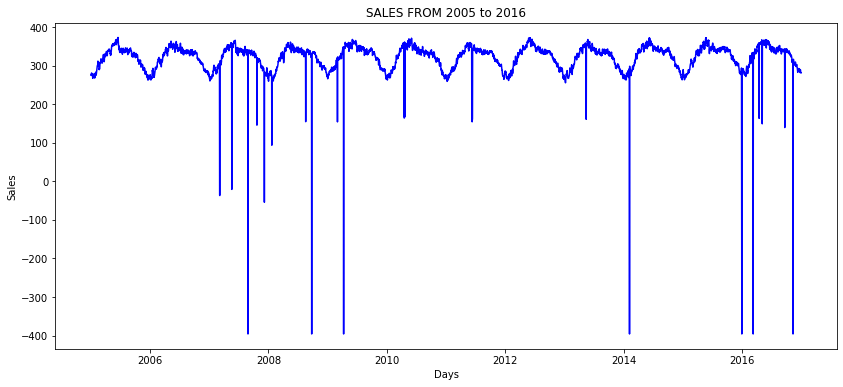

In [42]:
plt.plot(sale.index , scaler.inverse_transform(dataset), color = 'b')
plt.xlabel('Days')
plt.ylabel('Sales')
plt.title('SALES FROM 2005 to 2016')
plt.show()

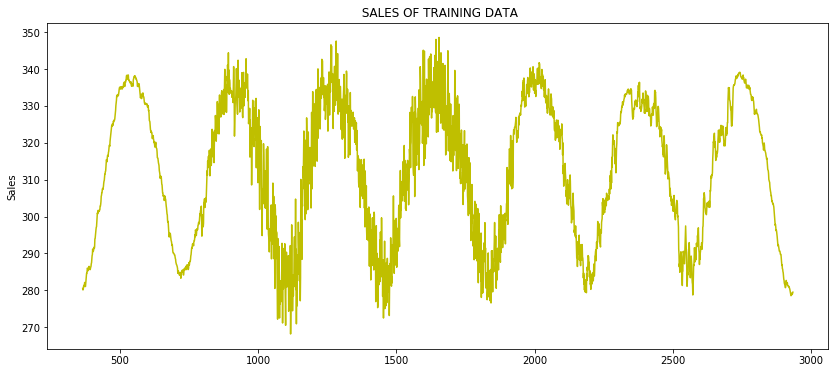

In [43]:
plt.plot(trainPredictPlot, color = 'y', label = 'Train')
plt.ylabel('Sales')
plt.title(' SALES OF TRAINING DATA')
plt.show()

C:\Users\sowndariya\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  fig.canvas.print_figure(bytes_io, **kw)


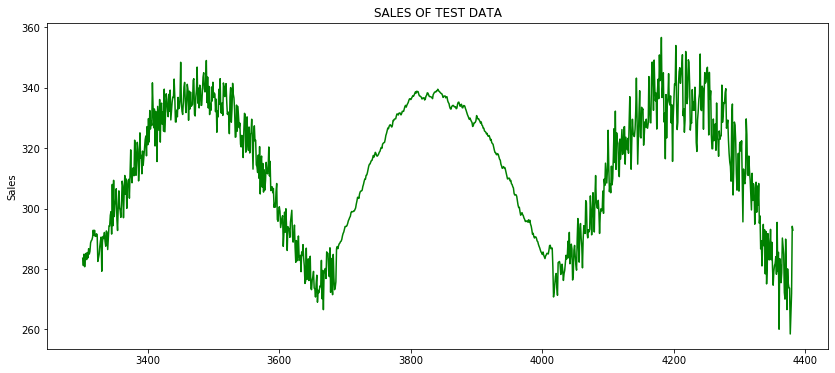

In [44]:
plt.plot(testPredictPlot, color = 'G', label = 'Train')
plt.ylabel('Sales')
plt.title('SALES OF TEST DATA')
plt.show()

In [45]:
# CREATING DATAFRAME WITH FORECASTED VALUES FROM 2017 TO 2018
from datetime import timedelta, date

def daterange(date1, date2):
    for n in range(int ((date2 - date1).days)+1):
        yield date1 + timedelta(n)
dates = []
start_dt = date(2017, 1, 1)
end_dt = date(2018, 12, 31)
for dt in daterange(start_dt, end_dt):
    dates.append(dt.strftime("%Y-%m-%d"))

In [46]:
dates = pd.DataFrame(dates)
dates.columns = ['Date']


<IPython.core.display.Javascript object>

In [47]:
dates.head()

Date
0  2017-01-01
1  2017-01-02
2  2017-01-03
3  2017-01-04
4  2017-01-05

In [48]:
len(dates)

730

In [49]:
dates['Sales'] = out
dates.set_index('Date', inplace = True)

In [50]:
dates

Sales
Date                  
2017-01-01  574.463623
2017-01-02  574.399353
2017-01-03  572.618164
2017-01-04  475.368805
2017-01-05  574.463623
...                ...
2018-12-27  186.188675
2018-12-28  206.716537
2018-12-29  219.508957
2018-12-30  231.370728
2018-12-31  227.083145

[730 rows x 1 columns]

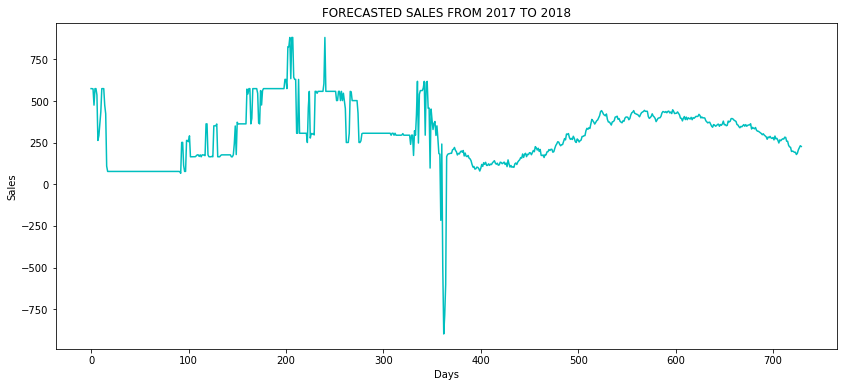

In [51]:
# plotting forecasted sales
plt.plot(out, color = 'c')
plt.xlabel('Days')
plt.ylabel('Sales')
plt.title('FORECASTED SALES FROM 2017 TO 2018')
plt.show()

<IPython.core.display.Javascript object>

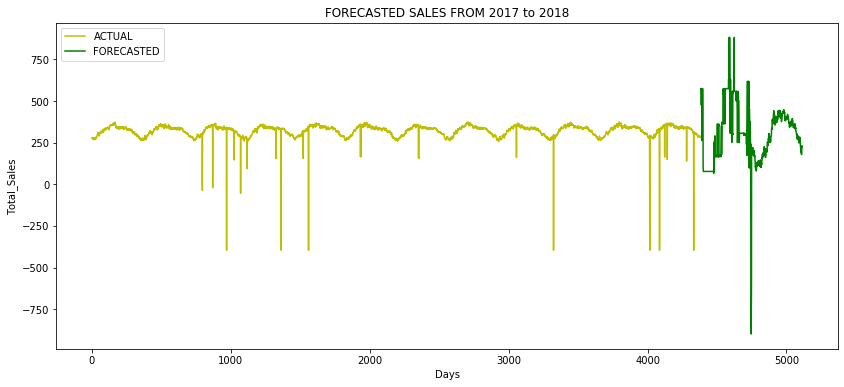

In [52]:
# prediction for next 2 years from 2017 to 2018 (365 + 365  = 730)
plt.plot(scaler.inverse_transform(dataset), color='y',label = 'ACTUAL')
pltx = np.arange(len(scaler.inverse_transform(dataset)) +1, len(scaler.inverse_transform(dataset))+730+1)
plt.plot( pltx,out, color='g',label = 'FORECASTED')
plt.xlabel('Days')
plt.ylabel('Total_Sales')
plt.title('FORECASTED SALES FROM 2017 to 2018')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>

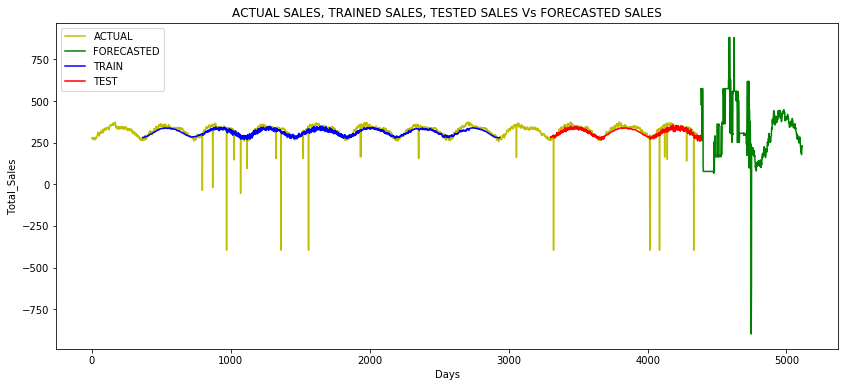

In [53]:
# FORECASTED SALES, ACTUAL SALES, TRAINED SALES, TESTED SALES
plt.plot(scaler.inverse_transform(dataset), color='y',label = 'ACTUAL')
pltx = np.arange(len(scaler.inverse_transform(dataset)) +1, len(scaler.inverse_transform(dataset))+730+1)
plt.plot( pltx,out, color='g',label = 'FORECASTED')
plt.plot(trainPredictPlot, color = 'b', label = 'TRAIN')
plt.plot(testPredictPlot , color = 'r', label = 'TEST')
plt.xlabel('Days')
plt.ylabel('Total_Sales')
plt.title('ACTUAL SALES, TRAINED SALES, TESTED SALES Vs FORECASTED SALES')
plt.legend()
plt.show()